#Khai báo các thư viện cần dùng


In [ ]:
!pip install -q category-encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.6 MB/s eta 0:00:00


#Phần I: Tiền xử lý dữ liệu

##Xử lý dữ liệu

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('music_genre.csv')

# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [ ]:
#Hiển thị kích thước của dữ liệu
df.shape

(50005, 18)

Hiển thị các thông tin của data:


*   Số hàng và số cột của data
*   Số lượng giá trị giữ liệu bị thiếu của từng cột


*   Tổng dung lượng bộ nhớ mà data sử dụng






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
#Độ cân bằng dữ liệu
print(df['music_genre'].value_counts())
df['music_genre'].value_counts(True)

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


music_genre
Electronic     0.1
Anime          0.1
Jazz           0.1
Alternative    0.1
Country        0.1
Rap            0.1
Blues          0.1
Rock           0.1
Classical      0.1
Hip-Hop        0.1
Name: proportion, dtype: float64

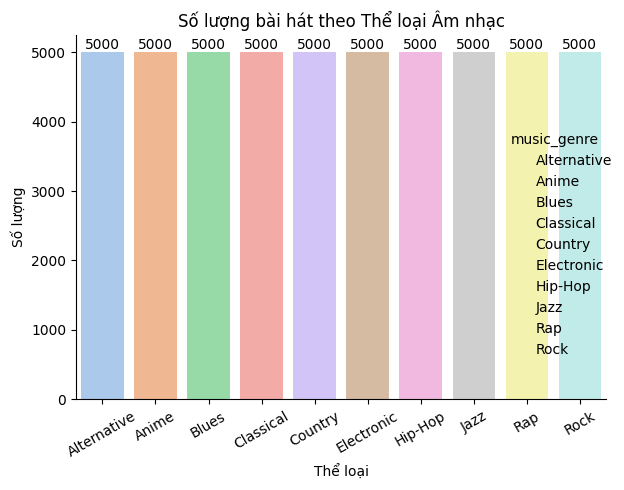

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import FuncFormatter

# Vẽ biểu đồ cột đếm theo cột 'music_genre'
f = sns.catplot(x='music_genre', data=df.sort_values('music_genre'),
                kind='count', palette='pastel')

# Lấy trục đang vẽ
ax = f.facet_axis(0, 0)

# Đặt tên nhãn trên trục X đúng thứ tự theo dataset
ax.set_xticklabels(sorted(map(str, df['music_genre'].dropna().unique())), rotation=30)



# Thêm tiêu đề và tên trục
ax.set_title('Số lượng bài hát theo Thể loại Âm nhạc')
ax.set_xlabel('Thể loại')
ax.set_ylabel('Số lượng')

# Thêm nhãn số trên đầu mỗi cột
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), value,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()





In [ ]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce') #đưa dữ liệu về dạng numpy

`duplicated()` (Kiểm tra trùng lặp): Hàm này trả về một chuỗi (Series) Boolean (`True/False`) có cùng độ dài với đối tượng ban đầu.

`duplicated().sum()`: Đếm tổng số hàng (hoặc giá trị) bị trùng lặp (tức là tổng số bản sao).

`isna()`:Trả về một DataFrame với các giá trị boolean, trong đó `True` chỉ ra giá trị bị thiếu (NaN) và `False` chỉ ra giá trị không bị thiếu.

`isna().sum()` trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame

In [ ]:
print("Số dòng trùng lặp:", df.duplicated().sum())

missing_before = df.isna().sum()
missing_count = missing_before.sum()

print(f"Tổng số giá trị bị thiếu trước khi xử lý: {missing_count} ({missing_count/df.size*100:.2f}%)")
print(f"\nChi tiết missing values theo từng cột:")
print(missing_before[missing_before > 0].sort_values(ascending=False))

Số dòng trùng lặp: 4
Tổng số giá trị bị thiếu trước khi xử lý: 5070 (0.56%)

Chi tiết missing values theo từng cột:
tempo               4985
instance_id            5
artist_name            5
track_name             5
acousticness           5
popularity             5
duration_ms            5
energy                 5
instrumentalness       5
danceability           5
key                    5
liveness               5
mode                   5
loudness               5
speechiness            5
obtained_date          5
valence                5
music_genre            5
dtype: int64


`drop_duplicates()`: Xóa bỏ các hàng bị trùng lặp khỏi DataFrame.

`dropna()`: Xóa bỏ các giá giá trị bị thiếu(NaN).

In [ ]:
df = df.drop_duplicates().dropna()

In [ ]:
X = df.drop(['music_genre', 'instance_id'], axis=1) # tách thêm instance_id: đó là ID của các bài hát
y = df['music_genre']

In [ ]:
X.shape

(45020, 16)

In [ ]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 45020
Số cột dữ liệu (tập X): 16


##Mã hóa dữ liệu bằng Onehot encode và label encode trong thư viện Sklearn và TargetEncoder

In [ ]:
X_origin = X.copy()
#X_origin['obtained_date'] = pd.to_datetime(X_origin['obtained_date'], format='%d-%b', errors='coerce')
y_origin = y.copy()

In [ ]:
onehot_columns = ['key', 'mode']
target_columns = ['artist_name', 'track_name', 'obtained_date']

# One-Hot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X_origin[onehot_columns])
ohe_cols = onehot_encoder.get_feature_names_out(onehot_columns)

# Target Encoding
target_encoder = TargetEncoder(smoothing=1.0)
X_target = target_encoder.fit_transform(X_origin[target_columns], y)
target_cols = [f"{col}_target" for col in target_columns]

# Gộp
X_encoded = np.hstack([X_onehot, X_target.values])
final_cols = np.concatenate([ohe_cols, target_cols])

X_encoded_df = pd.DataFrame(X_encoded, columns=final_cols, index=X.index)

# Gộp với cột số
columns_to_drop = onehot_columns + target_columns
X_encode = pd.concat([
    X_origin.drop(columns=columns_to_drop),
    X_encoded_df
], axis=1)

# ========================================
# KẾT QUẢ
# ========================================
print("DataFrame đã mã hóa hoàn chỉnh:")
print(X_encode)
print(f"\nShape: {X_encode.shape}")

DataFrame đã mã hóa hoàn chỉnh:
       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  ...  \
0               0.79200     0.115    -5.201       0.0

In [ ]:
X_encode.shape

(45020, 27)

Nhận xét:

Dữ liệu X ban đầu code shape là: (45020, 16)
Sau khi encode thì X có dạng: (45020, 26)
Các cột sau khi qua One hot encode thì các categories sẽ tạo thêm cột mới trương ứng với các categories để biểu diễn dữ liệu. Ví dụ cột A chứa kiểu cate như: A1, A2, A3 thì sau khi encode thì sẽ tạo thêm các cột mới và đánh dẫu xem mẫu nào thì tương ứng với A1, 2, 3...

In [ ]:
le = LabelEncoder()
y_encode = le.fit_transform(y)

In [ ]:
y_encode

array([5, 5, 5, ..., 6, 6, 6])

##Chia dữ liệu

In [ ]:
#Dữ liệu liên tục
continous_data = [
    'popularity', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
#Dữ liệu rời rạc
classified_data = ['artist_name', 'track_name', 'key', 'mode', 'obtained_date']

In [ ]:
X_continous = X_origin[continous_data]     #Dữ liệu liên tục
X_classified = X_origin[classified_data]   #Dữ liệu rời rạc

In [ ]:
X_continous

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  valence  
0               0.79200     0.115    -5.201       0.0748  100.889    0.759  
1               0.95000     0.124    -7.043       0.0300  115.002    0.531  
2               0.01180     0.534    -4.617       0.0345  127.994    0.333  
3               0.00253     0.157    -4.498       0.2390  128.014    0.270  
4               0.90900     0.157    -6.266       0.0413  145.036    0.323  
...                 ...       ...       ...          ...      ...      ...  
50000           0.00000     0.119    -7.022       0.2980   98.028    0.330  
50001           0.00000     0.109    -9.814       0.0550  122.043    0.113  
50002           0.00000     0.143    -5.443       0.1460  131.079    0.395  
50003           0.00000     0.106    -5.016       0.0441   75.886    0.354  
50004           0.00000     0.272   -13.652       0.1010   99.201    0.765  

[45020 rows x 11 columns]

In [ ]:
X_classified

artist_name                track_name key   mode obtained_date
0                  Röyksopp      Röyksopp's Night Out  A#  Minor         4-Apr
1      Thievery Corporation          The Shining Path   D  Minor         4-Apr
2            Dillon Francis                 Hurricane  G#  Major         4-Apr
3                  Dubloadz                     Nitro  C#  Major         4-Apr
4               What So Not          Divide & Conquer  F#  Major         4-Apr
...                     ...                       ...  ..    ...           ...
50000                 BEXEY                  GO GETTA  C#  Major         4-Apr
50001             Roy Woods       Drama (feat. Drake)   B  Major         4-Apr
50002                Berner  Lovin' Me (feat. Smiggz)   D  Major         4-Apr
50003             The-Dream         Shawty Is Da Shit   G  Minor         4-Apr
50004     Naughty By Nature            Hip Hop Hooray  F#  Minor         4-Apr

[45020 rows x 5 columns]

###Chuẩn hóa dữ liệu liên tục (Sử dụng gói thư viện `StandardScaler` trong thư viện Sklearn)




Để chuẩn hóa dữ liệu, ở đây chúng tôi sử dụng gói `sklearn.preprocessing.StandardScaler` trong thư viện sklearn.

Về  `StandardScaler` là một kỹ thuật chia tỷ lệ đặc trưng tuân theo phân phối chuẩn và được sử dụng để chuẩn hóa giá trị của các đặc trưng số. Nó biến đổi dữ liệu sao cho giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1. Kỹ thuật này lý tưởng cho các thuật toán như SVM, hồi quy logistic hoặc mạng nơ-ron nhân tạo giả định dữ liệu phân phối chuẩn.

Phương pháp này trừ đi giá trị trung bình của dữ liệu và chia cho độ lệch chuẩn. Phương pháp này tập trung dữ liệu quanh giá trị 0 và chuẩn hóa độ biến thiên:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Trong đó:
- `X` là giá trị ban đầu,
- `μ` là giá trị trung bình của tính năng,
- `σ` là độ lệch chuẩn.

Về ưu điểm:
- Nó xử lý các tính năng với các đơn vị khác nhau một cách hiệu quả.
- Nó làm giảm tác động của các giá trị ngoại lai mà không loại bỏ chúng hoàn toàn.

Về nhược điểm:
- Nó nhạy cảm với các giá trị ngoại lệ và các giá trị cực đoan có thể làm lệch giá trị trung bình và độ lệch chuẩn, dẫn đến khả năng mở rộng kém.
- Nó không lý tưởng cho các phân phối không chuẩn.

In [ ]:
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)

In [ ]:
X_continous_scaled

array([[-1.10991062, -0.8843778 ,  0.52258528, ..., -0.1870859 ,
        -0.6221643 ,  1.22434325],
       [-0.85273873, -0.86088544,  0.35485278, ..., -0.62860616,
        -0.1615777 ,  0.30185558],
       [-1.04561764, -0.88912314,  0.34367061, ..., -0.58425703,
         0.26242436, -0.49925212],
       ...,
       [ 0.4331207 , -0.88059911,  0.75181969, ...,  0.51461595,
         0.36310527, -0.24840021],
       [ 1.3332223 , -0.65466816,  1.2494261 , ..., -0.48964554,
        -1.43815287, -0.41428615],
       [ 1.46180824, -0.59930586,  1.69671277, ...,  0.07112461,
        -0.67725324,  1.24861924]])

In [ ]:
# đưa về dạng df cho dễ nhìn
X_continous_std_df = pd.DataFrame(X_continous_scaled)
X_continous_std_df

0         1         2         3         4         5         6   \
0     -1.109911 -0.884378  0.522585 -1.732130  1.290882  1.872550 -0.488216   
1     -0.852739 -0.860885  0.354853 -0.022528  1.098070  2.357446 -0.432561   
2     -1.045618 -0.889123  0.343671 -0.043517  0.587686 -0.521854  2.102795   
3     -0.659860 -0.823684  1.204697 -0.425216  0.379752 -0.550303 -0.228496   
4     -0.788446 -0.884466  0.444310  0.009394 -0.047459  2.231618 -0.228496   
...         ...       ...       ...       ...       ...       ...       ...   
45015  0.947464 -0.800251  1.981858 -1.732130 -0.096607 -0.558068 -0.463480   
45016  1.783273 -0.438199  0.841277  0.240357 -0.898099 -0.558068 -0.525318   
45017  0.433121 -0.880599  0.751820 -0.248158  0.617931 -0.558068 -0.315069   
45018  1.333222 -0.654668  1.249426  0.325824 -0.482231 -0.558068 -0.543870   
45019  1.461808 -0.599306  1.696713  0.361020  0.160475 -0.558068  0.482640   

             7         8         9         10  
0      0.639344 -0.187086 -0.622164  1.224343  
1      0.340140 -0.628606 -0.161578  0.301856  
2      0.734206 -0.584257  0.262424 -0.499252  
3      0.753536  1.431165  0.263077 -0.754150  
4      0.466352 -0.517241  0.818601 -0.539712  
...         ...       ...       ...       ...  
45015  0.343551  2.012631 -0.715535 -0.511390  
45016 -0.109966 -0.382222  0.068210 -1.389372  
45017  0.600035  0.514616  0.363105 -0.248400  
45018  0.669395 -0.489646 -1.438153 -0.414286  
45019 -0.733389  0.071125 -0.677253  1.248619  

[45020 rows x 11 columns]

#### Mô tả dữ liệu sau khi chuẩn hóa

Sau khi chuẩn hóa bằng `StandardScaler`, Các giá trị dao động quanh 0, thường nằm trong khoảng từ -3 đến 3, Các cột có trung bình ≈ 0, độ lệch chuẩn ≈ 1

In [ ]:
X_continous_std_df.describe()

0             1             2             3             4   \
count  4.502000e+04  4.502000e+04  4.502000e+04  4.502000e+04  4.502000e+04   
mean  -1.313131e-16  1.010101e-17 -4.242423e-16 -7.575756e-17  3.535353e-17   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -2.845821e+00 -8.980866e-01 -2.789572e+00 -1.732130e+00 -2.263691e+00   
25%   -6.598598e-01 -8.392092e-01 -6.515422e-01 -3.637528e-01 -6.334556e-01   
50%    4.736287e-02 -4.733493e-01  5.293428e-02 -1.355658e-02  1.604754e-01   
75%    7.545856e-01  7.159151e-01  7.182732e-01  3.717724e-01  8.154686e-01   
max    3.519183e+00  2.019419e+00  2.390007e+00  3.349460e+01  1.510158e+00   

                 5             6             7             8             9   \
count  4.502000e+04  4.502000e+04  4.502000e+04  4.502000e+04  4.502000e+04   
mean   1.010101e-16 -1.515151e-17  1.262626e-16 -6.060604e-17 -2.427398e-16   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -5.580676e-01 -1.139555e+00 -6.157723e+00 -7.044925e-01 -2.793804e+00   
25%   -5.580676e-01 -6.001424e-01 -2.798719e-01 -5.684884e-01 -8.162647e-01   
50%   -5.575796e-01 -4.201939e-01  3.009934e-01 -4.423398e-01 -2.413750e-03   
75%   -8.544756e-02  3.094941e-01  6.432427e-01  4.944282e-02  6.696272e-01   
max    2.498618e+00  4.984444e+00  2.092320e+00  8.359485e+00  3.274105e+00   

                 10  
count  4.502000e+04  
mean  -4.292928e-17  
std    1.000011e+00  
min   -1.846570e+00  
25%   -8.067480e-01  
50%   -3.396229e-02  
75%    7.752374e-01  
max    2.167061e+00

#Phần II: Phần tích và trực quan hóa dữ liệu

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('music_genre.csv')
df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

##Phân tích các tham số và thống kê dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Chi tiết về khái niệm của các trường:

| STT | Thuộc tính                 | Loại dữ liệu | Định nghĩa thuộc tính                      | Mô tả thuộc tính                                                                 |
| --- | -------------------------- | ------------ | ------------------------------------------ | -------------------------------------------------------------------------------- |
| 1   |         instance_id                | Mã định danh    | Mã định danh duy nhất                                      |      Một số (ví dụ: 32894.0) dùng để xác định mỗi hàng dữ liệu.                                                                            |
| 2   | artist_name                  | Phân loại    | Tên nghệ sĩ                       | Tên của nghệ sĩ hoặc ban nhạc (ví dụ: "Röyksopp").                                                                         |
| 3   | track_name            | Phân loại    | Tên bài hát                         | Tên của bài hát (ví dụ: "Röyksopp's Night Out").                                  |
| 4   | popularity                 | Số (Thứ bậc)    |Mức độ phổ biến                        |   Một thang điểm (thường từ 0-100) cho biết mức độ phổ biến của bài hát.                                                                               |
| 5   | acousticness                 | Số (Liên tục)    | Độ "acoustic" (mộc)                         | Thang đo từ 0.0 đến 1.0. Giá trị cao cho thấy bài hát có tính acoustic (ít dùng nhạc cụ điện tử).                                |
| 6   | danceability         | Số (Liên tục)    | Khả năng nhảy       |     Thang đo từ 0.0 đến 1.0, dựa trên nhịp độ, sự ổn định của nhịp, và sức mạnh của nhịp.                                                                             |
| 7   | duration_ms                  | Số (Liên tục)    | Thời lượng bài hát                          | Thời lượng của bài hát, tính bằng mili-giây (ms).          |
| 8   | energy            | Số (Liên tục)    | Năng lượng                          | Thang đo từ 0.0 đến 1.0. Bài hát năng lượng cao thường nhanh, ồn ào (ví dụ: nhạc rock). |
| 9   |instrumentalness             | Số (Liên tục)    | Tỷ lệ không lời                         |                 Thang đo từ 0.0 đến 1.0. Giá trị càng gần 1.0, khả năng bài hát không có lời càng cao.                                                                 |
| 10  |key            | Phân loại    | Tone/Khóa nhạc                            |                Tone chính của bài hát (ví dụ: A#, D, G#).                                |
| 11  | liveness   | Số (Liên tục)    | Mức độ "trực tiếp"     | 1Thang đo từ 0.0 đến 1.0, phát hiện sự hiện diện của khán giả trong bản thu (cho biết bài hát có thể được thu live).                                   |
| 12  | loudness                     | Số (Liên tục)   | Độ lớn                                  | Độ lớn trung bình của bài hát, tính bằng decibel (dB) (ví dụ: -5.201).                                                                   |
| 13  | mode                | Phân loại    | Chế độ (Trưởng/Thứ)                         |                                               Cho biết bài hát ở chế độ Trưởng (Major) hay Thứ (Minor).                                   |
| 14  | speechiness            | Số (Liên tục)   | Tỷ lệ lời nói              | 1Thang đo từ 0.0 đến 1.0. Giá trị cao (gần 1.0) cho thấy nhiều lời nói (ví dụ: podcast). Giá trị thấp (dưới 0.33) có thể là nhạc hát.                                   |
| 15  | tempo                  | Số (Liên tục)    | Nhịp độ                          |                     Nhịp độ của bài hát, tính bằng nhịp mỗi phút (BPM).                                                             |
| 16  | obtained_date                   | Thời gian    | Ngày lấy dữ liệu                          | Ngày mà dữ liệu của bài hát này được thu thập (ví dụ: "4-Apr").                                    |
| 17  | valence           | Số (Liên tục)    | Mức độ tích cực               | Thang đo từ 0.0 đến 1.0. Giá trị cao (gần 1.0) thể hiện cảm xúc tích cực (vui vẻ); giá trị thấp (gần 0.0) thể hiện cảm xúc tiêu cực (buồn bã).                                   |
| 18  | music_genre             | Phân loại    | Thể loại nhạc                        | Thể loại của bài hát (ví dụ: "Electronic", "Hip-Hop", "Jazz"). Đây là biến mục tiêu cần dự đoán.                                                     |
                                                



In [ ]:
df.describe(include='all')

instance_id  artist_name track_name    popularity  acousticness  \
count   50000.000000        50000      50000  50000.000000  50000.000000   
unique           NaN         6863      41699           NaN           NaN   
top              NaN  empty_field       Home           NaN           NaN   
freq             NaN         2489         16           NaN           NaN   
mean    55888.396360          NaN        NaN     44.220420      0.306383   
std     20725.256253          NaN        NaN     15.542008      0.341340   
min     20002.000000          NaN        NaN      0.000000      0.000000   
25%     37973.500000          NaN        NaN     34.000000      0.020000   
50%     55913.500000          NaN        NaN     45.000000      0.144000   
75%     73863.250000          NaN        NaN     56.000000      0.552000   
max     91759.000000          NaN        NaN     99.000000      0.996000   

        danceability   duration_ms        energy  instrumentalness    key  \
count   50000.000000  5.000000e+04  50000.000000      50000.000000  50000   
unique           NaN           NaN           NaN               NaN     12   
top              NaN           NaN           NaN               NaN      G   
freq             NaN           NaN           NaN               NaN   5727   
mean        0.558241  2.212526e+05      0.599755          0.181601    NaN   
std         0.178632  1.286720e+05      0.264559          0.325409    NaN   
min         0.059600 -1.000000e+00      0.000792          0.000000    NaN   
25%         0.442000  1.748000e+05      0.433000          0.000000    NaN   
50%         0.568000  2.192810e+05      0.643000          0.000158    NaN   
75%         0.687000  2.686122e+05      0.815000          0.155000    NaN   
max         0.986000  4.830606e+06      0.999000          0.996000    NaN   

            liveness      loudness   mode   speechiness  tempo obtained_date  \
count   50000.000000  50000.000000  50000  50000.000000  50000         50000   
unique           NaN           NaN      2           NaN  29394             5   
top              NaN           NaN  Major           NaN      ?         4-Apr   
freq             NaN           NaN  32099           NaN   4980         44748   
mean        0.193896     -9.133761    NaN      0.093586    NaN           NaN   
std         0.161637      6.162990    NaN      0.101373    NaN           NaN   
min         0.009670    -47.046000    NaN      0.022300    NaN           NaN   
25%         0.096900    -10.860000    NaN      0.036100    NaN           NaN   
50%         0.126000     -7.276500    NaN      0.048900    NaN           NaN   
75%         0.244000     -5.173000    NaN      0.098525    NaN           NaN   
max         1.000000      3.744000    NaN      0.942000    NaN           NaN   

             valence music_genre  
count   50000.000000       50000  
unique           NaN          10  
top              NaN  Electronic  
freq             NaN        5000  
mean        0.456264         NaN  
std         0.247119         NaN  
min         0.000000         NaN  
25%         0.257000         NaN  
50%         0.448000         NaN  
75%         0.648000         NaN  
max         0.992000         NaN

###Biểu đồ phát hiện giá trị ngoại lai


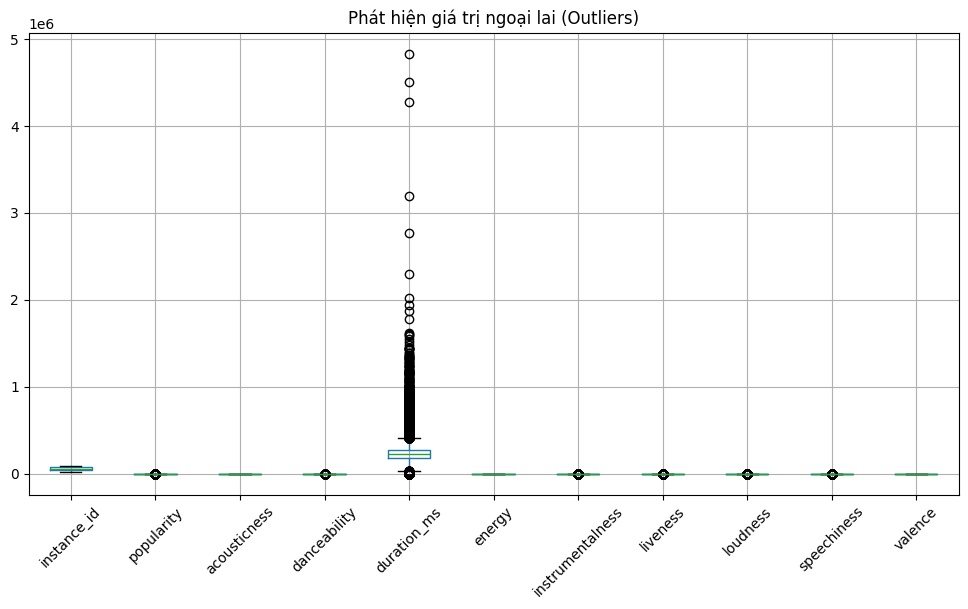

In [ ]:
plt.figure(figsize=(12, 6))
df.select_dtypes('number').boxplot()
plt.title("Phát hiện giá trị ngoại lai (Outliers)")
plt.xticks(rotation=45)
plt.show()

###Chia dữ liệu

In [ ]:
#Dữ liệu liên tục
continous_data = [
    'popularity','acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

#Dữ liệu rời rạc
classified_data = ['artist_name', 'track_name', 'key', 'mode', 'obtained_date']

####Biểu đồ thống kê dữ liệu liên tục

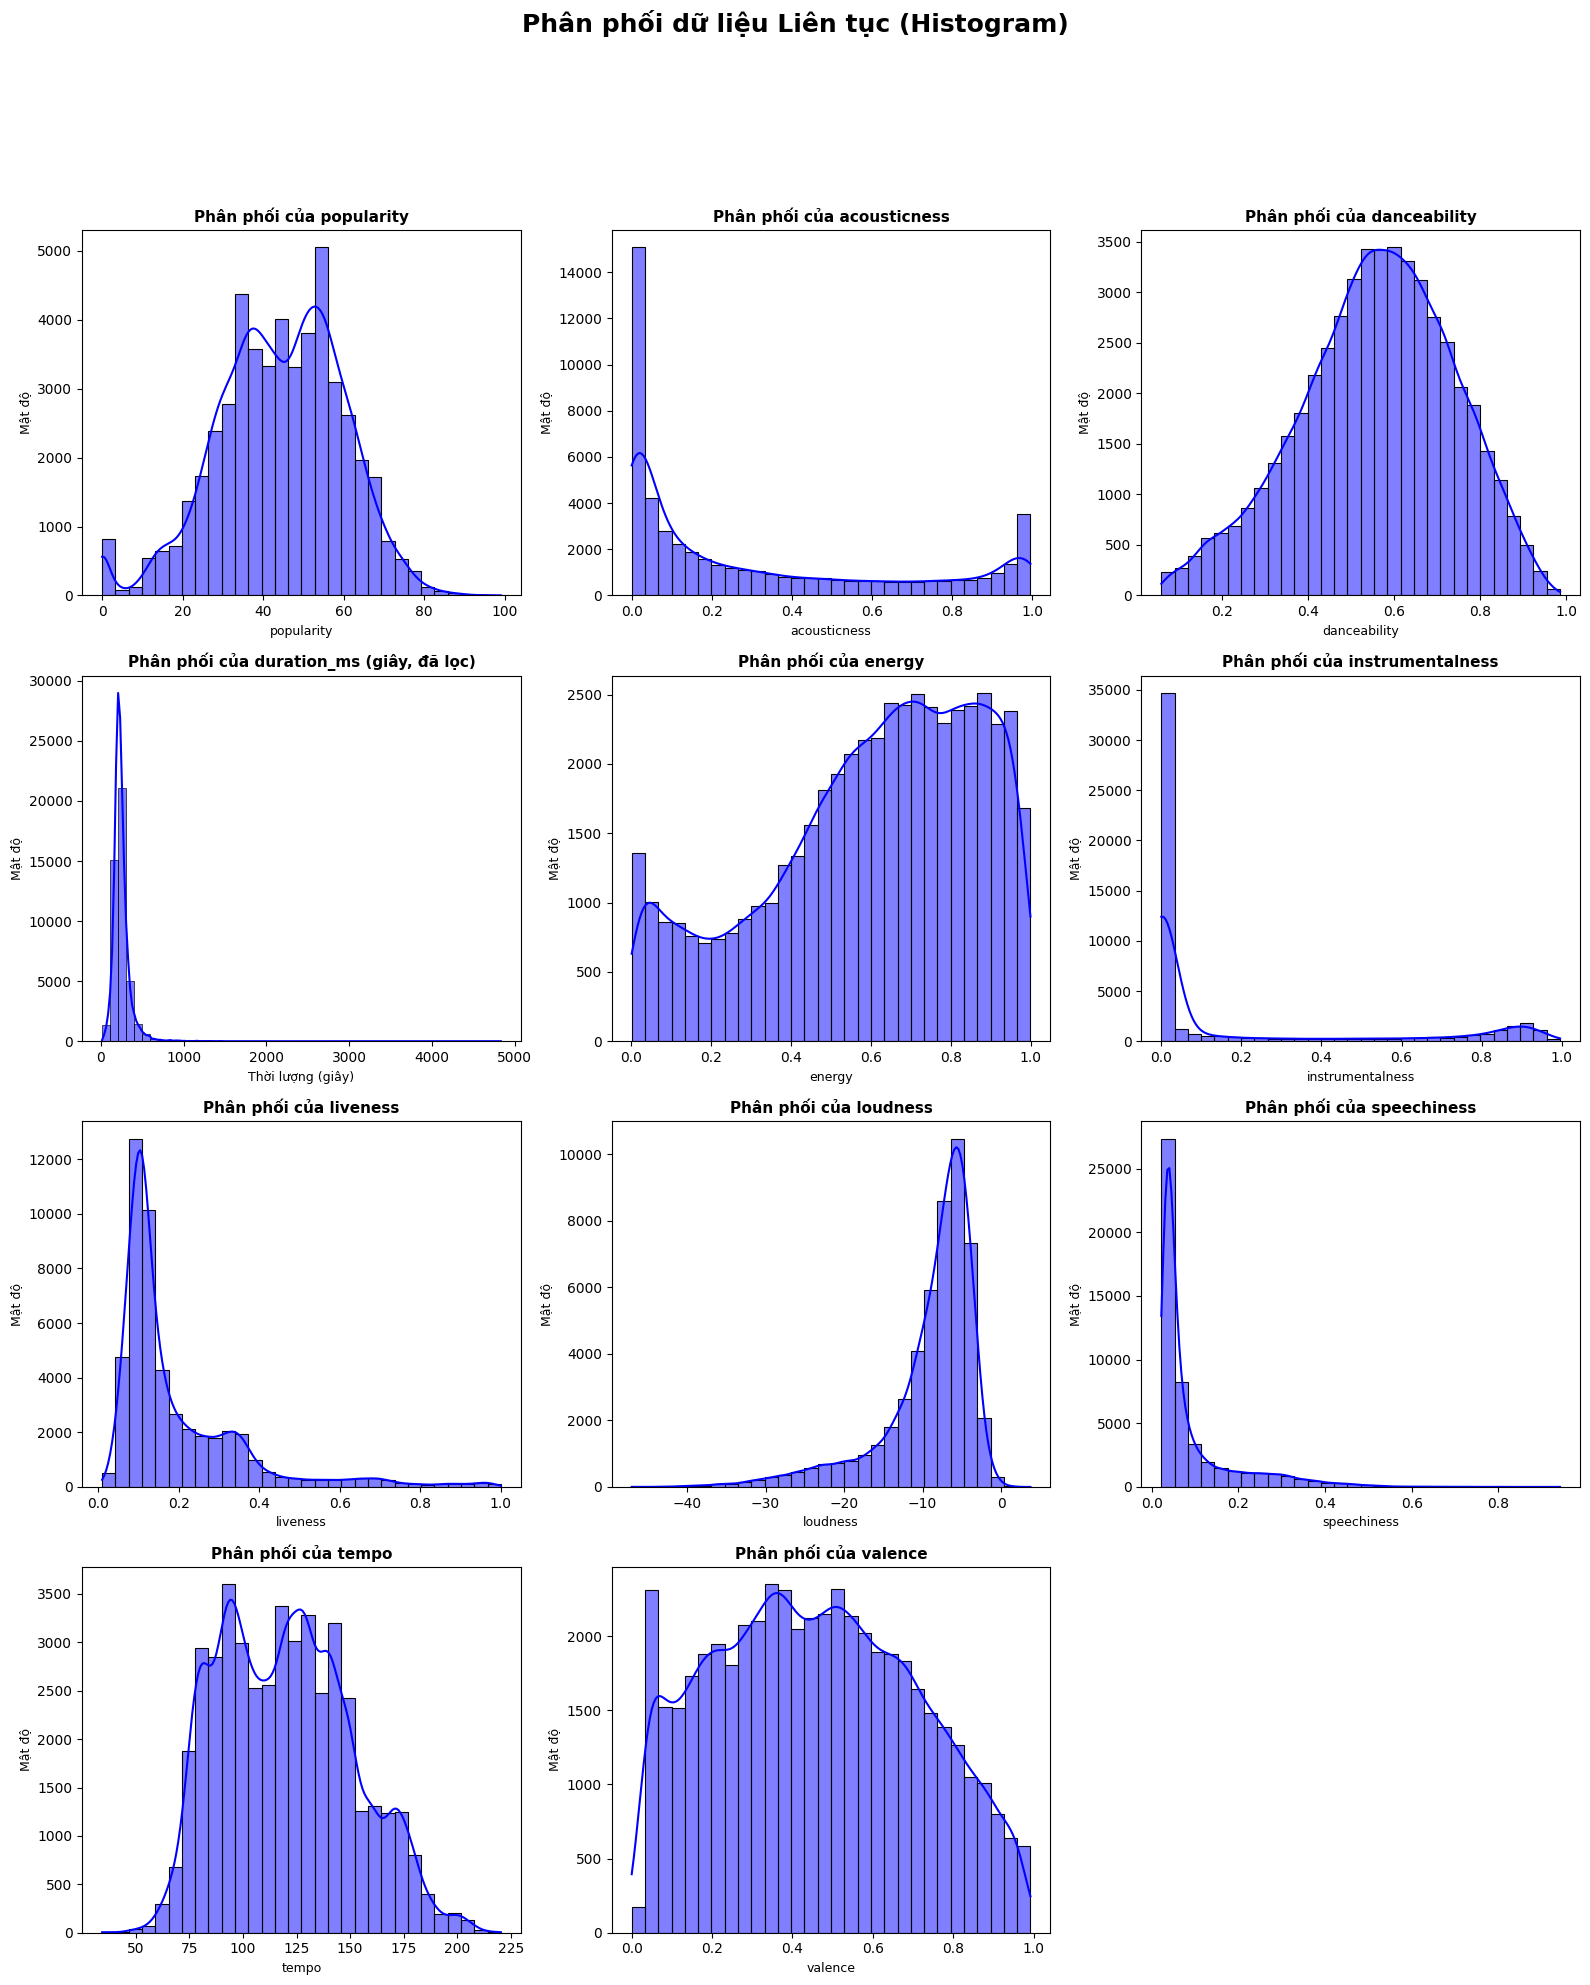

In [ ]:
cols_per_row = 3
rows = math.ceil(len(continous_data) / cols_per_row)

plt.figure(figsize=(16, 5 * rows))
plt.suptitle("Phân phối dữ liệu Liên tục (Histogram)", fontsize=18, fontweight='bold', y=1.02)

for i, col in enumerate(continous_data, 1):
    plt.subplot(rows, cols_per_row, i)

    # Chuyển cột sang dạng số, bỏ qua các giá trị không hợp lệ
    numeric_data = pd.to_numeric(df[col], errors='coerce')

    # Xử lý đặc biệt cho 'duration_ms' vì có giá trị -1.0
    if col == 'duration_ms':
        # Lọc ra các giá trị > 0
        duration_data = numeric_data[numeric_data > 0]

        # Chuyển đổi sang giây cho dễ đọc (ms / 1000)
        duration_in_seconds = duration_data / 1000

        sns.histplot(duration_in_seconds, kde=True, bins=50, color='blue')
        plt.title(f"Phân phối của {col} (giây, đã lọc)", fontsize=11, fontweight='bold')
        plt.xlabel("Thời lượng (giây)", fontsize=9)

    # Xử lý các cột số khác
    else:
        # Bỏ qua các giá trị NaN
        valid_data = numeric_data.dropna()
        sns.histplot(valid_data, kde=True, bins=30, color='blue')
        plt.title(f"Phân phối của {col}", fontsize=11, fontweight='bold')
        plt.xlabel(col, fontsize=9)

    plt.ylabel("Mật độ", fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

####Biểu đồ thống kê dữ liệu rời rạc


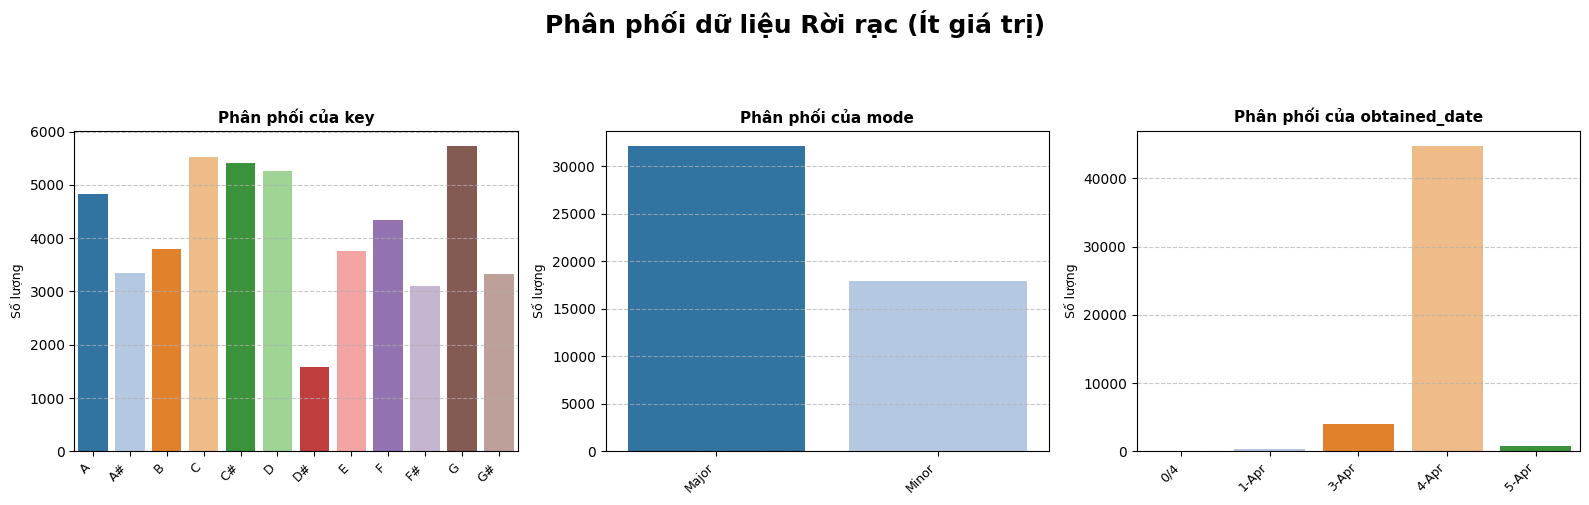

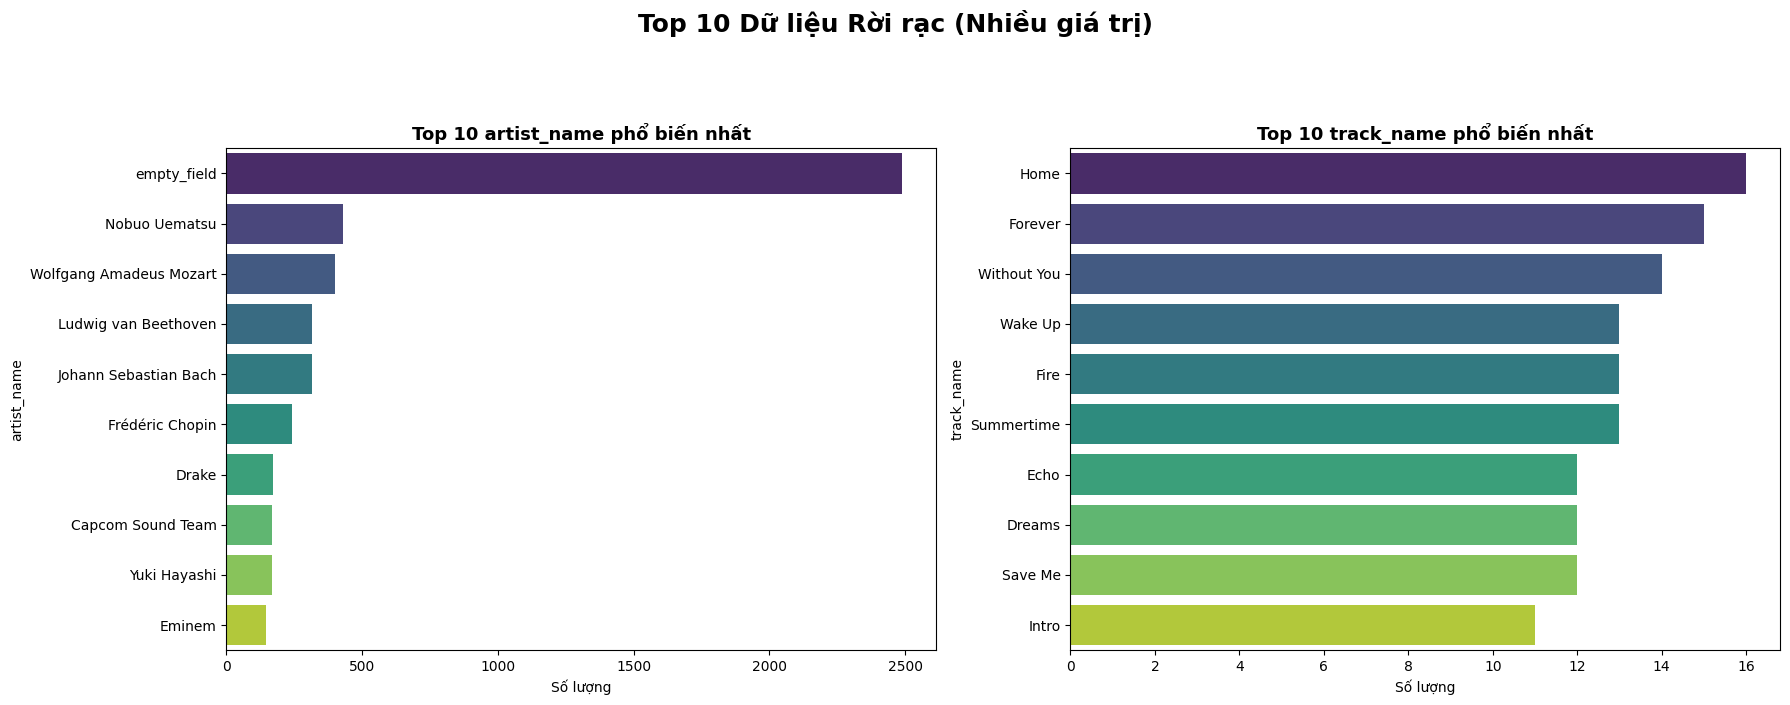

In [ ]:
# --- 1A: BIỂU ĐỒ CHO BIẾN RỜI RẠC (ÍT GIÁ TRỊ) ---
classified_low_cardinality = ['key', 'mode', 'obtained_date']

cols_per_row = 3
rows = math.ceil(len(classified_low_cardinality) / cols_per_row)

plt.figure(figsize=(16, 5 * rows))
plt.suptitle("Phân phối dữ liệu Rời rạc (Ít giá trị)", fontsize=18, fontweight='bold', y=1.03)

for i, col in enumerate(classified_low_cardinality, 1):
    plt.subplot(rows, cols_per_row, i)

    # Đếm số lượng
    data_counts = df[col].value_counts().sort_index()

    # Giới hạn 20 giá trị đầu (phòng trường hợp 'obtained_date' có nhiều)
    if len(data_counts) > 20:
        data_counts = data_counts.head(20)
        plt.title(f"Top 20 giá trị cho {col}", fontsize=11, fontweight='bold')
    else:
        plt.title(f"Phân phối của {col}", fontsize=11, fontweight='bold')

    # Dùng barplot của seaborn
    sns.barplot(x=data_counts.index, y=data_counts.values, palette="tab20")

    plt.xlabel("")
    plt.ylabel("Số lượng", fontsize=9)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- 1B: BIỂU ĐỒ CHO BIẾN RỜI RẠC (TOP 10 GIÁ TRỊ PHỔ BIẾN NHẤT) ---
classified_high_cardinality = ['artist_name', 'track_name']

plt.figure(figsize=(18, 7))
plt.suptitle("Top 10 Dữ liệu Rời rạc (Nhiều giá trị)", fontsize=18, fontweight='bold', y=1.03)

for i, col in enumerate(classified_high_cardinality, 1):
    plt.subplot(1, 2, i) # 1 hàng, 2 cột

    # Lấy 10 giá trị phổ biến nhất
    data_counts = df[col].value_counts().head(10)

    # Dùng barplot ngang (dễ đọc tên hơn)
    sns.barplot(x=data_counts.values, y=data_counts.index, palette='viridis')

    plt.title(f"Top 10 {col} phổ biến nhất", fontsize=13, fontweight='bold')
    plt.xlabel("Số lượng", fontsize=10)
    plt.ylabel(col, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###Ma trận tương quan

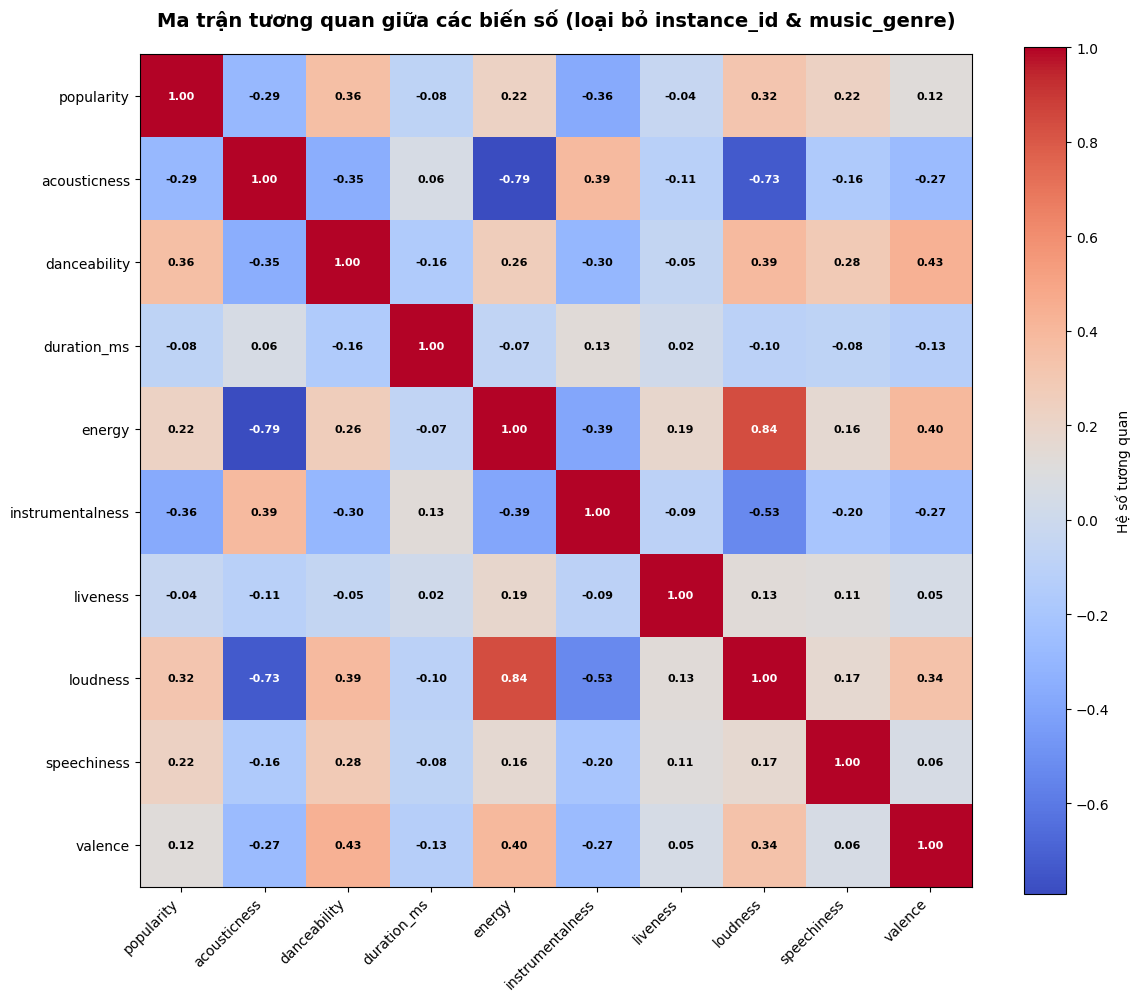

In [ ]:
import matplotlib.pyplot as plt

cols_to_drop = ['instance_id', 'music_genre']
corr = df.drop(columns=cols_to_drop, errors='ignore').corr(numeric_only=True)

# Vẽ biểu đồ
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Hệ số tương quan')

# Nhãn trục
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=10)
plt.title("Ma trận tương quan giữa các biến số (loại bỏ instance_id & music_genre)",
          fontsize=14, fontweight='bold', pad=20)

# Hiển thị giá trị hệ số
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = f"{corr.iloc[i, j]:.2f}"
        plt.text(j, i, text,
                 ha='center', va='center',
                 color='black' if abs(corr.iloc[i, j]) < 0.6 else 'white',
                 fontsize=8, fontweight='bold')

plt.grid(False)
plt.tight_layout()
plt.show()


## Chuẩn hóa dữ liệu và đánh giá các thành phần chính (của dữ liệu gốc hoặc sau khi phân thích thành phần chính) theo các tham số thống kê.

In [ ]:

df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce') #đưa dữ liệu về dạng numpy

In [ ]:
df = df.drop_duplicates().dropna()

In [ ]:
#Chuẩn bị dữ liệu
X_continous = df[continous_data]
X_classified = df[classified_data]
y = df['music_genre']

###Chuẩn hóa dữ liệu

In [ ]:
onehot_columns = ['key', 'mode']
target_columns = ['artist_name', 'track_name', 'obtained_date']

# One-Hot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X_origin[onehot_columns])
ohe_cols = onehot_encoder.get_feature_names_out(onehot_columns)

# Target Encoding
target_encoder = TargetEncoder(smoothing=1.0)
X_target = target_encoder.fit_transform(X_origin[target_columns], y)
target_cols = [f"{col}_target" for col in target_columns]

# Gộp
X_encoded = np.hstack([X_onehot, X_target.values])
final_cols = np.concatenate([ohe_cols, target_cols])

X_classified_encoded_df = pd.DataFrame(X_encoded, columns=final_cols, index=X.index)



# Chuẩn hóa biến liên tục
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)
# Đưa phần liên tục về DataFrame
X_continous_scaled_df = pd.DataFrame(X_continous_scaled, columns=continous_data, index=df.index)
# Gộp hai phần lại thành DataFrame X hoàn chỉnh
X = pd.concat([X_continous_scaled_df, X_classified_encoded_df], axis=1)
# Mã hóa nhãn đầu ra y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Kích thước X:", X.shape)
print("Số lượng cột:", len(X.columns))
print()
X.head()

Kích thước X: (45020, 26)
Số lượng cột: 26



popularity  acousticness  danceability  duration_ms    energy  \
0   -1.109911     -0.884378      0.522585    -1.732130  1.290882   
1   -0.852739     -0.860885      0.354853    -0.022528  1.098070   
2   -1.045618     -0.889123      0.343671    -0.043517  0.587686   
3   -0.659860     -0.823684      1.204697    -0.425216  0.379752   
4   -0.788446     -0.884466      0.444310     0.009394 -0.047459   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  key_D#  \
0          1.872550 -0.488216  0.639344    -0.187086 -0.622164  ...     0.0   
1          2.357446 -0.432561  0.340140    -0.628606 -0.161578  ...     0.0   
2         -0.521854  2.102795  0.734206    -0.584257  0.262424  ...     0.0   
3         -0.550303 -0.228496  0.753536     1.431165  0.263077  ...     0.0   
4          2.231618 -0.228496  0.466352    -0.517241  0.818601  ...     0.0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Minor  artist_name_target  \
0    0.0    0.0     0.0    0.0     0.0         1.0            4.629521   
1    0.0    0.0     0.0    0.0     0.0         1.0            5.849558   
2    0.0    0.0     0.0    0.0     1.0         0.0            5.000000   
3    0.0    0.0     0.0    0.0     0.0         0.0            4.510421   
4    0.0    0.0     1.0    0.0     0.0         0.0            4.996723   

   track_name_target  obtained_date_target  
0           4.510418              4.597504  
1           4.510418              4.597504  
2           4.510420              4.597504  
3           4.510418              4.597504  
4           4.510418              4.597504  

[5 rows x 26 columns]

###Thực hiện giảm chiều với PCA


In [ ]:
from sklearn.decomposition import PCA

# giảm còn 6 chiều
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(X)

# hiển thị dưới dạng dataframe
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(6)])


In [ ]:
X_pca_df


PC1       PC2       PC3       PC4       PC5       PC6
0      0.721706 -0.853730 -1.557415  0.232196 -0.038487  0.646146
1      0.429779  0.222086  0.154854 -0.950701 -0.325529  1.129352
2      1.002075 -0.810448  1.424581  0.916064 -0.437184 -0.013450
3      1.325385 -0.166159 -0.069229  0.614559  0.486528 -0.247889
4     -0.217389 -0.101942  0.484702 -0.787525  0.548905  0.990296
...         ...       ...       ...       ...       ...       ...
45015  1.825940  0.929991 -1.598990  1.355991  0.456740 -1.179999
45016  1.156257  2.716886  0.561741 -1.165050  0.369745 -0.888370
45017  1.476053 -0.242656 -0.106383 -0.171559  0.365757 -0.387962
45018  0.886172  0.746543 -0.806239 -0.840782 -1.300604 -1.313740
45019  1.389345  0.538974 -0.978333  0.268728 -1.411828  0.371729

[45020 rows x 6 columns]

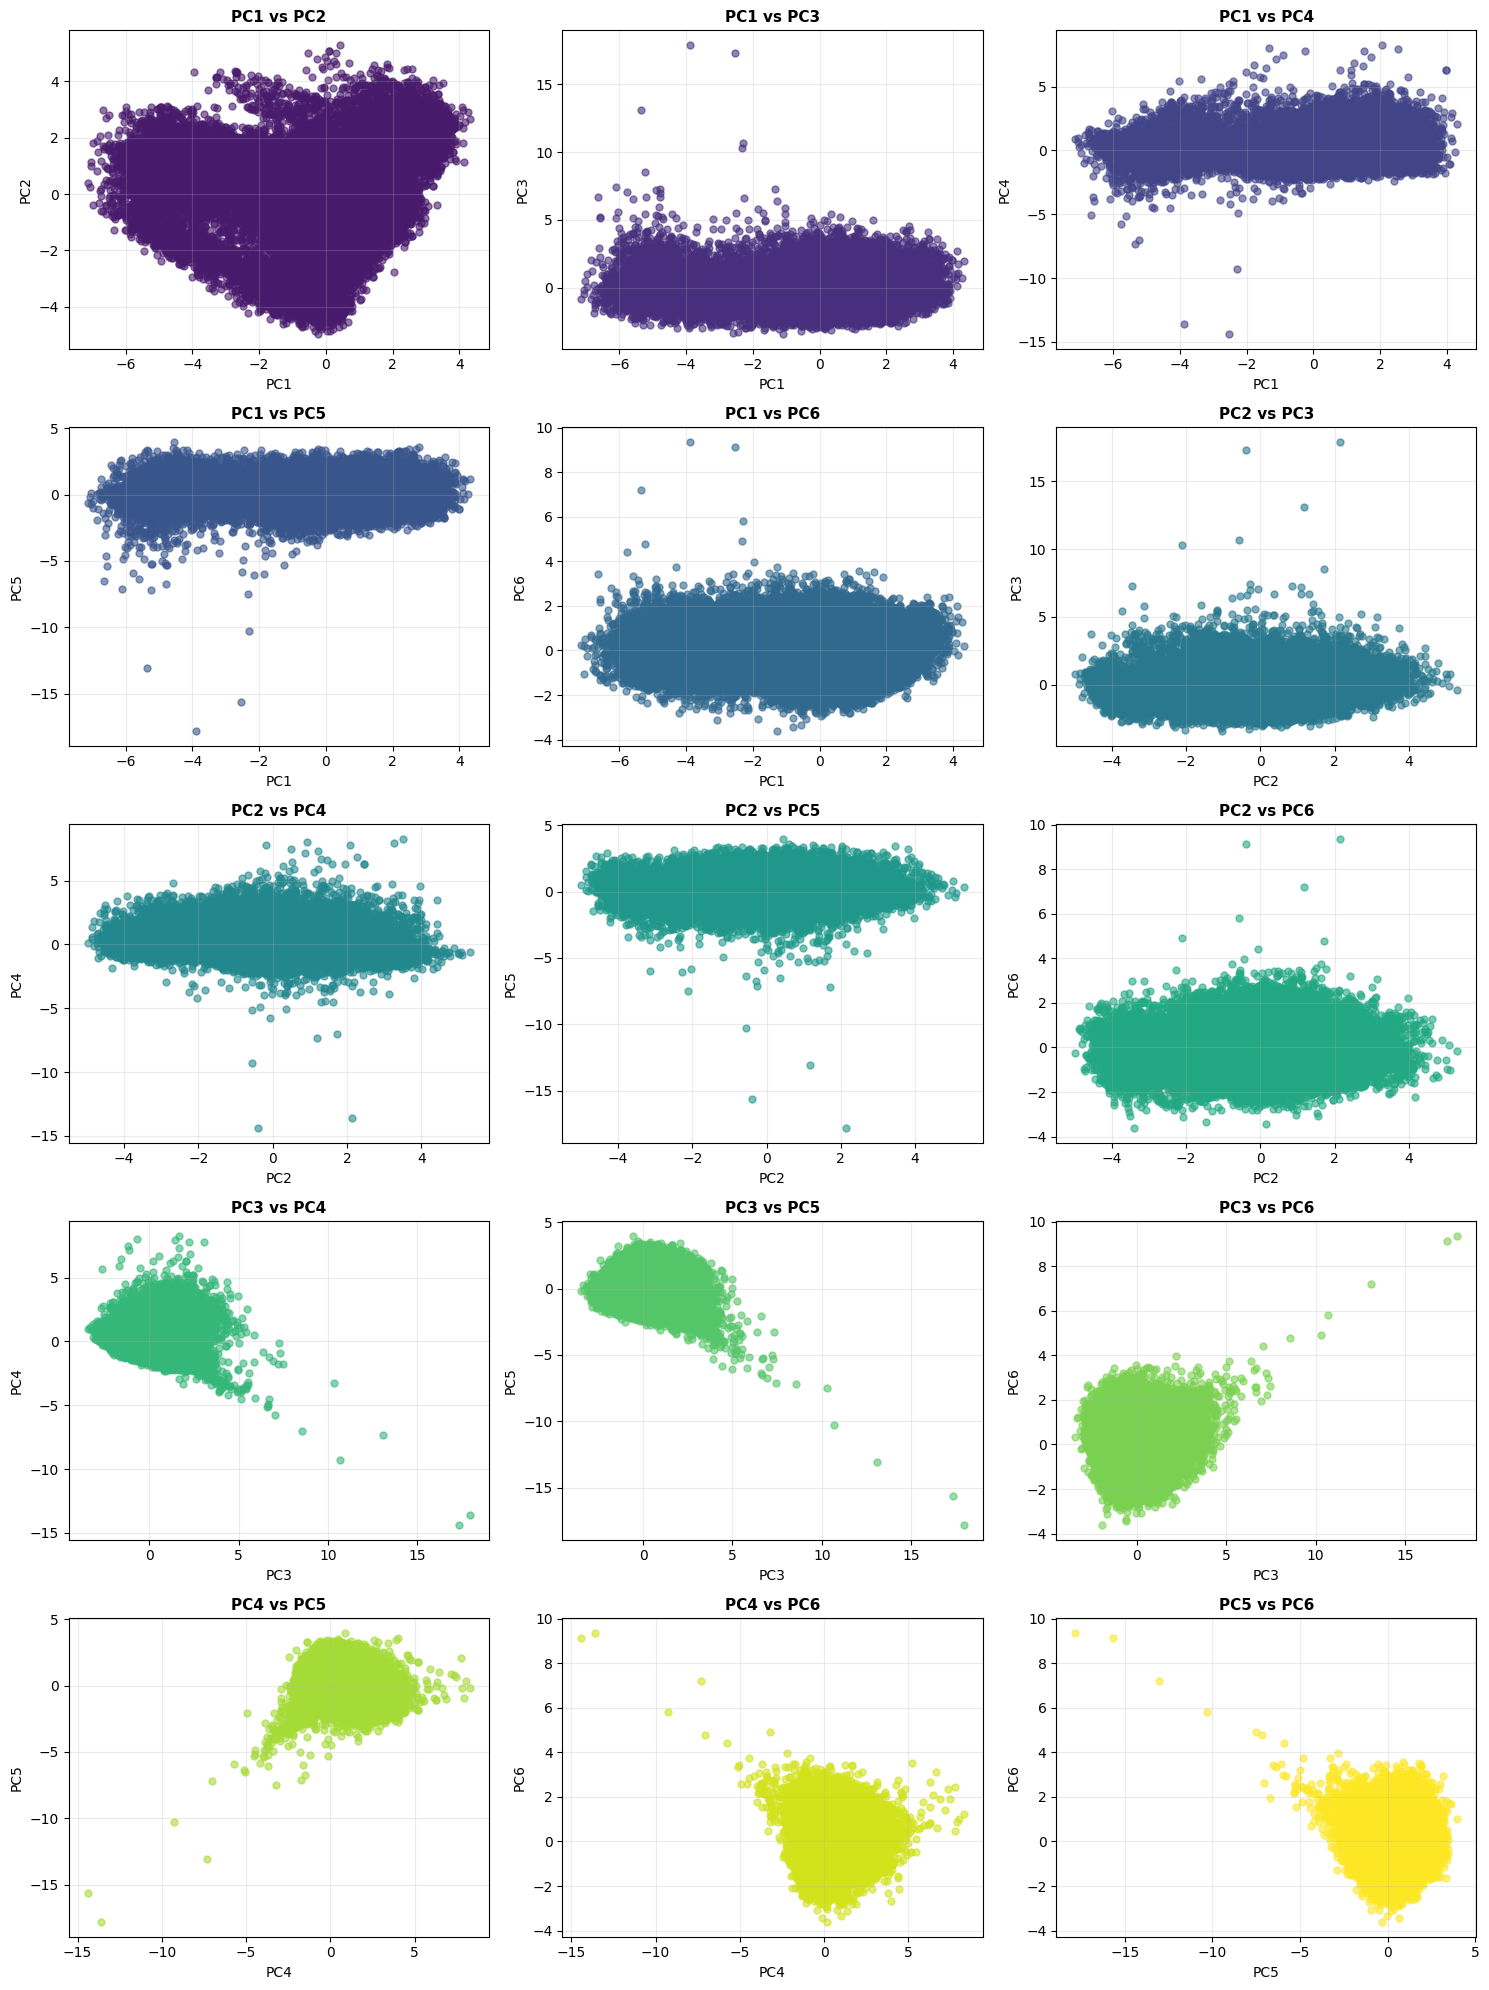

In [ ]:
import itertools

def visualize_pairs(X):
    cols = X.columns
    pairs = list(itertools.combinations(cols, 2))

    n_cols = 3
    n_rows = int(np.ceil(len(pairs) / n_cols))

    plt.figure(figsize=(15, 4 * n_rows))
    cmap_colors = plt.cm.get_cmap('viridis')

    for idx, (x_col, y_col) in enumerate(pairs, 1):
        plt.subplot(n_rows, n_cols, idx)
        plt.scatter(X[x_col], X[y_col], alpha=0.6, s=25, color=cmap_colors(idx / len(pairs)))
        plt.xlabel(x_col, fontsize=10)
        plt.ylabel(y_col, fontsize=10)
        plt.title(f"{x_col} vs {y_col}", fontsize=11, fontweight='bold')
        plt.grid(alpha=0.25)

    plt.tight_layout()
    plt.show()
visualize_pairs(X_pca_df)


In [ ]:
print("Phương sai giải thích của từng thành phần chính:")
print(np.real(pca.explained_variance_ratio_))


Phương sai giải thích của từng thành phần chính:
[0.28686139 0.14474431 0.08291467 0.07210809 0.06801119 0.05927551]


In [ ]:
explained_variance = np.real(pca.explained_variance_ratio_)
cumulative_variance = explained_variance.cumsum()

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")


PC1: 0.2869 (0.2869 tích lũy)
PC2: 0.1447 (0.4316 tích lũy)
PC3: 0.0829 (0.5145 tích lũy)
PC4: 0.0721 (0.5866 tích lũy)
PC5: 0.0680 (0.6546 tích lũy)
PC6: 0.0593 (0.7139 tích lũy)


Giải thích:

Phương sai tích lũy từ `PC1` đến `PC6` chỉ đạt **71.4%** (từ `PC1`: 28.69%, `PC2`: 14.47%, ..., `PC6`: 5.93%), tức là chỉ giữ lại **khoảng 71%** thông tin quan trọng của dữ liệu gốc.  

Mặc dù `PC1` chiếm tỷ lệ lớn nhất (28.69%), nhưng các thành phần sau giảm dần nhanh chóng, cho thấy **dữ liệu bị phân tán mạnh trên nhiều chiều**.

Chính vì vậy, nên chúng tôi thực nghiệm lại với dữ liệu liên tục, không sử dụng dữ liệu dạng categories.

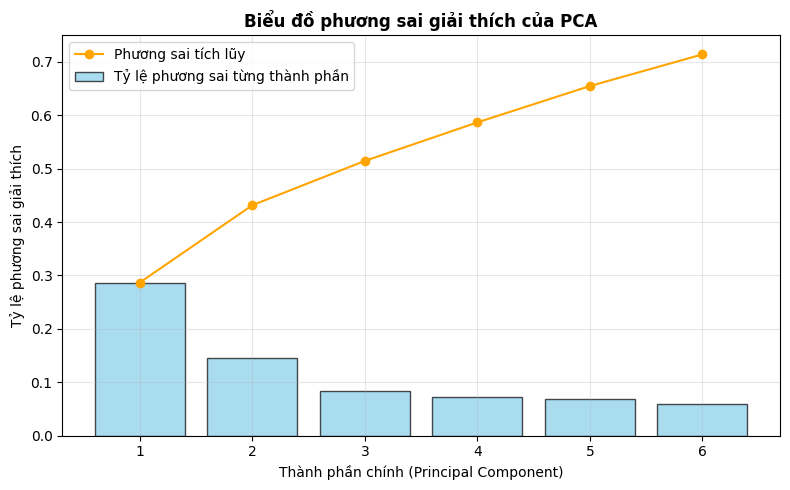

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance,
        alpha=0.7, color='skyblue', edgecolor='black', label='Tỷ lệ phương sai từng thành phần')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance,
         marker='o', color='orange', label='Phương sai tích lũy')
plt.xticks(np.arange(1, len(explained_variance)+1))
plt.xlabel('Thành phần chính (Principal Component)')
plt.ylabel('Tỷ lệ phương sai giải thích')
plt.title('Biểu đồ phương sai giải thích của PCA', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


####Thực hiện giảm chiều PCA trên dữ liệu liên tục


PC1: 0.3365 (0.3365 tích lũy)
PC2: 0.1215 (0.4580 tích lũy)
PC3: 0.0956 (0.5536 tích lũy)
PC4: 0.0892 (0.6428 tích lũy)
PC5: 0.0862 (0.7290 tích lũy)
PC6: 0.0754 (0.8043 tích lũy)


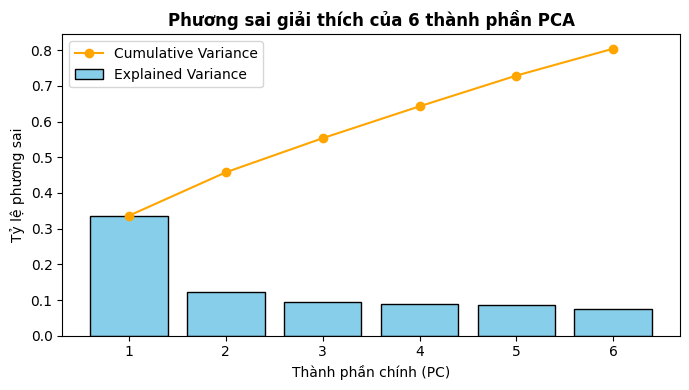

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=6))
])

X_continous_pca = pca_pipeline.fit_transform(X_continous)
X_continous_pca_df = pd.DataFrame(X_continous_pca,
                                  columns=[f'PC{i+1}_continous' for i in range(6)])

# Lấy thông tin PCA đã được fit
pca = pca_pipeline.named_steps['pca']

# Tính phương sai giải thích
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")

# Vẽ biểu đồ
plt.figure(figsize=(7, 4))
plt.bar(range(1, 7), explained_variance, color='skyblue', edgecolor='black', label='Explained Variance')
plt.plot(range(1, 7), cumulative_variance, marker='o', color='orange', label='Cumulative Variance')
plt.title('Phương sai giải thích của 6 thành phần PCA', fontsize=12, fontweight='bold')
plt.xlabel('Thành phần chính (PC)')
plt.ylabel('Tỷ lệ phương sai')
plt.xticks(range(1, 7))
plt.legend()
plt.tight_layout()
plt.show()


Nhận xét:  

Sau khi áp dụng PCA riêng cho **phần dữ liệu liên tục** (numerical features), phương sai tích lũy của **6 thành phần chính đầu tiên** đã **tăng đáng kể từ ~71.2% lên ~80.4%**, tức là **giữ lại thêm gần 10% thông tin quan trọng** so với trường hợp kết hợp cả dữ liệu phân loại đã mã hóa.  

- `PC1` chiếm **33.65%** – thành phần mạnh nhất, tập trung tốt hơn so với trước.  
- Chỉ cần **6 thành phần** đã giải thích được **80.4%** phương sai → hiệu quả giảm chiều cao.

###Thực hiện giảm chiều với LDA

**Về phương pháp LDA (Linear Discriminant Analysis)**

Phân tích phân biệt tuyến tính hay còn được gọi là Phân tích Phân biệt Chuẩn, là một bài toán phân loại có giám sát giúp phân tách hai hoặc nhiều lớp bằng cách chuyển đổi không gian dữ liệu nhiều chiều thành không gian ít chiều. Nó được sử dụng để xác định tổ hợp tuyến tính các đặc trưng giúp phân tách các lớp tốt nhất trong một tập dữ liệu.

**Cách hoạt động**
LDA hoạt động bằng cách tìm kiếm các hướng trong không gian đặc trưng để phân tách các lớp tốt nhất. Nó thực hiện điều này bằng cách tối đa hóa sự khác biệt giữa các giá trị trung bình của lớp trong khi giảm thiểu độ phân tán trong mỗi lớp.

Giả sử chúng ta có hai lớp với các mẫu có chiều như (`x₁, x₂, ..., xₙ`)

Trong đó:
- `N₁` mẫu thuộc về lớp `c₁`
- `N₂` mẫu thuộc về lớp `c₂`

Nếu như (xᵢ) biểu diễn một điểm dữ liệu, phép chiếu của nó lên đường được biểu diễn bởi vectơ đơn vị v là vᵀxᵢ.
Hãy để phương tiện của hai lớp (c₁) và (c₂) trước khi chiếu là μ₁ và μ₂ tương ứng.
Sau khi chiếu, các phương tiện mới là:

`μ̂₁ = vᵀμ₁
μ̂₂ = vᵀμ₂`

Mục tiêu của chúng ta là bình thường hóa sự khác biệt (`|μ̂₁ - μ̂₂|`) để tối đa hóa sự phân tách lớp.

Sự phân tán cho các mẫu của lớp (`c₁`) được tính như sau:
`S₁² = ∑ (vᵀxᵢ - μ̂₁)²` với xᵢ thuộc lớp `c₁`

Tương tự cho lớp (c₂):
`S₂² = ∑ (vᵀxᵢ - μ̂₂)²` với xᵢ thuộc lớp `c₂`

Hàm mục tiêu tối ưu

Mục tiêu là tối đa hóa tỷ lệ phân tán giữa các lớp so với phân tán trong lớp, điều này đưa chúng ta đến tiêu chí sau:
`J(v) = (μ̂₁ - μ̂₂)² / (S₁² + S₂²)`


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X, y)

In [ ]:
X_lda

array([[ 1.03419726, -1.06390449],
       [ 0.78458671, -0.08129841],
       [ 0.2639555 , -1.47917727],
       ...,
       [-1.4299713 , -0.71548726],
       [-2.52947408, -0.38860357],
       [-2.16399208,  1.17469239]])

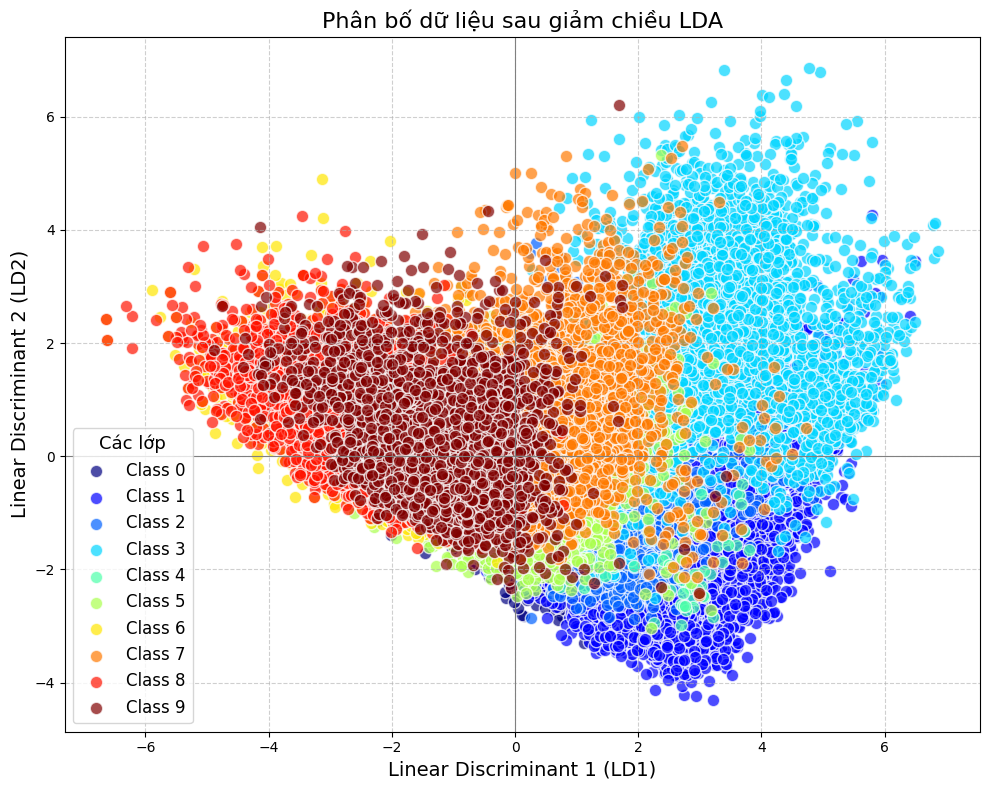

In [ ]:
# Tạo đồ thị
plt.figure(figsize=(10, 8))

# Lấy danh sách các nhãn lớp duy nhất
unique_classes = np.unique(y)

# Chọn một bảng màu
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))

# Vẽ từng lớp
for i, (class_label, color) in enumerate(zip(unique_classes, colors)):
    # Lấy các điểm dữ liệu thuộc về lớp hiện tại
    X_class = X_lda[y == class_label]
    plt.scatter(X_class[:, 0], X_class[:, 1], color=color, label=f'Class {class_label}',
                alpha=0.7, edgecolors='w', s=80)

plt.xlabel('Linear Discriminant 1 (LD1)', fontsize=14)
plt.ylabel('Linear Discriminant 2 (LD2)', fontsize=14)
plt.title('Phân bố dữ liệu sau giảm chiều LDA', fontsize=16)
plt.legend(title='Các lớp', fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()

In [ ]:
explained_var_ratio = lda.explained_variance_ratio_
print("Phương sai giải thích của từng thành phần LDA:", explained_var_ratio)
print("Tổng lượng thông tin được bảo tồn:", explained_var_ratio.sum())


Phương sai giải thích của từng thành phần LDA: [0.63030229 0.17714434]
Tổng lượng thông tin được bảo tồn: 0.8074466265873089


Phương sai tích lũy của hai thành phần (`LD1` và `LD2`) đạt `~80.6%`. Con số này đại diện cho `80.7%` khả năng phân tách (separability) giữa các lớp đã được bảo toàn sau khi giảm chiều.

Phần lớn khả năng phân tách này (chiếm `63.7%`) được tập trung mạnh mẽ vào `LD1`. Điều này có nghĩa đây là  "trục" chính duy nhất mà trên đó, các lớp của bạn được phân biệt rõ rệt nhất. Gần `2/3` sức mạnh phân loại của dữ liệu nằm gọn trên thành phần đầu tiên này.

Phần khác, `LD2` (chiếm `17.0%`), đóng vai trò là trục quan trọng thứ hai, nắm bắt phần lớn thông tin phân tách còn lại mà `LD1` bỏ sót.

###So sánh các phương pháp đảo chiều

**Về phương pháp phân tích:**
| Tiêu chí        | PCA (Principal Component Analysis)              | LDA (Linear Discriminant Analysis)                          |
| --------------- | ----------------------------------------------- | ----------------------------------------------------------- |
| Mục tiêu        | Giảm chiều dữ liệu **theo phương sai lớn nhất** | Giảm chiều dữ liệu **theo khả năng phân biệt giữa các lớp** |
| Loại học        | Không giám sát (unsupervised)                   | Có giám sát (supervised)                                    |
| Dữ liệu yêu cầu | Không cần nhãn                                  | Cần nhãn lớp                                                |
| Kết quả chính   | Thành phần chính (PCs)                          | Trục phân biệt (Discriminant axis)                          |
| Số chiều tối đa | ≤ số đặc trưng                                  | ≤ (số lớp - 1)                                              |

**Về kết quả thực nghiệm:**

Sử dụng PCA trên dữ liệu ban đầu đã chuẩn hóa:

PC1: 0.2869 (0.2869 tích lũy)
PC2: 0.1447 (0.4316 tích lũy)
PC3: 0.0829 (0.5145 tích lũy)
PC4: 0.0721 (0.5866 tích lũy)
PC5: 0.0680 (0.6546 tích lũy)
PC6: 0.0593 (0.7139 tích lũy)

Phương sai tích lũy từ `PC1` đến `PC6` chỉ đạt **71.4%** (từ `PC1`: 28.69%, `PC2`: 14.47%, ..., `PC6`: 5.93%), tức là chỉ giữ lại **khoảng 71%** thông tin quan trọng của dữ liệu gốc. .Do một số vấn đề về dữ liệu bị pha loãng sau khi dùng One Hot Encode, khiến cho PCA kém hiệu quả.

Sử dụng PCA trên dữ liệu liên tục đã được chuẩn hóa:

PC1: 0.3365 (0.3365 tích lũy)
PC2: 0.1215 (0.4580 tích lũy)
PC3: 0.0956 (0.5536 tích lũy)
PC4: 0.0892 (0.6428 tích lũy)
PC5: 0.0862 (0.7290 tích lũy)
PC6: 0.0754 (0.8043 tích lũy)

Sau khi sử dụng giảm chiều cho dữ liệu liên tục thì phương sai lên đến `~80%`, giữ lại được nhiều thông tin. Tuy nhiên phương án này không phản ánh được toàn bộ tập dữ liệu ban đầu, do đây chỉ là một trong 2 phần của dữ liệu.

Sử dụng LDA trên dữ liệu ban đầu đã chuẩn hóa:

Phương sai tích lũy của hai thành phần (`LD1` và `LD2`) đạt `~80.7%`.

#Phần III: Các mô hình phân loại

# Navies Bayes

Khai báo các thư viện cần dùng


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import scipy.stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes  import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, explained_variance_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')


## Mô hình phân loại

### Xử lý dữ liệu

In [ ]:
df = pd.read_csv("music_genre.csv")
df.columns = df.columns.str.strip()

df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [ ]:
df.shape

(50005, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
# Đưa dữ liệu về dạng numpy
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df = df.drop_duplicates().dropna()
# tách thêm instance_id, track_name: ID và tên bài hát
X_origin = df.drop(['music_genre', 'instance_id', 'track_name'], axis=1)
y_origin = df['music_genre']
print(X_origin.shape)
print(y_origin.shape)

(45020, 15)
(45020,)


In [ ]:
lable_columns = ['artist_name', 'key', 'mode', 'obtained_date']

# Label Encoding cho từng cột
X_encoded_lable_df = X_origin[lable_columns].apply(lambda col: LabelEncoder().fit_transform(col))

# Tạo mảng numpy và danh sách cột mã hóa
X_encoded = X_encoded_lable_df.values
encoded_columns_final = [f"{col}_encoded" for col in lable_columns]

# Tạo DataFrame mã hóa
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns_final, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
columns_to_drop = lable_columns
X_encode = pd.concat([X_origin.drop(columns=columns_to_drop), X_encoded_df], axis=1)

# In kết quả
print("DataFrame gốc:")
print(X_origin)
print("\n" + "="*30 + "\n")
print("DataFrame đã mã hóa hoàn chỉnh:")
print(X_encode)

DataFrame gốc:
                artist_name  popularity  acousticness  danceability  \
0                  Röyksopp        27.0       0.00468         0.652   
1      Thievery Corporation        31.0       0.01270         0.622   
2            Dillon Francis        28.0       0.00306         0.620   
3                  Dubloadz        34.0       0.02540         0.774   
4               What So Not        32.0       0.00465         0.638   
...                     ...         ...           ...           ...   
50000                 BEXEY        59.0       0.03340         0.913   
50001             Roy Woods        72.0       0.15700         0.709   
50002                Berner        51.0       0.00597         0.693   
50003             The-Dream        65.0       0.08310         0.782   
50004     Naughty By Nature        67.0       0.10200         0.862   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0             -1.0   0.941           0.79200  A#     

In [ ]:
#Dữ liệu liên tục
continous_data = [
    'popularity', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
#Dữ liệu rời rạc
classified_data = ['artist_name_encoded', 'key_encoded', 'mode_encoded', 'obtained_date_encoded']

X_encoded_df = pd.DataFrame(X_encode)

X_continous = X_encoded_df[continous_data]     #Dữ liệu liên tục
X_classified = X_encoded_df[classified_data]   #Dữ liệu rời rạc

In [ ]:
X_continous


popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  valence  
0               0.79200     0.115    -5.201       0.0748  100.889    0.759  
1               0.95000     0.124    -7.043       0.0300  115.002    0.531  
2               0.01180     0.534    -4.617       0.0345  127.994    0.333  
3               0.00253     0.157    -4.498       0.2390  128.014    0.270  
4               0.90900     0.157    -6.266       0.0413  145.036    0.323  
...                 ...       ...       ...          ...      ...      ...  
50000           0.00000     0.119    -7.022       0.2980   98.028    0.330  
50001           0.00000     0.109    -9.814       0.0550  122.043    0.113  
50002           0.00000     0.143    -5.443       0.1460  131.079    0.395  
50003           0.00000     0.106    -5.016       0.0441   75.886    0.354  
50004           0.00000     0.272   -13.652       0.1010   99.201    0.765  

[45020 rows x 11 columns]

In [ ]:
X_classified

artist_name_encoded  key_encoded  mode_encoded  obtained_date_encoded
0                     4833            1             1                      2
1                     5880            5             1                      2
2                     1527           11             0                      2
3                     1638            4             0                      2
4                     6268            9             0                      2
...                    ...          ...           ...                    ...
50000                  475            4             0                      2
50001                 4785            2             0                      2
50002                  588            5             0                      2
50003                 5868           10             1                      2
50004                 4032            9             1                      2

[45020 rows x 4 columns]

In [ ]:
# Chuẩn hoá dữ liệu liên tục
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)

In [ ]:
X_continous_scaled

array([[-1.10991062, -0.8843778 ,  0.52258528, ..., -0.1870859 ,
        -0.6221643 ,  1.22434325],
       [-0.85273873, -0.86088544,  0.35485278, ..., -0.62860616,
        -0.1615777 ,  0.30185558],
       [-1.04561764, -0.88912314,  0.34367061, ..., -0.58425703,
         0.26242436, -0.49925212],
       ...,
       [ 0.4331207 , -0.88059911,  0.75181969, ...,  0.51461595,
         0.36310527, -0.24840021],
       [ 1.3332223 , -0.65466816,  1.2494261 , ..., -0.48964554,
        -1.43815287, -0.41428615],
       [ 1.46180824, -0.59930586,  1.69671277, ...,  0.07112461,
        -0.67725324,  1.24861924]])

In [ ]:
# Ghép dữ liệu liên tục đã chuẩn hoá với dữ liệu rời rạc
X_encoded_std = np.concatenate([X_classified.values, X_continous_scaled], axis=1)
new_columns = classified_data + continous_data
X_encoded_std_df = pd.DataFrame(X_encoded_std, columns=new_columns)

In [ ]:
X_encoded_std

array([[ 4.83300000e+03,  1.00000000e+00,  1.00000000e+00, ...,
        -1.87085897e-01, -6.22164300e-01,  1.22434325e+00],
       [ 5.88000000e+03,  5.00000000e+00,  1.00000000e+00, ...,
        -6.28606160e-01, -1.61577701e-01,  3.01855584e-01],
       [ 1.52700000e+03,  1.10000000e+01,  0.00000000e+00, ...,
        -5.84257026e-01,  2.62424360e-01, -4.99252122e-01],
       ...,
       [ 5.88000000e+02,  5.00000000e+00,  0.00000000e+00, ...,
         5.14615949e-01,  3.63105268e-01, -2.48400214e-01],
       [ 5.86800000e+03,  1.00000000e+01,  1.00000000e+00, ...,
        -4.89645542e-01, -1.43815287e+00, -4.14286154e-01],
       [ 4.03200000e+03,  9.00000000e+00,  1.00000000e+00, ...,
         7.11246137e-02, -6.77253238e-01,  1.24861924e+00]])

In [ ]:
X_encoded_std_df

artist_name_encoded  key_encoded  mode_encoded  obtained_date_encoded  \
0                   4833.0          1.0           1.0                    2.0   
1                   5880.0          5.0           1.0                    2.0   
2                   1527.0         11.0           0.0                    2.0   
3                   1638.0          4.0           0.0                    2.0   
4                   6268.0          9.0           0.0                    2.0   
...                    ...          ...           ...                    ...   
45015                475.0          4.0           0.0                    2.0   
45016               4785.0          2.0           0.0                    2.0   
45017                588.0          5.0           0.0                    2.0   
45018               5868.0         10.0           1.0                    2.0   
45019               4032.0          9.0           1.0                    2.0   

       popularity  acousticness  danceability  duration_ms    energy  \
0       -1.109911     -0.884378      0.522585    -1.732130  1.290882   
1       -0.852739     -0.860885      0.354853    -0.022528  1.098070   
2       -1.045618     -0.889123      0.343671    -0.043517  0.587686   
3       -0.659860     -0.823684      1.204697    -0.425216  0.379752   
4       -0.788446     -0.884466      0.444310     0.009394 -0.047459   
...           ...           ...           ...          ...       ...   
45015    0.947464     -0.800251      1.981858    -1.732130 -0.096607   
45016    1.783273     -0.438199      0.841277     0.240357 -0.898099   
45017    0.433121     -0.880599      0.751820    -0.248158  0.617931   
45018    1.333222     -0.654668      1.249426     0.325824 -0.482231   
45019    1.461808     -0.599306      1.696713     0.361020  0.160475   

       instrumentalness  liveness  loudness  speechiness     tempo   valence  
0              1.872550 -0.488216  0.639344    -0.187086 -0.622164  1.224343  
1              2.357446 -0.432561  0.340140    -0.628606 -0.161578  0.301856  
2             -0.521854  2.102795  0.734206    -0.584257  0.262424 -0.499252  
3             -0.550303 -0.228496  0.753536     1.431165  0.263077 -0.754150  
4              2.231618 -0.228496  0.466352    -0.517241  0.818601 -0.539712  
...                 ...       ...       ...          ...       ...       ...  
45015         -0.558068 -0.463480  0.343551     2.012631 -0.715535 -0.511390  
45016         -0.558068 -0.525318 -0.109966    -0.382222  0.068210 -1.389372  
45017         -0.558068 -0.315069  0.600035     0.514616  0.363105 -0.248400  
45018         -0.558068 -0.543870  0.669395    -0.489646 -1.438153 -0.414286  
45019         -0.558068  0.482640 -0.733389     0.071125 -0.677253  1.248619  

[45020 rows x 15 columns]

### Navie Bayes

#### Tự định nghĩa lớp MyNaviesBayes

In [ ]:
class MyNavieBayes:
  def __init__(self):
    self.mu_list_gs = None
    self.mu_list_cg = None
    self.std_list = None
    self.pi_list = None
    self.classes_ = None

  def fit(self, X, y):
    if len(X) == 2:
      self.X_continous = X[0]
      self.X_classified = X[1]
      self.y = y
      self.classes_ = np.unique(y)

      self.fit_Gaussian(self.X_continous, self.y)
      self.fit_Categorical(self.X_classified, self.y)
    else:
      self.X = X
      self.y = y
      self.classes_ = np.unique(y)
      self.fit_Gaussian(self.X, self.y)

  def fit_Gaussian(self, X, y):

    self.mu_list_gs = []
    self.std_list = []
    self.pi_list = []

    for c in self.classes_:
        X_c = X[y == c]  # chọn mẫu có nhãn c
        self.mu_list_gs.append(np.mean(X_c, axis=0))
        self.std_list.append(np.std(X_c, axis=0) + 1e-9)  # tránh chia cho 0
        self.pi_list.append(len(X_c) / len(X))

    self.mu_list_gs = np.array(self.mu_list_gs)
    self.std_list = np.array(self.std_list)
    self.pi_list = np.array(self.pi_list)

  def fit_Categorical(self, X, y):
    n_features = X.shape[1]

    self.mu_list_cg = []

    for c in self.classes_:
        X_c = X[y == c]

        probs_per_feature = []
        for j in range(n_features):
            values, counts = np.unique(X_c[:, j], return_counts=True)
            max_val = int(np.max(X[:, j])) + 1
            probs = np.zeros(max_val)
            probs[values.astype(int)] = counts
            probs_per_feature.append(probs)
        self.mu_list_cg.append(probs_per_feature)

  def predict_GaussianNB(self, X):
    y_pred = []
    for x in X:  # duyệt từng mẫu test
        scores_list = []
        for p in range(len(self.classes_)):
            # Tính tích của PDF cho tất cả các feature
            probs = norm.pdf(x=x, loc=self.mu_list_gs[p], scale=self.std_list[p])
            score = np.prod(probs) * self.pi_list[p]
            scores_list.append(score)
        y_pred.append(scores_list)
    return np.array(y_pred)

  def predict_CategoricalNB(self, X):
    log_scores = []
    for c in range(len(self.classes_)):
        probs_per_feature = self.mu_list_cg[c]
        log_score = np.log(self.pi_list[c] + 1e-12)  # tránh log(0)
        for j, xi in enumerate(X):
            probs = probs_per_feature[j] / np.sum(probs_per_feature[j])
            if int(xi) < len(probs):
                log_score += np.log(probs[int(xi)] + 1e-12)
            else:
                log_score += np.log(1e-6)  # smoothing
        log_scores.append(log_score)
    # Chuyển log-probabilities về xác suất tương đối
    log_scores = np.array(log_scores)
    scores = np.exp(log_scores - np.max(log_scores))  # để tránh overflow
    return scores / np.sum(scores)


  def predict_all_CategoricalNB(self, X):
    preds = []
    for i in range(X.shape[0]):       # Lặp qua từng hàng (mẫu)
        preds.append(self.predict_CategoricalNB(X[i]))
    return np.array(preds)

  def predict(self, X):
    log_pred_gaussian = np.log(self.predict_GaussianNB(X) + 1e-12)
    return np.array([self.classes_[np.argmax(row)] for row in log_pred_gaussian])

  def predict_all(self, X):
    log_pred_gaussian = np.log(self.predict_GaussianNB(X[0]) + 1e-12)
    log_pred_categorical = np.log(self.predict_all_CategoricalNB(X[1]) + 1e-12)
    log_pred_gaussian /= X[0].shape[1]
    log_pred_categorical /= X[1].shape[1]
    log_pred_all = log_pred_gaussian + log_pred_categorical
    return np.array([self.classes_[np.argmax(row)] for row in log_pred_all])


#### HybridNavieBayes

In [ ]:
class HybridNaiveBayes:
    def __init__(self):
        self.model_gaussian = GaussianNB()
        self.model_categorical = CategoricalNB()
        self.classes_ = None

    def fit(self, X, y):
        self.model_gaussian.fit(X[0], y)
        self.model_categorical.fit(X[1], y)
        self.classes_ = self.model_gaussian.classes_

    def predict_log_proba(self, X):
        X_gaussian, X_categorical = X[0], X[1]
        log_prob_gauss = self.model_gaussian.predict_log_proba(X_gaussian)
        log_prob_categ = self.model_categorical.predict_log_proba(X_categorical)
        log_prob_gauss /= X[0].shape[1]
        log_prob_categ /= X[1].shape[1]
        log_prob_total = log_prob_gauss + log_prob_categ
        return log_prob_total

    def predict_proba(self, X):
        log_prob_total = self.predict_log_proba(X)
        prob_total = np.exp(log_prob_total)
        prob_total /= prob_total.sum(axis=1, keepdims=True)
        return prob_total

    def predict_all(self, X):
        prob_total = self.predict_proba(X)
        return self.classes_[np.argmax(prob_total, axis=1)]


#### Các hàm hỗ trợ

In [ ]:
def split_train_test(X, y, test_size=None, classified_idx=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  if classified_idx == 0:
    return (X_train, X_test, y_train, y_test)

  X_train_classicfied = X_train[:,:classified_idx]
  X_test_classicfied = X_test[:,:classified_idx]
  X_train_continous = X_train[:,classified_idx:]
  X_test_continous = X_test[:,classified_idx:]
  X_train_all = [X_train_continous, X_train_classicfied]
  X_test_all = [X_test_continous, X_test_classicfied]
  return (X_train_all, X_test_all, y_train, y_test)


In [ ]:
def auto_predict(X_train, X_test, y_train, y_test, model = None, string = "String Default"):
  if len(X_train)==2:
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict_all(X_test)
    end_time = time.time()
  else:
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

  print()
  print('=' * 20, string, '=' * 20)
  print(f'Total time: {end_time - start_time:.4f} seconds')

  print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}')
  print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

  print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
  print('=' * 100)
  print()

In [ ]:
def auto_predict_with_reduction(X, y, model = None, reduce_name = None, n_components=None, test_size=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  if reduce_name == 'PCA':
    model_rd = PCA(n_components=n_components)
    X_train = model_rd.fit_transform(X_train)
    X_test = model_rd.transform(X_test)
  elif reduce_name == 'LDA':
    model_rd = LDA(n_components=n_components)
    X_train = model_rd.fit_transform(X_train, y_train)
    X_test = model_rd.transform(X_test)

  start_time = time.time()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  end_time = time.time()

  print()
  print('=' * 20, f"Chạy với dữ liệu đã giảm chiều bằng {reduce_name} với train:validation = {int(10-test_size*10)}:{int(test_size*10)}", '=' * 20)
  print(f"Số chiều sau khi giảm: {n_components}")
  print(f'Total time: {end_time - start_time:.4f} seconds')

  print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}')
  print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

  print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
  print('=' * 100)
  print()

## Dự đoán với mô hình

### Dữ liệu ban đầu đã encode và chuẩn hoá

#### Thực nghiệm với mô hình tự định nghĩa

In [ ]:
X, y = X_encoded_std.copy(), y_origin.copy()
classified_idx = 4

In [ ]:
model = MyNavieBayes()
auto_predict(*split_train_test(X, y, test_size=0.2, classified_idx=classified_idx), model=model, string="Chạy với dữ liệu ban đầu có train:validation = 4:1")


==================== Chạy với dữ liệu ban đầu có train:validation = 4:1 ====================
Total time: 11.1514 seconds
Accuracy of model MyNavieBayes: 0.7669

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.68      0.62      0.65       856
       Anime       0.97      0.92      0.94       919
       Blues       0.87      0.84      0.85       873
   Classical       0.91      0.95      0.93       881
     Country       0.72      0.93      0.81       921
  Electronic       0.87      0.92      0.89       931
     Hip-Hop       0.53      0.59      0.56       905
        Jazz       0.86      0.81      0.83       888
         Rap       0.52      0.50      0.51       914
        Rock       0.76      0.58      0.66       916

    accuracy                           0.77      9004
   macro avg       0.77      0.77      0.77      9004
weighted avg       0.77      0.77      0.77      9004

Confusion matrix:
[[535   1  10   1  63  31  65  15  3

In [ ]:
model = MyNavieBayes()
auto_predict(*split_train_test(X, y, test_size=0.3, classified_idx=classified_idx), model=model, string="Chạy với dữ liệu ban đầu có train:validation = 7:3")


==================== Chạy với dữ liệu ban đầu có train:validation = 7:3 ====================
Total time: 16.3951 seconds
Accuracy of model MyNavieBayes: 0.7667

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.69      0.63      0.66      1321
       Anime       0.97      0.92      0.94      1382
       Blues       0.87      0.83      0.85      1312
   Classical       0.91      0.95      0.93      1339
     Country       0.71      0.93      0.80      1354
  Electronic       0.88      0.92      0.90      1405
     Hip-Hop       0.53      0.60      0.56      1345
        Jazz       0.86      0.80      0.83      1325
         Rap       0.52      0.49      0.51      1337
        Rock       0.76      0.58      0.66      1386

    accuracy                           0.77     13506
   macro avg       0.77      0.77      0.76     13506
weighted avg       0.77      0.77      0.77     13506

Confusion matrix:
[[ 832    1   15    5  109   35   97

In [ ]:
model = MyNavieBayes()
auto_predict(*split_train_test(X, y, test_size=0.4, classified_idx=classified_idx), model, string="Chạy với dữ liệu ban đầu có train:validation = 6:4")


==================== Chạy với dữ liệu ban đầu có train:validation = 6:4 ====================
Total time: 22.2195 seconds
Accuracy of model MyNavieBayes: 0.7628

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.70      0.63      0.66      1764
       Anime       0.96      0.92      0.94      1840
       Blues       0.88      0.81      0.84      1799
   Classical       0.90      0.95      0.93      1789
     Country       0.68      0.92      0.78      1779
  Electronic       0.88      0.91      0.89      1829
     Hip-Hop       0.53      0.61      0.57      1784
        Jazz       0.85      0.80      0.82      1777
         Rap       0.53      0.49      0.51      1798
        Rock       0.76      0.57      0.65      1849

    accuracy                           0.76     18008
   macro avg       0.77      0.76      0.76     18008
weighted avg       0.77      0.76      0.76     18008

Confusion matrix:
[[1106    1   19    6  151   43  131

#### Thực nghiệm với thư viện Sklearn

In [ ]:
model_hybrid = HybridNaiveBayes()
auto_predict(*split_train_test(X, y, test_size=0.2, classified_idx=classified_idx), model=model_hybrid, string="Chạy với dữ liệu ban đầu có train:validation = 4:1 (sklearn)")


==================== Chạy với dữ liệu ban đầu có train:validation = 4:1 (sklearn) ====================
Total time: 0.1962 seconds
Accuracy of model HybridNaiveBayes: 0.7122

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.66      0.55      0.60       856
       Anime       0.95      0.85      0.90       919
       Blues       0.85      0.77      0.81       873
   Classical       0.82      0.89      0.85       881
     Country       0.63      0.90      0.74       921
  Electronic       0.81      0.85      0.83       931
     Hip-Hop       0.50      0.57      0.53       905
        Jazz       0.76      0.68      0.72       888
         Rap       0.50      0.48      0.49       914
        Rock       0.73      0.55      0.63       916

    accuracy                           0.71      9004
   macro avg       0.72      0.71      0.71      9004
weighted avg       0.72      0.71      0.71      9004

Confusion matrix:
[[471   1  10   5  90  

In [ ]:
model_hybrid = HybridNaiveBayes()
auto_predict(*split_train_test(X, y, test_size=0.3, classified_idx=classified_idx), model=model_hybrid, string="Chạy với dữ liệu ban đầu có train:validation = 7:3 (sklearn)")


==================== Chạy với dữ liệu ban đầu có train:validation = 7:3 (sklearn) ====================
Total time: 0.2025 seconds
Accuracy of model HybridNaiveBayes: 0.7090

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.67      0.56      0.61      1321
       Anime       0.95      0.83      0.88      1382
       Blues       0.84      0.76      0.80      1312
   Classical       0.80      0.90      0.84      1339
     Country       0.61      0.91      0.73      1354
  Electronic       0.82      0.85      0.84      1405
     Hip-Hop       0.50      0.58      0.54      1345
        Jazz       0.75      0.66      0.70      1325
         Rap       0.50      0.48      0.49      1337
        Rock       0.74      0.56      0.64      1386

    accuracy                           0.71     13506
   macro avg       0.72      0.71      0.71     13506
weighted avg       0.72      0.71      0.71     13506

Confusion matrix:
[[ 735    1   15   13  

In [ ]:
model_hybrid = HybridNaiveBayes()
auto_predict(*split_train_test(X, y, test_size=0.4, classified_idx=classified_idx), model=model_hybrid, string="Chạy với dữ liệu ban đầu có train:validation = 6:4 (sklearn)")


==================== Chạy với dữ liệu ban đầu có train:validation = 6:4 (sklearn) ====================
Total time: 0.1810 seconds
Accuracy of model HybridNaiveBayes: 0.7014

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.67      0.54      0.60      1764
       Anime       0.94      0.83      0.88      1840
       Blues       0.85      0.74      0.79      1799
   Classical       0.80      0.90      0.85      1789
     Country       0.57      0.91      0.70      1779
  Electronic       0.81      0.84      0.82      1829
     Hip-Hop       0.50      0.60      0.55      1784
        Jazz       0.75      0.64      0.69      1777
         Rap       0.51      0.47      0.49      1798
        Rock       0.73      0.55      0.62      1849

    accuracy                           0.70     18008
   macro avg       0.71      0.70      0.70     18008
weighted avg       0.72      0.70      0.70     18008

Confusion matrix:
[[ 946    1   19   16  

#### Nhận xét

Kết quả so sánh

Mô hình tự cài đặt (GaussianNB + CategoricalNB): độ chính xác ≈ 76%

Mô hình sklearn (GaussianNB + CategoricalNB): độ chính xác ≈ 70%

→ Mô hình sử dụng numpy thuần hoạt động hiệu quả hơn trên cùng dữ liệu và cùng tỷ lệ train/test (4:1, 7:3, 6:4).

Nguyên nhân chính

(1) Smoothing khác nhau: Phương pháp thủ công đã thêm 1e-6 khi xác suất bằng 0 → tránh overfitting vào lớp có tần suất cao, mô hình ổn định hơn.

(2) Dữ liệu không thật: Gaussian	Sklearn GaussianNB hoạt động kém nếu dữ liệu không phân phối chuẩn, trong khi cách numpy thuần nhân hàm mật độ xác suất (PDF) rồi chuẩn hóa lại có thể “mềm hóa” lỗi giả định này.

### Dữ liệu đã giảm chiều

#### Giảm chiều trên cả tập dữ liệu

In [ ]:
X, y = X_encoded_std.copy(), y_origin.copy()

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 6
Total time: 6.3966 seconds
Accuracy of model MyNavieBayes: 0.3598

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.22      0.14      0.17       856
       Anime       0.47      0.40      0.43       919
       Blues       0.32      0.16      0.21       873
   Classical       0.70      0.84      0.76       881
     Country       0.24      0.41      0.31       921
  Electronic       0.28      0.14      0.18       931
     Hip-Hop       0.43      0.51      0.46       905
        Jazz       0.31      0.33      0.32       888
         Rap       0.42      0.26      0.32       914
        Rock       0.24      0.42      0.30       916

    accuracy                           0.36      9004
   macro avg       0.36      0.36      0.35      9004
weighted avg       0.36      0.36      0.35      9004

Confusion matr

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 6
Total time: 22.3519 seconds
Accuracy of model MyNavieBayes: 0.3547

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.23      0.13      0.17      1321
       Anime       0.47      0.39      0.43      1382
       Blues       0.30      0.16      0.21      1312
   Classical       0.70      0.84      0.76      1339
     Country       0.23      0.42      0.30      1354
  Electronic       0.26      0.13      0.17      1405
     Hip-Hop       0.41      0.45      0.43      1345
        Jazz       0.31      0.32      0.32      1325
         Rap       0.39      0.28      0.33      1337
        Rock       0.25      0.42      0.31      1386

    accuracy                           0.35     13506
   macro avg       0.36      0.35      0.34     13506
weighted avg       0.36      0.35      0.34     13506

Confusion mat

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 6
Total time: 15.5204 seconds
Accuracy of model MyNavieBayes: 0.3573

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.24      0.14      0.18      1764
       Anime       0.48      0.38      0.43      1840
       Blues       0.32      0.17      0.22      1799
   Classical       0.69      0.84      0.76      1789
     Country       0.23      0.44      0.30      1779
  Electronic       0.23      0.12      0.16      1829
     Hip-Hop       0.41      0.46      0.43      1784
        Jazz       0.33      0.34      0.33      1777
         Rap       0.41      0.28      0.33      1798
        Rock       0.25      0.41      0.31      1849

    accuracy                           0.36     18008
   macro avg       0.36      0.36      0.35     18008
weighted avg       0.36      0.36      0.35     18008

Confusion mat

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 6
Total time: 0.1075 seconds
Accuracy of model GaussianNB: 0.3600

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.22      0.14      0.17       856
       Anime       0.47      0.40      0.43       919
       Blues       0.32      0.16      0.21       873
   Classical       0.70      0.84      0.76       881
     Country       0.24      0.41      0.31       921
  Electronic       0.28      0.14      0.18       931
     Hip-Hop       0.43      0.51      0.46       905
        Jazz       0.31      0.33      0.32       888
         Rap       0.42      0.26      0.32       914
        Rock       0.24      0.42      0.30       916

    accuracy                           0.36      9004
   macro avg       0.36      0.36      0.35      9004
weighted avg       0.36      0.36      0.35      9004

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 6
Total time: 0.1013 seconds
Accuracy of model GaussianNB: 0.3550

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.23      0.13      0.17      1321
       Anime       0.47      0.39      0.43      1382
       Blues       0.30      0.16      0.21      1312
   Classical       0.70      0.84      0.76      1339
     Country       0.23      0.42      0.30      1354
  Electronic       0.26      0.13      0.17      1405
     Hip-Hop       0.41      0.45      0.43      1345
        Jazz       0.31      0.33      0.32      1325
         Rap       0.39      0.28      0.33      1337
        Rock       0.25      0.42      0.31      1386

    accuracy                           0.36     13506
   macro avg       0.36      0.35      0.34     13506
weighted avg       0.36      0.36      0.34     13506

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 6
Total time: 0.0921 seconds
Accuracy of model GaussianNB: 0.3577

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.24      0.14      0.18      1764
       Anime       0.48      0.38      0.43      1840
       Blues       0.32      0.16      0.22      1799
   Classical       0.69      0.84      0.76      1789
     Country       0.23      0.44      0.30      1779
  Electronic       0.24      0.12      0.16      1829
     Hip-Hop       0.41      0.46      0.43      1784
        Jazz       0.33      0.34      0.33      1777
         Rap       0.41      0.28      0.33      1798
        Rock       0.25      0.42      0.31      1849

    accuracy                           0.36     18008
   macro avg       0.36      0.36      0.35     18008
weighted avg       0.36      0.36      0.35     18008

Confusion matrix

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 2
Total time: 7.6190 seconds
Accuracy of model MyNavieBayes: 0.4037

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.35      0.29       856
       Anime       0.64      0.57      0.60       919
       Blues       0.36      0.46      0.41       873
   Classical       0.76      0.85      0.80       881
     Country       0.27      0.20      0.23       921
  Electronic       0.30      0.26      0.28       931
     Hip-Hop       0.33      0.29      0.31       905
        Jazz       0.38      0.23      0.29       888
         Rap       0.45      0.40      0.42       914
        Rock       0.32      0.43      0.37       916

    accuracy                           0.40      9004
   macro avg       0.41      0.40      0.40      9004
weighted avg       0.41      0.40      0.40      9004

Confusion matr

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 2
Total time: 10.4098 seconds
Accuracy of model MyNavieBayes: 0.4024

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.24      0.32      0.28      1321
       Anime       0.65      0.56      0.61      1382
       Blues       0.35      0.45      0.40      1312
   Classical       0.75      0.85      0.80      1339
     Country       0.26      0.21      0.23      1354
  Electronic       0.31      0.26      0.28      1405
     Hip-Hop       0.35      0.25      0.29      1345
        Jazz       0.36      0.22      0.28      1325
         Rap       0.43      0.47      0.45      1337
        Rock       0.33      0.42      0.37      1386

    accuracy                           0.40     13506
   macro avg       0.40      0.40      0.40     13506
weighted avg       0.40      0.40      0.40     13506

Confusion mat

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 2
Total time: 13.3317 seconds
Accuracy of model MyNavieBayes: 0.4046

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.24      0.32      0.28      1764
       Anime       0.66      0.56      0.61      1840
       Blues       0.37      0.46      0.41      1799
   Classical       0.75      0.84      0.80      1789
     Country       0.25      0.21      0.23      1779
  Electronic       0.31      0.27      0.29      1829
     Hip-Hop       0.35      0.20      0.25      1784
        Jazz       0.38      0.24      0.29      1777
         Rap       0.41      0.50      0.45      1798
        Rock       0.32      0.43      0.37      1849

    accuracy                           0.40     18008
   macro avg       0.41      0.40      0.40     18008
weighted avg       0.41      0.40      0.40     18008

Confusion mat

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 2
Total time: 0.1385 seconds
Accuracy of model GaussianNB: 0.4037

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.35      0.29       856
       Anime       0.64      0.57      0.60       919
       Blues       0.36      0.46      0.41       873
   Classical       0.76      0.85      0.80       881
     Country       0.27      0.20      0.23       921
  Electronic       0.30      0.26      0.28       931
     Hip-Hop       0.33      0.29      0.31       905
        Jazz       0.38      0.23      0.29       888
         Rap       0.45      0.40      0.42       914
        Rock       0.32      0.43      0.37       916

    accuracy                           0.40      9004
   macro avg       0.41      0.40      0.40      9004
weighted avg       0.41      0.40      0.40      9004

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 2
Total time: 0.0999 seconds
Accuracy of model GaussianNB: 0.4024

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.24      0.32      0.28      1321
       Anime       0.65      0.56      0.61      1382
       Blues       0.35      0.45      0.40      1312
   Classical       0.75      0.85      0.80      1339
     Country       0.26      0.21      0.23      1354
  Electronic       0.31      0.26      0.28      1405
     Hip-Hop       0.35      0.25      0.29      1345
        Jazz       0.36      0.22      0.28      1325
         Rap       0.43      0.47      0.45      1337
        Rock       0.33      0.42      0.37      1386

    accuracy                           0.40     13506
   macro avg       0.40      0.40      0.40     13506
weighted avg       0.40      0.40      0.40     13506

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 2
Total time: 0.1456 seconds
Accuracy of model GaussianNB: 0.4046

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.24      0.32      0.28      1764
       Anime       0.66      0.56      0.61      1840
       Blues       0.37      0.46      0.41      1799
   Classical       0.75      0.84      0.80      1789
     Country       0.25      0.21      0.23      1779
  Electronic       0.31      0.27      0.29      1829
     Hip-Hop       0.35      0.20      0.25      1784
        Jazz       0.38      0.24      0.29      1777
         Rap       0.41      0.50      0.45      1798
        Rock       0.32      0.43      0.37      1849

    accuracy                           0.40     18008
   macro avg       0.41      0.40      0.40     18008
weighted avg       0.41      0.40      0.40     18008

Confusion matrix

#### Giảm chiều trên tập liên tục

In [ ]:
X, y = X_continous_scaled.copy(), y_origin.copy()

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 6
Total time: 6.5477 seconds
Accuracy of model MyNavieBayes: 0.3707

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.18      0.21       856
       Anime       0.45      0.39      0.42       919
       Blues       0.30      0.19      0.23       873
   Classical       0.68      0.84      0.75       881
     Country       0.25      0.40      0.31       921
  Electronic       0.32      0.15      0.21       931
     Hip-Hop       0.42      0.55      0.47       905
        Jazz       0.37      0.36      0.36       888
         Rap       0.43      0.18      0.25       914
        Rock       0.27      0.47      0.34       916

    accuracy                           0.37      9004
   macro avg       0.37      0.37      0.36      9004
weighted avg       0.37      0.37      0.36      9004

Confusion matr

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 6
Total time: 19.0632 seconds
Accuracy of model MyNavieBayes: 0.3706

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.18      0.21      1321
       Anime       0.46      0.39      0.42      1382
       Blues       0.30      0.20      0.24      1312
   Classical       0.67      0.84      0.75      1339
     Country       0.24      0.40      0.30      1354
  Electronic       0.35      0.17      0.23      1405
     Hip-Hop       0.42      0.51      0.46      1345
        Jazz       0.37      0.35      0.36      1325
         Rap       0.43      0.20      0.27      1337
        Rock       0.27      0.46      0.34      1386

    accuracy                           0.37     13506
   macro avg       0.38      0.37      0.36     13506
weighted avg       0.38      0.37      0.36     13506

Confusion mat

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 6
Total time: 26.8990 seconds
Accuracy of model MyNavieBayes: 0.3731

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.24      0.18      0.21      1764
       Anime       0.47      0.39      0.43      1840
       Blues       0.32      0.20      0.24      1799
   Classical       0.68      0.84      0.75      1789
     Country       0.24      0.42      0.31      1779
  Electronic       0.34      0.18      0.23      1829
     Hip-Hop       0.41      0.49      0.45      1784
        Jazz       0.38      0.37      0.38      1777
         Rap       0.45      0.22      0.30      1798
        Rock       0.27      0.45      0.34      1849

    accuracy                           0.37     18008
   macro avg       0.38      0.37      0.36     18008
weighted avg       0.38      0.37      0.36     18008

Confusion mat

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 6
Total time: 0.1485 seconds
Accuracy of model GaussianNB: 0.3707

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.18      0.21       856
       Anime       0.45      0.39      0.42       919
       Blues       0.30      0.19      0.23       873
   Classical       0.68      0.84      0.75       881
     Country       0.25      0.40      0.31       921
  Electronic       0.32      0.15      0.21       931
     Hip-Hop       0.42      0.55      0.47       905
        Jazz       0.37      0.36      0.36       888
         Rap       0.43      0.18      0.25       914
        Rock       0.27      0.47      0.34       916

    accuracy                           0.37      9004
   macro avg       0.37      0.37      0.36      9004
weighted avg       0.37      0.37      0.36      9004

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 6
Total time: 0.2062 seconds
Accuracy of model GaussianNB: 0.3707

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.18      0.21      1321
       Anime       0.46      0.39      0.42      1382
       Blues       0.30      0.20      0.24      1312
   Classical       0.67      0.84      0.75      1339
     Country       0.24      0.40      0.30      1354
  Electronic       0.35      0.17      0.23      1405
     Hip-Hop       0.42      0.51      0.46      1345
        Jazz       0.37      0.35      0.36      1325
         Rap       0.43      0.20      0.27      1337
        Rock       0.27      0.46      0.34      1386

    accuracy                           0.37     13506
   macro avg       0.38      0.37      0.36     13506
weighted avg       0.38      0.37      0.36     13506

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="PCA",n_components=6, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng PCA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 6
Total time: 0.0905 seconds
Accuracy of model GaussianNB: 0.3732

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.18      0.21      1764
       Anime       0.47      0.39      0.43      1840
       Blues       0.32      0.20      0.24      1799
   Classical       0.68      0.84      0.75      1789
     Country       0.24      0.42      0.31      1779
  Electronic       0.34      0.18      0.23      1829
     Hip-Hop       0.41      0.49      0.45      1784
        Jazz       0.38      0.37      0.38      1777
         Rap       0.45      0.22      0.30      1798
        Rock       0.27      0.45      0.34      1849

    accuracy                           0.37     18008
   macro avg       0.38      0.37      0.36     18008
weighted avg       0.38      0.37      0.36     18008

Confusion matrix

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 2
Total time: 13.3917 seconds
Accuracy of model MyNavieBayes: 0.4044

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.35      0.29       856
       Anime       0.64      0.57      0.60       919
       Blues       0.37      0.46      0.41       873
   Classical       0.76      0.85      0.80       881
     Country       0.27      0.20      0.23       921
  Electronic       0.30      0.27      0.28       931
     Hip-Hop       0.33      0.29      0.31       905
        Jazz       0.38      0.23      0.29       888
         Rap       0.44      0.41      0.42       914
        Rock       0.33      0.43      0.37       916

    accuracy                           0.40      9004
   macro avg       0.41      0.41      0.40      9004
weighted avg       0.41      0.40      0.40      9004

Confusion mat

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 2
Total time: 16.2315 seconds
Accuracy of model MyNavieBayes: 0.4046

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.34      0.28      1321
       Anime       0.65      0.56      0.60      1382
       Blues       0.36      0.46      0.40      1312
   Classical       0.75      0.85      0.80      1339
     Country       0.25      0.21      0.23      1354
  Electronic       0.31      0.27      0.29      1405
     Hip-Hop       0.36      0.25      0.29      1345
        Jazz       0.37      0.22      0.28      1325
         Rap       0.42      0.47      0.45      1337
        Rock       0.33      0.42      0.37      1386

    accuracy                           0.40     13506
   macro avg       0.41      0.40      0.40     13506
weighted avg       0.41      0.40      0.40     13506

Confusion mat

In [ ]:
model = MyNavieBayes()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 2
Total time: 20.5017 seconds
Accuracy of model MyNavieBayes: 0.4052

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.33      0.28      1764
       Anime       0.65      0.56      0.60      1840
       Blues       0.37      0.46      0.41      1799
   Classical       0.76      0.84      0.80      1789
     Country       0.25      0.21      0.23      1779
  Electronic       0.31      0.28      0.29      1829
     Hip-Hop       0.35      0.21      0.26      1784
        Jazz       0.38      0.24      0.29      1777
         Rap       0.41      0.50      0.45      1798
        Rock       0.33      0.43      0.37      1849

    accuracy                           0.41     18008
   macro avg       0.41      0.40      0.40     18008
weighted avg       0.41      0.41      0.40     18008

Confusion mat

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.2)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 8:2 ====================
Số chiều sau khi giảm: 2
Total time: 0.1465 seconds
Accuracy of model GaussianNB: 0.4044

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.35      0.29       856
       Anime       0.64      0.57      0.60       919
       Blues       0.37      0.46      0.41       873
   Classical       0.76      0.85      0.80       881
     Country       0.27      0.20      0.23       921
  Electronic       0.30      0.27      0.28       931
     Hip-Hop       0.33      0.29      0.31       905
        Jazz       0.38      0.23      0.29       888
         Rap       0.44      0.41      0.42       914
        Rock       0.33      0.43      0.37       916

    accuracy                           0.40      9004
   macro avg       0.41      0.41      0.40      9004
weighted avg       0.41      0.40      0.40      9004

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.3)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 7:3 ====================
Số chiều sau khi giảm: 2
Total time: 0.1223 seconds
Accuracy of model GaussianNB: 0.4046

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.34      0.28      1321
       Anime       0.65      0.56      0.60      1382
       Blues       0.36      0.46      0.40      1312
   Classical       0.75      0.85      0.80      1339
     Country       0.25      0.21      0.23      1354
  Electronic       0.31      0.27      0.29      1405
     Hip-Hop       0.36      0.25      0.29      1345
        Jazz       0.37      0.22      0.28      1325
         Rap       0.42      0.47      0.45      1337
        Rock       0.33      0.42      0.37      1386

    accuracy                           0.40     13506
   macro avg       0.41      0.40      0.40     13506
weighted avg       0.41      0.40      0.40     13506

Confusion matrix

In [ ]:
model = GaussianNB()
auto_predict_with_reduction(X, y, model=model, reduce_name="LDA",n_components=2, test_size=0.4)


==================== Chạy với dữ liệu đã giảm chiều bằng LDA với train:validation = 6:4 ====================
Số chiều sau khi giảm: 2
Total time: 0.0900 seconds
Accuracy of model GaussianNB: 0.4052

 Classification Report:
               precision    recall  f1-score   support

 Alternative       0.25      0.33      0.28      1764
       Anime       0.65      0.56      0.60      1840
       Blues       0.37      0.46      0.41      1799
   Classical       0.76      0.84      0.80      1789
     Country       0.25      0.21      0.23      1779
  Electronic       0.31      0.28      0.29      1829
     Hip-Hop       0.35      0.21      0.26      1784
        Jazz       0.38      0.24      0.29      1777
         Rap       0.41      0.50      0.45      1798
        Rock       0.33      0.43      0.37      1849

    accuracy                           0.41     18008
   macro avg       0.41      0.40      0.40     18008
weighted avg       0.41      0.41      0.40     18008

Confusion matrix

#### Nhận Xét

Kết quả tổng quan

- Độ chính xác (Accuracy):
  - Khoảng 35–37% đối với tập dữ liệu đã giảm về 6 chiều bằng phương pháp PCA.
  - Khoảng 40% đối với tập dữ liệu đã giảm về 2 chiều bằng phương pháp LDA.


Nhận xét về hiệu năng

- Độ chính xác khá thấp (≈ 36%), cho thấy mô hình chưa tách biệt rõ các lớp sau khi giảm chiều.

- Tuy nhiên, một số lớp như “Classical” (recall 0.84, f1-score 0.76) được nhận dạng rất tốt, chứng tỏ dữ liệu lớp này có đặc trưng rõ ràng.

- Các lớp khác như “Electronic”, “Alternative”, “Blues” bị nhầm lẫn nhiều → có thể đặc trưng trùng lặp hoặc bị mất thông tin phân tách sau khi giảm chiều.

- GaussianNB lại là mô hình tuyến tính, giả định độc lập giữa các đặc trưng. Kết quả validation thấp cho thấy mô hình không học được đủ thông tin để phân biệt giữa các lớp, dẫn đến underfitting (mô hình không đủ năng lực biểu diễn).

Phân tích nguyên nhân

- Giảm chiều mạnh (chỉ còn 6 chiều với PCA và 2 chiều với LDA) đều làm mất một phần thông tin, đặc biệt khi dữ liệu ban đầu có tính phi tuyến mạnh.
- Giả định Gaussian đơn giản:	GaussianNB giả định mỗi đặc trưng tuân theo phân phối chuẩn độc lập — điều này thường không đúng hoàn toàn với dữ liệu thực tế (như âm nhạc hoặc văn bản).
Các lớp chồng lấn cao	Một số thể loại (Rock, Country, Alternative, Electronic) có phổ đặc trưng gần nhau → mô hình tuyến tính khó phân biệt.
- Không có bước cân bằng đặc trưng	PCA và LDA đều ưu tiên giữ phương sai toàn cục, không nhất thiết tối ưu cho phân loại từng lớp nhỏ.

Kết luận
- Cả PCA và LDA đều giúp giảm thời gian huấn luyện và đơn giản hóa dữ liệu,
tuy nhiên mô hình GaussianNB sau khi giảm chiều chỉ đạt độ chính xác trung bình (≈36%),
cho thấy thông tin phân loại bị mất đáng kể sau khi nén xuống 6 chiều.
- Một số lớp rõ ràng như Classical được nhận dạng tốt, nhưng các lớp có đặc trưng tương đồng bị nhầm lẫn nhiều.
- Mô hình phù hợp cho bước phân tích nhanh, minh họa khái niệm, nhưng cần mô hình phi tuyến hoặc lai để cải thiện hiệu quả thực tế.

### Trực quan dự đoán sau khi giảm chiều

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time


def plot_prediction_vs_true_multiclass(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
    """
    Trực quan hóa kết quả dự đoán so với thực tế cho bài toán đa lớp
    """
    y_pred = np.array(y_pred).flatten()
    y_test = np.array(y_test).flatten()

    plt.figure(figsize=(14, 5))

    # --- Subplot 1: Dự đoán đúng/sai ---
    plt.subplot(1, 2, 1)
    x = np.arange(len(y_test))
    correct = (y_pred == y_test)

    plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng',
                marker='o', alpha=0.6, s=20)
    plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai',
                marker='x', alpha=0.8, s=30)

    plt.title("Phân bố dự đoán đúng/sai theo chỉ số mẫu", fontsize=12)
    plt.xlabel("Chỉ số mẫu (Index)")
    plt.ylabel("Nhãn thực tế")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)

    # --- Subplot 2: Số lượng đúng/sai theo từng lớp ---
    plt.subplot(1, 2, 2)
    classes = np.unique(y_test)
    correct_counts = []
    incorrect_counts = []

    for cls in classes:
        mask = (y_test == cls)
        correct_counts.append(np.sum(correct & mask))
        incorrect_counts.append(np.sum(~correct & mask))

    x_pos = np.arange(len(classes))
    width = 0.35

    plt.bar(x_pos - width / 2, correct_counts, width, label='Đúng', color='green', alpha=0.7)
    plt.bar(x_pos + width / 2, incorrect_counts, width, label='Sai', color='red', alpha=0.7)

    plt.title("Số lượng dự đoán đúng/sai theo từng lớp", fontsize=12)
    plt.xlabel("Nhãn lớp")
    plt.ylabel("Số lượng mẫu")
    plt.xticks(x_pos, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_confusion_heatmap_multiclass(y_pred, y_test, class_names=None, title="Ma trận nhầm lẫn"):
    """
    Vẽ ma trận nhầm lẫn dạng heatmap cho bài toán đa lớp
    """
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))

    if class_names is None:
        # Nếu không có class_names, tạo tự động theo số lớp thực tế
        num_classes = cm.shape[0]
        class_names = [f'Class {i}' for i in range(num_classes)]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Số lượng mẫu'})

    plt.title(title, fontsize=14)
    plt.xlabel("Dự đoán", fontsize=12)
    plt.ylabel("Thực tế", fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_class_distribution(y_pred, y_test, title="Phân bố nhãn: Dự đoán vs Thực tế"):
    """
    So sánh phân bố nhãn giữa tập dự đoán và tập thực tế
    """
    y_pred = np.array(y_pred).flatten()
    y_test = np.array(y_test).flatten()

    classes = np.unique(np.concatenate([y_pred, y_test]))  # hợp cả 2 để tránh thiếu lớp
    pred_counts = [np.sum(y_pred == i) for i in classes]
    true_counts = [np.sum(y_test == i) for i in classes]

    plt.figure(figsize=(10, 5))
    x = np.arange(len(classes))
    width = 0.35

    plt.bar(x - width/2, true_counts, width, label='Thực tế', color='blue', alpha=0.7)
    plt.bar(x + width/2, pred_counts, width, label='Dự đoán', color='orange', alpha=0.7)

    plt.title(title, fontsize=14)
    plt.xlabel("Nhãn lớp")
    plt.ylabel("Số lượng mẫu")
    plt.xticks(x, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


def helper_and_plot(X_train, X_test, y_train, y_test, model=None, command='Default command',
                    reduce_name=None, n_components=2, class_names=None):
    """
    Hàm tổng hợp: huấn luyện mô hình, in kết quả, vẽ biểu đồ đánh giá
    """
    if reduce_name == 'PCA':
        reducer = PCA(n_components=n_components)
        X_train = reducer.fit_transform(X_train)
        X_test = reducer.transform(X_test)
    elif reduce_name == 'LDA':
        reducer = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = reducer.fit_transform(X_train, y_train)
        X_test = reducer.transform(X_test)

    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    y_pred_train = model.predict(X_train)

    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time:.4f}s')
    print(f'Accuracy (Test): {accuracy_score(y_test, y_pred):.4f}')
    print(f'Accuracy (Train): {accuracy_score(y_train, y_pred_train):.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred, target_names=class_names if class_names else None))
    print('=' * 60)
    print()

    # --- Vẽ biểu đồ ---
    plot_prediction_vs_true_multiclass(y_pred, y_test, title=f"Kết quả dự đoán - {command}")
    plot_confusion_heatmap_multiclass(y_pred, y_test, class_names=class_names,
                                      title=f"Ma trận nhầm lẫn - {command}")
    plot_class_distribution(y_pred, y_test, title=f"Phân bố nhãn - {command}")



==================== Default command ====================
X_train: (36016, 2), X_test: (9004, 2)
Total time: 6.1849s
Accuracy (Test): 0.4044
Accuracy (Train): 0.4072

Classification Report:
              precision    recall  f1-score   support

 Alternative       0.25      0.35      0.29       856
       Anime       0.64      0.57      0.60       919
       Blues       0.37      0.46      0.41       873
   Classical       0.76      0.85      0.80       881
     Country       0.27      0.20      0.23       921
  Electronic       0.30      0.27      0.28       931
     Hip-Hop       0.33      0.29      0.31       905
        Jazz       0.38      0.23      0.29       888
         Rap       0.44      0.41      0.42       914
        Rock       0.33      0.43      0.37       916

    accuracy                           0.40      9004
   macro avg       0.41      0.41      0.40      9004
weighted avg       0.41      0.40      0.40      9004




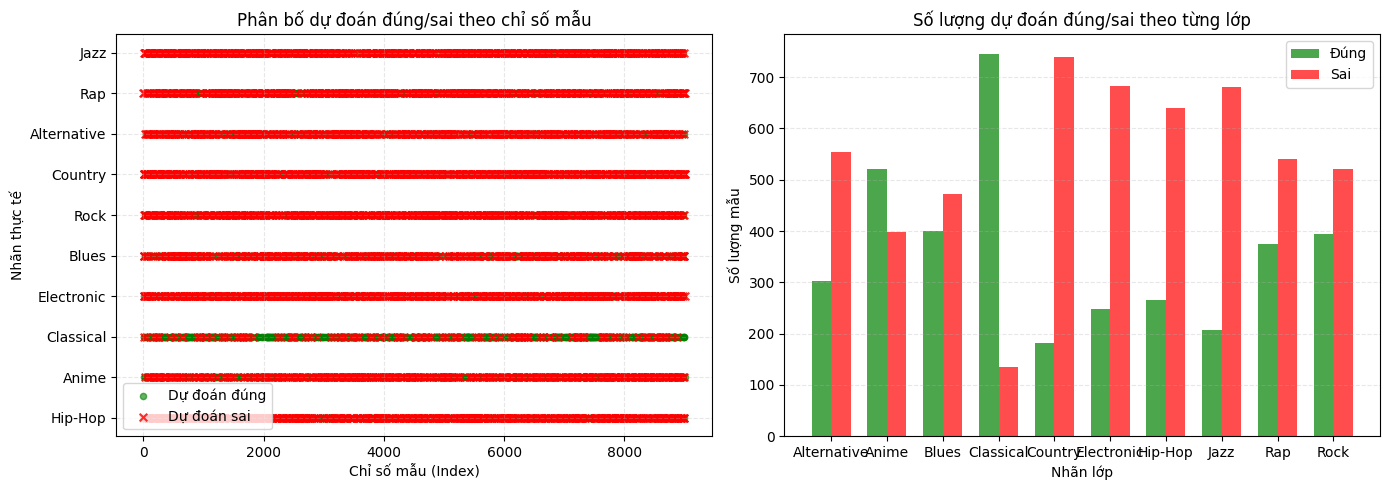

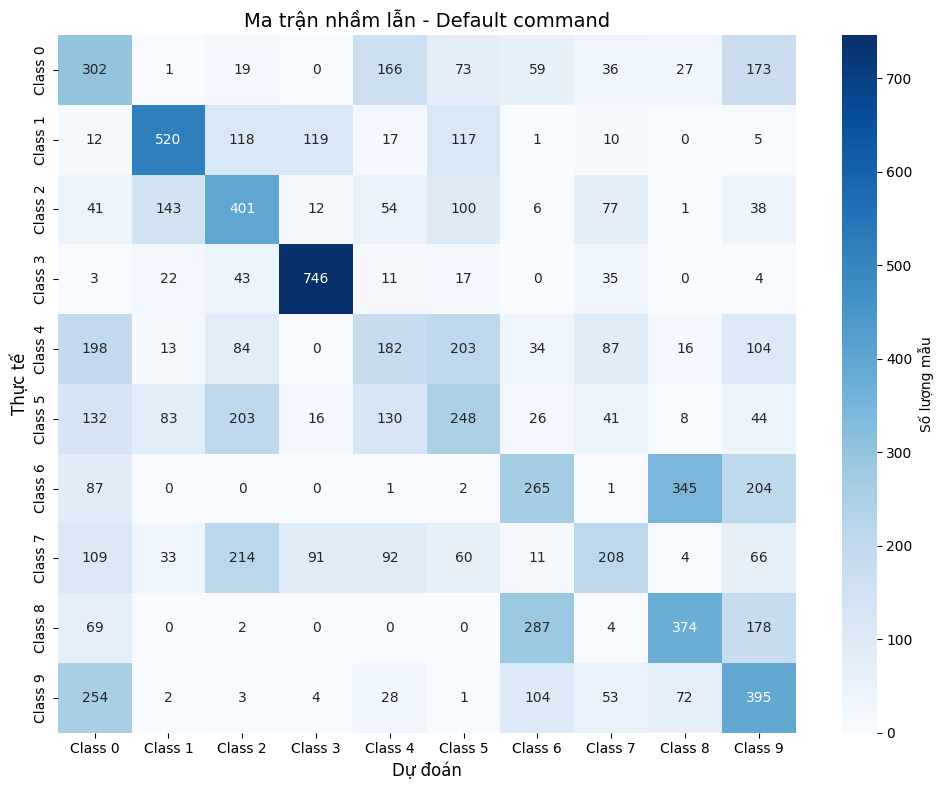

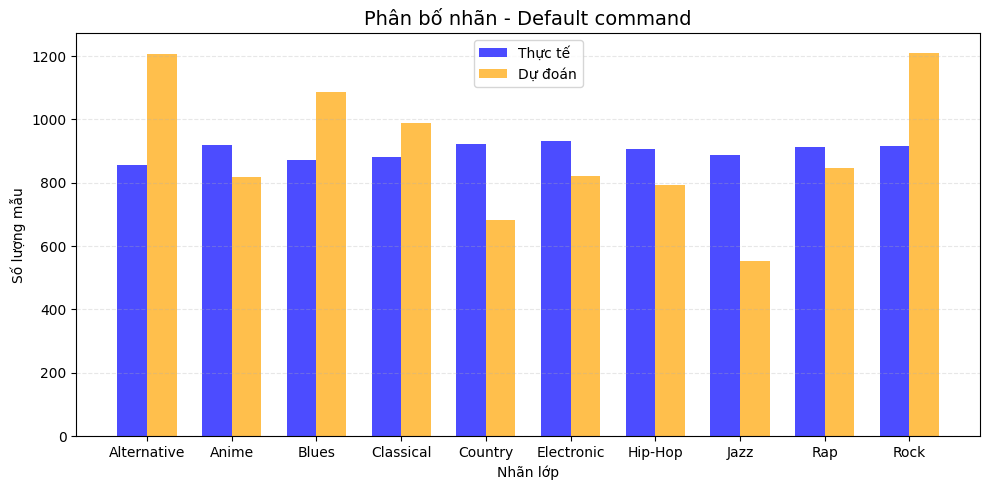

In [ ]:
model = MyNavieBayes()
helper_and_plot(*split_train_test(X, y, test_size=0.2, classified_idx=0), model=model, reduce_name="LDA",n_components=2)

Nhận xét Phương pháp giảm chiều LDA
1. Hiệu suất tổng quan

Độ chính xác (Accuracy Test) = 0.4044
→ Chỉ khoảng 40% mẫu test được dự đoán đúng.

Độ chính xác (Train) = 0.4072, gần bằng Test
→ Mô hình không bị overfitting, nhưng hiệu suất còn thấp ⇒ có thể do dữ liệu khó phân biệt hoặc đặc trưng chưa đủ mạnh (underfitting).

2. Biểu đồ phân bố nhãn

Các thanh màu vàng (dự đoán) lệch khá nhiều so với thanh xanh (thực tế) ở vài lớp:

Alternative, Rock → Dự đoán nhiều hơn thực tế ⇒ mô hình hay đoán nhầm sang các lớp này.

Country, Jazz → Dự đoán ít hơn thực tế ⇒ mô hình khó nhận dạng các lớp này.

3. Nguyên nhân

Đặc trưng (feature) giữa các thể loại nhạc khá giống nhau, gây khó phân biệt.

Khi dùng LDA giảm xuống 2 chiều, có thể làm mất nhiều thông tin ⇒ hiệu suất giảm.

Phân phối không chuẩn khiến mô hình Naviebayes giả định sai mô hình ⇒
Ước lượng xác suất kém chính xác


# KNN

#Khai báo thư viện

In [ ]:
!pip install -q category-encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from  sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.1 MB/s eta 0:00:00


#Xử lý dữ liệu

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('music_genre.csv')

# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [ ]:
#Hiển thị kích thước của dữ liệu
df.shape

(50005, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce') #đưa dữ liệu về dạng numpy
print("Số dòng trùng lặp:", df.duplicated().sum())

missing_before = df.isna().sum()
missing_count = missing_before.sum()

print(f"Tổng số giá trị bị thiếu trước khi xử lý: {missing_count} ({missing_count/df.size*100:.2f}%)")
print(f"\nChi tiết missing values theo từng cột:")
print(missing_before[missing_before > 0].sort_values(ascending=False))

Số dòng trùng lặp: 4
Tổng số giá trị bị thiếu trước khi xử lý: 5070 (0.56%)

Chi tiết missing values theo từng cột:
tempo               4985
instance_id            5
artist_name            5
track_name             5
acousticness           5
popularity             5
duration_ms            5
energy                 5
instrumentalness       5
danceability           5
key                    5
liveness               5
mode                   5
loudness               5
speechiness            5
obtained_date          5
valence                5
music_genre            5
dtype: int64


In [ ]:
df = df.drop_duplicates().dropna()

In [ ]:
X = df.drop(['music_genre', 'instance_id'], axis=1) # tách thêm instance_id: đó là ID của các bài hát
y = df['music_genre']

#Chuẩn bị dữ liệu

##Toàn bộ dữ liệu

###Mã hóa dữ liệu bằng Onehot encode và label encode trong thư viện Sklearn

In [ ]:
X_origin = X.copy()
y_origin = y.copy()

In [ ]:
onehot_columns = ['key', 'mode']
target_columns = ['artist_name', 'track_name', 'obtained_date']

# One-Hot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X_origin[onehot_columns])
ohe_cols = onehot_encoder.get_feature_names_out(onehot_columns)

# Target Encoding
target_encoder = TargetEncoder(smoothing=1.0)
X_target = target_encoder.fit_transform(X_origin[target_columns], y)
target_cols = [f"{col}_target" for col in target_columns]

# Gộp
X_encoded = np.hstack([X_onehot, X_target.values])
final_cols = np.concatenate([ohe_cols, target_cols])

X_encoded_df = pd.DataFrame(X_encoded, columns=final_cols, index=X.index)

# Gộp với cột số
columns_to_drop = onehot_columns + target_columns
X_encode = pd.concat([
    X_origin.drop(columns=columns_to_drop),
    X_encoded_df
], axis=1)

# ========================================
# KẾT QUẢ
# ========================================
print("DataFrame đã mã hóa hoàn chỉnh:")
print(X_encode)
print(f"\nShape: {X_encode.shape}")

DataFrame đã mã hóa hoàn chỉnh:
       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  ...  \
0               0.79200     0.115    -5.201       0.0

In [ ]:
# --- 1. Khởi tạo LabelEncoder ---
le = LabelEncoder()

# --- 2. Huấn luyện và mã hóa ---
y_encode = le.fit_transform(y_origin)

# --- 3. Chuyển về NumPy array ---
y_numpy = np.array(y_encode)

# --- 4. (Tùy chọn) In ra kết quả ---
print("Số lượng lớp:", len(le.classes_))
print("Một vài mã hóa mẫu:")
for label, code in zip(le.classes_[:10], range(10)):
    print(f"{label:15s} -> {code}")

print("\nKích thước mảng y_numpy:", y_numpy.shape)

Số lượng lớp: 10
Một vài mã hóa mẫu:
Alternative     -> 0
Anime           -> 1
Blues           -> 2
Classical       -> 3
Country         -> 4
Electronic      -> 5
Hip-Hop         -> 6
Jazz            -> 7
Rap             -> 8
Rock            -> 9

Kích thước mảng y_numpy: (45020,)


Dữ liệu sau khi được mã hóa:


*  Với X là `X_encode`
*  Với y là `y_encode`



###Thực hiện chia dữ liệu thành các tập train:test

In [ ]:
#Chia tập dữ liệu train:test với tỷ lệ 4:1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_encode, y_encode, test_size=0.2, random_state=42)

#Chia tập dữ liệu train:test với tỷ lệ 7:3
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_encode, y_encode, test_size=0.3, random_state=42)

#Chia tập dữ liệu train:test với tỉ lệ 6:4
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_encode, y_encode, test_size = 0.4, random_state=42)

###Chuẩn hóa dữ liệu với `StandardScaler`

In [ ]:
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

###Giảm chiều dữ liệu bằng PCA sau khi chuẩn hóa


####Giảm chiều giữ lại `n` thành phần

In [ ]:

pca_n6 = PCA(n_components=6)


#Giảm giữ lại 6 chiều
X_train_1_pcan6 = pca_n6.fit_transform(X_train_1)
X_test_1_pcan6 = pca_n6.transform(X_test_1)

X_train_2_pcan6 = pca_n6.fit_transform(X_train_2)
X_test_2_pcan6 = pca_n6.transform(X_test_2)

X_train_3_pcan6 = pca_n6.fit_transform(X_train_3)
X_test_3_pcan6 = pca_n6.transform(X_test_3)




####Giảm chiều giữ lại `%` covariance

In [ ]:

pca_95 = PCA(n_components=0.95)

#Giảm giữ lại 95% covariance
X_train_1_pca95 = pca_95.fit_transform(X_train_1)
X_test_1_pca95 = pca_95.transform(X_test_1)

X_train_2_pca95 = pca_95.fit_transform(X_train_2)
X_test_2_pca95 = pca_95.transform(X_test_2)

X_train_3_pca95 = pca_95.fit_transform(X_train_3)
X_test_3_pca95 = pca_95.transform(X_test_3)

###Giảm chiều dữ liệu bằng LDA sau khi chuẩn hóa

In [ ]:
#Giảm giữ lại 2 chiều
lda = LDA(n_components=2)

X_train_1_lda = lda.fit_transform(X_train_1, y_train_1)
X_test_1_lda = lda.transform(X_test_1)

X_train_2_lda = lda.fit_transform(X_train_2, y_train_2)
X_test_2_lda = lda.transform(X_test_2)

X_train_3_lda = lda.fit_transform(X_train_3, y_train_3)
X_test_3_lda = lda.transform(X_test_3)

#Xây dựng model KNN cho bài toán phân loại

##Không sử dụng thư viện

In [ ]:
class KNNClassifier:

    def __init__(self, n_neighbors, weights='uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights  # 'uniform' hoặc 'distance'
        self.X_train = None
        self.y_train = None
        self.classes_ = None

    def fit(self, X, y):
        """
        Lưu dữ liệu huấn luyện
        """
        X = np.array(X, dtype=np.float64)
        y = np.array(y)

        if X.ndim != 2 or y.ndim != 1:
            raise ValueError("X: 2D array, y: 1D array")
        if X.shape[0] != y.shape[0]:
            raise ValueError("X và y phải có cùng số mẫu")

        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y)
        return self

    def _compute_distances(self, X_test):
        """
        Vector hóa: tính khoảng cách Euclidean (n_test, n_train)
        """
        X_test = np.array(X_test, dtype=np.float64)
        if X_test.ndim == 1:
            X_test = X_test.reshape(1, -1)

        test_sq = np.sum(X_test ** 2, axis=1, keepdims=True)
        train_sq = np.sum(self.X_train ** 2, axis=1, keepdims=True).T
        cross = X_test @ self.X_train.T
        dist_sq = test_sq + train_sq - 2 * cross
        np.maximum(dist_sq, 0, out=dist_sq)
        return np.sqrt(dist_sq)

    def predict(self, X):
        """
        Dự đoán nhãn cho nhiều điểm
        """
        if self.X_train is None:
            raise ValueError("Chưa fit mô hình!")

        X = np.array(X, dtype=np.float64)
        if X.ndim == 1:
            X = X.reshape(1, -1)

        distances = self._compute_distances(X)
        k = min(self.n_neighbors, self.X_train.shape[0])
        nearest_idx = np.argpartition(distances, k-1, axis=1)[:, :k]

        predictions = []
        eps = 1e-8

        for i in range(X.shape[0]):
            idx = nearest_idx[i]
            dists = distances[i, idx]
            labels = self.y_train[idx]

            if self.weights == 'distance':
                weights = 1.0 / (dists + eps)
            else:
                weights = np.ones(k)

            # Đếm phiếu có trọng số
            vote = {}
            for label, w in zip(labels, weights):
                vote[label] = vote.get(label, 0) + w
            pred = max(vote, key=vote.get)
            predictions.append(pred)

        return np.array(predictions)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

def find_best_k_and_evaluate_custom(X_train, y_train, X_test, y_test, description):
    print("="*60)
    print(f"ĐANG XỬ LÝ: {description}")

    # Các giá trị K cần thử (lấy số lẻ từ 1 đến 31)
    k_values_to_test = list(range(1, 15, 2))
    n_splits = 5 # Dùng 5-fold CV
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    k_f1_scores = {}

    # Vòng lặp qua từng giá trị K
    for k in k_values_to_test:
        fold_scores = []

        # Vòng lặp qua 5 fold
        for train_index, val_index in kf.split(X_train):
            X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
            y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

            # Huấn luyện mô hình KNN tự định nghĩa với K hiện tại
            model = KNNClassifier(n_neighbors=k, weights='distance')
            model.fit(X_cv_train, y_cv_train)
            y_cv_pred = model.predict(X_cv_val)

            # Tính F1-score (weighted) vì dữ liệu mất cân bằng
            score = f1_score(y_cv_val, y_cv_pred, average='weighted', zero_division=0)
            fold_scores.append(score)

        # Tính điểm F1 trung bình của K này
        k_f1_scores[k] = np.mean(fold_scores)

    # Tìm K có điểm F1 cao nhất
    best_k = max(k_f1_scores, key=k_f1_scores.get)
    print(f"\n>>> Giá trị K tốt nhất tìm được (qua CV) là: {best_k} <<<")

    final_model = KNNClassifier(n_neighbors=best_k, weights='distance')
    final_model.fit(X_train, y_train)

    y_pred = final_model.predict(X_test)

    if y_pred is not None:
        print(f"\n--- Kết quả trên tập TEST (với K={best_k}) ---")
        print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
        print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))

    print("="*60 + "\n")

###Dữ liệu gốc chưa giảm chiều

In [ ]:
find_best_k_and_evaluate_custom(X_train_1,
                                y_train_1,
                                X_test_1,
                                y_test_1,
                                "KNN (Numpy thuần) trên dữ liệu gốc chưa giảm chiều (train/test: 4/1)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa giảm chiều (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4853

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.28      0.29      0.29       856
           1       0.80      0.66      0.72       919
           2       0.54      0.44      0.48       873
           3       0.79      0.85      0.82       881
           4       0.38      0.57      0.46       921
           5       0.60      0.54      0.57       931
           6       0.32      0.36      0.34       905
           7       0.51      0.42      0.46       888
           8       0.30      0.27      0.28       914
           9       0.43      0.45      0.44       916

    accuracy                           0.49      9004
   macro avg       0.50      0.48      0.49      9004
weighted avg       0.50      0.49      0.49      9004


Ma trận nhầ

In [ ]:
find_best_k_and_evaluate_custom(X_train_2,
                                y_train_2,
                                X_test_2,
                                y_test_2,
                                "KNN (Numpy thuần) trên dữ liệu gốc chưa giảm chiều (train/test: 7/3)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa giảm chiều (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4902

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.31      0.30      0.30      1321
           1       0.79      0.65      0.72      1382
           2       0.52      0.44      0.48      1312
           3       0.79      0.86      0.82      1339
           4       0.38      0.60      0.46      1354
           5       0.60      0.52      0.56      1405
           6       0.33      0.36      0.34      1345
           7       0.51      0.42      0.46      1325
           8       0.33      0.30      0.31      1337
           9       0.44      0.46      0.45      1386

    accuracy                           0.49     13506
   macro avg       0.50      0.49      0.49     13506
weighted avg       0.50      0.49      0.49     13506


Ma trận nhầ

In [ ]:
find_best_k_and_evaluate_custom(X_train_3,
                                y_train_3,
                                X_test_3,
                                y_test_3,
                                "KNN (Numpy thuần) trên dữ liệu gốc chưa giảm chiều (train/test: 6/4)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa giảm chiều (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4838

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.29      0.27      0.28      1764
           1       0.80      0.65      0.72      1840
           2       0.54      0.44      0.49      1799
           3       0.79      0.85      0.82      1789
           4       0.36      0.59      0.45      1779
           5       0.58      0.49      0.54      1829
           6       0.34      0.37      0.35      1784
           7       0.51      0.42      0.46      1777
           8       0.33      0.31      0.32      1798
           9       0.42      0.43      0.42      1849

    accuracy                           0.48     18008
   macro avg       0.50      0.48      0.48     18008
weighted avg       0.50      0.48      0.49     18008


Ma trận nhầ

###Dữ liệu đã giảm chiều PCA(n=6)

In [ ]:
find_best_k_and_evaluate_custom(X_train_1_pcan6,
                                y_train_1,
                                X_test_1_pcan6,
                                y_test_1,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 4/1)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4043

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.19      0.17      0.18       856
           1       0.64      0.61      0.63       919
           2       0.40      0.40      0.40       873
           3       0.78      0.83      0.80       881
           4       0.34      0.39      0.37       921
           5       0.39      0.32      0.35       931
           6       0.29      0.32      0.31       905
           7       0.42      0.38      0.40       888
           8       0.29      0.30      0.30       914
           9       0.28      0.31      0.29       916

    accuracy                           0.40      9004
   macro avg       0.40      0.40      0.40      9004
weighted avg       0.40      0.40      0.40      9004


Ma trận 

In [ ]:
find_best_k_and_evaluate_custom(X_train_2_pcan6,
                                y_train_2,
                                X_test_2_pcan6,
                                y_test_2,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 7/3)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4055

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.20      0.16      0.18      1321
           1       0.64      0.60      0.62      1382
           2       0.40      0.40      0.40      1312
           3       0.77      0.83      0.80      1339
           4       0.33      0.40      0.36      1354
           5       0.38      0.32      0.35      1405
           6       0.31      0.34      0.32      1345
           7       0.41      0.38      0.40      1325
           8       0.30      0.31      0.31      1337
           9       0.30      0.30      0.30      1386

    accuracy                           0.41     13506
   macro avg       0.40      0.41      0.40     13506
weighted avg       0.40      0.41      0.40     13506


Ma trận 

In [ ]:
find_best_k_and_evaluate_custom(X_train_3_pcan6,
                                y_train_3,
                                X_test_3_pcan6,
                                y_test_3,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 6/4)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4088

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.21      0.17      0.19      1764
           1       0.64      0.59      0.61      1840
           2       0.42      0.40      0.41      1799
           3       0.78      0.82      0.80      1789
           4       0.33      0.41      0.37      1779
           5       0.37      0.31      0.33      1829
           6       0.33      0.36      0.34      1784
           7       0.40      0.38      0.39      1777
           8       0.33      0.33      0.33      1798
           9       0.29      0.31      0.30      1849

    accuracy                           0.41     18008
   macro avg       0.41      0.41      0.41     18008
weighted avg       0.41      0.41      0.41     18008


Ma trận 

###Dữ liệu đã giảm chiều PCA(n=0.95)

In [ ]:
find_best_k_and_evaluate_custom(X_train_1_pca95,
                                y_train_1,
                                X_test_1_pca95,
                                y_test_1,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 4/1)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4755

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.29      0.30      0.29       856
           1       0.79      0.66      0.72       919
           2       0.50      0.41      0.45       873
           3       0.79      0.84      0.82       881
           4       0.39      0.56      0.46       921
           5       0.57      0.51      0.54       931
           6       0.31      0.33      0.32       905
           7       0.50      0.41      0.45       888
           8       0.31      0.29      0.30       914
           9       0.41      0.44      0.42       916

    accuracy                           0.48      9004
   macro avg       0.49      0.47      0.48      9004
weighted avg       0.49      0.48      0.48      9004


Ma tr

In [ ]:
find_best_k_and_evaluate_custom(X_train_2_pca95,
                                y_train_2,
                                X_test_2_pca95,
                                y_test_2,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 7/3)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4761

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.30      0.29      0.29      1321
           1       0.78      0.64      0.70      1382
           2       0.49      0.43      0.46      1312
           3       0.79      0.85      0.82      1339
           4       0.37      0.56      0.45      1354
           5       0.57      0.49      0.52      1405
           6       0.32      0.34      0.33      1345
           7       0.51      0.41      0.45      1325
           8       0.31      0.30      0.30      1337
           9       0.43      0.45      0.44      1386

    accuracy                           0.48     13506
   macro avg       0.49      0.48      0.48     13506
weighted avg       0.49      0.48      0.48     13506


Ma tr

In [ ]:
find_best_k_and_evaluate_custom(X_train_3_pca95,
                                y_train_3,
                                X_test_3_pca95,
                                y_test_3,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 6/4)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4759

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.30      0.28      0.29      1764
           1       0.77      0.63      0.69      1840
           2       0.51      0.43      0.47      1799
           3       0.79      0.85      0.82      1789
           4       0.36      0.56      0.44      1779
           5       0.55      0.47      0.51      1829
           6       0.34      0.37      0.35      1784
           7       0.51      0.42      0.46      1777
           8       0.32      0.30      0.31      1798
           9       0.42      0.44      0.43      1849

    accuracy                           0.48     18008
   macro avg       0.49      0.48      0.48     18008
weighted avg       0.49      0.48      0.48     18008


Ma tr

###Dữ liệu đã giảm chiều LDA

In [ ]:
find_best_k_and_evaluate_custom(X_train_1_lda,
                                y_train_1,
                                X_test_1_lda,
                                y_test_1,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều LDA (train/test: 4/1)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều LDA (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.3768

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.23      0.23      0.23       856
           1       0.68      0.70      0.69       919
           2       0.41      0.41      0.41       873
           3       0.78      0.80      0.79       881
           4       0.24      0.22      0.23       921
           5       0.18      0.13      0.15       931
           6       0.26      0.27      0.27       905
           7       0.36      0.39      0.37       888
           8       0.30      0.31      0.30       914
           9       0.28      0.32      0.30       916

    accuracy                           0.38      9004
   macro avg       0.37      0.38      0.37      9004
weighted avg       0.37      0.38      0.37      9004


Ma trận nhầm 

In [ ]:
find_best_k_and_evaluate_custom(X_train_2_lda,
                                y_train_2,
                                X_test_2_lda,
                                y_test_2,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều LDA (train/test: 7/3)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều LDA (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.3760

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.22      0.21      0.21      1321
           1       0.69      0.68      0.68      1382
           2       0.40      0.41      0.40      1312
           3       0.78      0.79      0.79      1339
           4       0.24      0.23      0.23      1354
           5       0.19      0.14      0.16      1405
           6       0.28      0.28      0.28      1345
           7       0.35      0.38      0.37      1325
           8       0.31      0.34      0.32      1337
           9       0.27      0.29      0.28      1386

    accuracy                           0.38     13506
   macro avg       0.37      0.38      0.37     13506
weighted avg       0.37      0.38      0.37     13506


Ma trận nhầm 

In [ ]:
find_best_k_and_evaluate_custom(X_train_3_lda,
                                y_train_3,
                                X_test_3_lda,
                                y_test_3,
                                "KNN (Numpy thuần) trên dữ liệu đã giảm chiều LDA (train/test: 6/4)")

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu đã giảm chiều LDA (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.3815

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.23      0.23      0.23      1764
           1       0.69      0.66      0.67      1840
           2       0.42      0.43      0.42      1799
           3       0.79      0.79      0.79      1789
           4       0.24      0.23      0.23      1779
           5       0.20      0.15      0.17      1829
           6       0.29      0.30      0.30      1784
           7       0.36      0.39      0.37      1777
           8       0.32      0.34      0.33      1798
           9       0.27      0.29      0.28      1849

    accuracy                           0.38     18008
   macro avg       0.38      0.38      0.38     18008
weighted avg       0.38      0.38      0.38     18008


Ma trận nhầm 

##Sử dụng thư viện `KNeighborsClassifier()`

In [ ]:
from sklearn.model_selection import GridSearchCV

def find_best_k_and_evaluate_sklearn(X_train, y_train, X_test, y_test, description):
    print("="*60)
    print(f"ĐANG XỬ LÝ (GridSearchCV): {description}")

    knn_model = KNeighborsClassifier()
    # Các giá trị K cần thử (lấy số lẻ từ 1 đến 31)
    param_grid = {'n_neighbors': list(range(1, 15, 2))}

    grid_search = GridSearchCV(
        knn_model,
        param_grid,
        cv=5,
        scoring='f1_weighted', # Rất quan trọng cho dữ liệu mất cân bằng
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']

    # TỰ ĐỘNG huấn luyện lại trên toàn bộ X_train
    best_model = grid_search.best_estimator_

    print(f"\n>>> Giá trị K tốt nhất tìm được (qua CV) là: {best_k} <<<")

    print(f"\n--- Kết quả trên tập TEST (với K={best_k}) ---")
    y_pred = best_model.predict(X_test)

    print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))
    print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
    print("="*60 + "\n")

###Dữ liệu gốc chưa giảm chiều

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_1,
                                y_train_1,
                                X_test_1,
                                y_test_1,
                                "KNN (thư viện) trên dữ liệu gốc chưa giảm chiều (train/test: 4/1)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu gốc chưa giảm chiều (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.5037

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.29      0.38      0.33       856
           1       0.78      0.66      0.71       919
           2       0.53      0.45      0.49       873
           3       0.78      0.84      0.81       881
           4       0.39      0.58      0.47       921
           5       0.60      0.53      0.56       931
           6       0.40      0.46      0.43       905
           7       0.53      0.39      0.45       888
           8       0.39      0.29      0.33       914
           9       0.49      0.45      0.47       916

    accuracy                           0.50      9004
   macro avg       0.52      0.50      0.50      9004
weighted avg       0.52      0.50      0.51      9004



In [ ]:
find_best_k_and_evaluate_sklearn(X_train_2,
                                y_train_2,
                                X_test_2,
                                y_test_2,
                                "KNN (thư viện) trên dữ liệu gốc chưa giảm chiều (train/test: 7/3)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu gốc chưa giảm chiều (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.5019

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.30      0.36      0.33      1321
           1       0.77      0.66      0.71      1382
           2       0.52      0.44      0.48      1312
           3       0.78      0.85      0.81      1339
           4       0.37      0.60      0.46      1354
           5       0.60      0.50      0.55      1405
           6       0.40      0.45      0.43      1345
           7       0.53      0.38      0.44      1325
           8       0.40      0.31      0.35      1337
           9       0.49      0.44      0.46      1386

    accuracy                           0.50     13506
   macro avg       0.52      0.50      0.50     13506
weighted avg       0.52      0.50      0.50     13506



In [ ]:
find_best_k_and_evaluate_sklearn(X_train_3,
                                y_train_3,
                                X_test_3,
                                y_test_3,
                                "KNN (thư viện) trên dữ liệu gốc chưa giảm chiều (train/test: 6/4)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu gốc chưa giảm chiều (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4939

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.29      0.35      0.31      1764
           1       0.77      0.66      0.71      1840
           2       0.52      0.44      0.48      1799
           3       0.78      0.85      0.81      1789
           4       0.35      0.59      0.44      1779
           5       0.59      0.48      0.53      1829
           6       0.41      0.46      0.43      1784
           7       0.53      0.39      0.45      1777
           8       0.40      0.32      0.35      1798
           9       0.46      0.40      0.43      1849

    accuracy                           0.49     18008
   macro avg       0.51      0.49      0.50     18008
weighted avg       0.51      0.49      0.50     18008



###Dữ liệu đã giảm chiều PCA(n=6)

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_1_pcan6,
                                y_train_1,
                                X_test_1_pcan6,
                                y_test_1,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 4/1)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4187

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.20      0.23      0.22       856
           1       0.62      0.62      0.62       919
           2       0.40      0.41      0.40       873
           3       0.78      0.84      0.81       881
           4       0.35      0.40      0.37       921
           5       0.38      0.31      0.34       931
           6       0.36      0.42      0.39       905
           7       0.43      0.35      0.38       888
           8       0.37      0.33      0.35       914
           9       0.30      0.28      0.29       916

    accuracy                           0.42      9004
   macro avg       0.42      0.42      0.42      9004
weighted avg       0.42      0.42      0.42      900

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_2_pcan6,
                                y_train_2,
                                X_test_2_pcan6,
                                y_test_2,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 7/3)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4198

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.21      0.23      0.22      1321
           1       0.62      0.61      0.61      1382
           2       0.39      0.40      0.40      1312
           3       0.77      0.83      0.80      1339
           4       0.34      0.43      0.38      1354
           5       0.37      0.30      0.33      1405
           6       0.38      0.46      0.41      1345
           7       0.43      0.35      0.39      1325
           8       0.37      0.32      0.34      1337
           9       0.32      0.27      0.29      1386

    accuracy                           0.42     13506
   macro avg       0.42      0.42      0.42     13506
weighted avg       0.42      0.42      0.42     1350

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_3_pcan6,
                                y_train_3,
                                X_test_3_pcan6,
                                y_test_3,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 6/4)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=6) (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4207

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.21      0.23      0.22      1764
           1       0.62      0.60      0.61      1840
           2       0.40      0.41      0.41      1799
           3       0.78      0.83      0.80      1789
           4       0.33      0.42      0.37      1779
           5       0.36      0.29      0.32      1829
           6       0.38      0.47      0.42      1784
           7       0.41      0.34      0.37      1777
           8       0.39      0.33      0.36      1798
           9       0.33      0.28      0.30      1849

    accuracy                           0.42     18008
   macro avg       0.42      0.42      0.42     18008
weighted avg       0.42      0.42      0.42     1800

###Dữ liệu đã giảm chiều PCA(n=0.95)

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_1_pca95,
                                y_train_1,
                                X_test_1_pca95,
                                y_test_1,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 4/1)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4960

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.30      0.38      0.34       856
           1       0.76      0.66      0.71       919
           2       0.50      0.43      0.46       873
           3       0.79      0.84      0.81       881
           4       0.39      0.58      0.47       921
           5       0.57      0.50      0.53       931
           6       0.39      0.44      0.41       905
           7       0.53      0.38      0.44       888
           8       0.40      0.31      0.35       914
           9       0.46      0.43      0.45       916

    accuracy                           0.50      9004
   macro avg       0.51      0.50      0.50      9004
weighted avg       0.51      0.50      0.50      

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_2_pca95,
                                y_train_2,
                                X_test_2_pca95,
                                y_test_2,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 7/3)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4894

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.30      0.36      0.33      1321
           1       0.77      0.64      0.70      1382
           2       0.49      0.44      0.46      1312
           3       0.78      0.85      0.81      1339
           4       0.37      0.57      0.45      1354
           5       0.57      0.48      0.52      1405
           6       0.38      0.43      0.40      1345
           7       0.52      0.37      0.43      1325
           8       0.38      0.31      0.34      1337
           9       0.46      0.43      0.45      1386

    accuracy                           0.49     13506
   macro avg       0.50      0.49      0.49     13506
weighted avg       0.50      0.49      0.49     1

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_3_pca95,
                                y_train_3,
                                X_test_3_pca95,
                                y_test_3,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 6/4)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều PCA(n=0.95) (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4836

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.29      0.35      0.32      1764
           1       0.76      0.63      0.69      1840
           2       0.50      0.44      0.47      1799
           3       0.78      0.85      0.81      1789
           4       0.35      0.57      0.44      1779
           5       0.55      0.46      0.50      1829
           6       0.40      0.46      0.42      1784
           7       0.53      0.38      0.44      1777
           8       0.38      0.30      0.34      1798
           9       0.44      0.40      0.42      1849

    accuracy                           0.48     18008
   macro avg       0.50      0.48      0.48     18008
weighted avg       0.50      0.48      0.49     1

###Dữ liệu đã giảm chiều LDA


In [ ]:
find_best_k_and_evaluate_sklearn(X_train_1_lda,
                                y_train_1,
                                X_test_1_lda,
                                y_test_1,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều LDA (train/test: 4/1)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều LDA (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4028

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.22      0.28      0.25       856
           1       0.69      0.73      0.71       919
           2       0.42      0.45      0.43       873
           3       0.81      0.81      0.81       881
           4       0.24      0.23      0.23       921
           5       0.20      0.11      0.14       931
           6       0.34      0.40      0.37       905
           7       0.39      0.39      0.39       888
           8       0.37      0.35      0.36       914
           9       0.30      0.31      0.30       916

    accuracy                           0.40      9004
   macro avg       0.40      0.40      0.40      9004
weighted avg       0.40      0.40      0.40      9004


M

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_2_lda,
                                y_train_2,
                                X_test_2_lda,
                                y_test_2,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều LDA (train/test: 7/3)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều LDA (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.4025

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.23      0.28      0.25      1321
           1       0.70      0.70      0.70      1382
           2       0.42      0.45      0.43      1312
           3       0.80      0.81      0.80      1339
           4       0.25      0.24      0.25      1354
           5       0.22      0.13      0.16      1405
           6       0.34      0.40      0.37      1345
           7       0.38      0.38      0.38      1325
           8       0.37      0.35      0.36      1337
           9       0.29      0.29      0.29      1386

    accuracy                           0.40     13506
   macro avg       0.40      0.40      0.40     13506
weighted avg       0.40      0.40      0.40     13506


M

In [ ]:
find_best_k_and_evaluate_sklearn(X_train_3_lda,
                                y_train_3,
                                X_test_3_lda,
                                y_test_3,
                                "KNN (thư viện) trên dữ liệu đã giảm chiều LDA (train/test: 6/4)")

ĐANG XỬ LÝ (GridSearchCV): KNN (thư viện) trên dữ liệu đã giảm chiều LDA (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 11 <<<

--- Kết quả trên tập TEST (với K=11) ---
Độ chính xác (Accuracy): 0.3978

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.22      0.29      0.25      1764
           1       0.68      0.69      0.69      1840
           2       0.42      0.44      0.43      1799
           3       0.80      0.80      0.80      1789
           4       0.24      0.24      0.24      1779
           5       0.21      0.12      0.15      1829
           6       0.34      0.40      0.37      1784
           7       0.38      0.39      0.38      1777
           8       0.36      0.35      0.35      1798
           9       0.29      0.27      0.28      1849

    accuracy                           0.40     18008
   macro avg       0.39      0.40      0.39     18008
weighted avg       0.39      0.40      0.39     18008


M

#Nhận xét kết quả tổng quan

##Độ chính xác (Accuracy):
  - Khoảng 50% đối với tập dữ liệu gốc.
  - Khoảng 41% đối với tập dữ liệu đã giảm về 6 chiều bằng phương pháp PCA.
  - Khoảng 49% đối với tập dữ liệu đã giảm về giữ lại 95% phương sai bằng phương pháp PCA.
  - Khoảng 40% đối với tập dữ liệu đã giảm về 2 chiều bằng phương pháp LDA.


##Nhận xét về hiệu năng

- Độ chính xác khá thấp (≈ 45%), cho thấy mô hình chưa tách biệt rõ các lớp sau khi giảm chiều.

- Tuy nhiên, một số lớp như “Classical”  được nhận dạng rất tốt, chứng tỏ dữ liệu lớp này có đặc trưng rõ ràng.

- Các lớp khác như “Electronic”, “Alternative”, “Blues” bị nhầm lẫn nhiều → có thể đặc trưng trùng lặp hoặc bị mất thông tin phân tách sau khi giảm chiều.

## Nhận xét mô hình KNN với giảm chiều PCA và LDA

### Đặc điểm mô hình KNN

KNN là mô hình phi tuyến, không có giả định về phân phối dữ liệu. Mô hình phân loại dựa trên khoảng cách đến k láng giềng gần nhất trong không gian đặc trưng.

### Phân tích nguyên nhân

- **Giảm chiều làm mất thông tin cục bộ**: KNN phụ thuộc vào việc đo khoảng cách chính xác giữa các điểm dữ liệu. Khi giảm xuống 6 chiều (PCA) hoặc 2 chiều (LDA), cấu trúc láng giềng cục bộ bị thay đổi, làm các điểm gần nhau trong không gian gốc có thể xa nhau sau biến đổi.

- **Curse of dimensionality ngược**: Mặc dù giảm chiều giúp tránh "lời nguyền chiều cao", nhưng nén quá mạnh làm các lớp chồng lấn nhiều hơn trong không gian thấp chiều, khiến KNN khó phân biệt ranh giới.

- **Nhạy cảm với không gian đặc trưng**: KNN sử dụng khoảng cách Euclidean (hoặc metric khác), nhưng sau PCA/LDA, ý nghĩa vật lý của các chiều mới không rõ ràng và có thể không phản ánh đúng sự tương đồng âm nhạc.

- **Lớp không cân bằng và ranh giới mờ**: Các thể loại như Rock, Country, Alternative, Electronic có đặc trưng gần nhau → vùng quyết định của KNN bị nhiễu bởi các điểm ngoại lai và sự chồng lấn giữa các lớp.

- **Tham số k chưa tối ưu**: Giá trị k (số láng giềng) ảnh hưởng lớn đến hiệu suất. Với dữ liệu giảm chiều mạnh, k quá nhỏ dễ overfit, k quá lớn làm mất ranh giới phân loại.

### Kết luận


- **Độ chính xác ≈45%** vẫn ở mức trung bình, cho thấy việc giảm chiều xuống 6 (PCA) hoặc 2 (LDA) chiều làm mất quá nhiều thông tin phân biệt giữa các lớp.

- **Một số lớp đặc trưng rõ ràng** (như Classical) được nhận dạng tốt, nhưng các lớp tương đồng (Rock, Alternative, Country) bị nhầm lẫn cao do chồng lấn trong không gian thấp chiều.

- **Thời gian dự đoán chậm**: KNN là lazy learner, không có pha huấn luyện nhưng phải tính khoảng cách đến tất cả điểm trong tập train mỗi lần dự đoán → không hiệu quả với dữ liệu lớn.

- **Phù hợp cho phân tích baseline**: Mô hình KNN với giảm chiều có thể dùng để đánh giá nhanh tính khả thi của bài toán, nhưng cần:
  - Giữ nhiều chiều hơn (10-20 chiều) hoặc sử dụng feature selection thay vì giảm chiều tuyến tính
  - Kết hợp với mô hình ensemble (Random Forest, XGBoost) hoặc deep learning để cải thiện độ chính xác
  - Tối ưu hyperparameter (k, metric khoảng cách, trọng số) để tận dụng tốt hơn không gian đặc trưng

### Trực quan

In [ ]:
def plot_prediction_vs_true_multiclass(y_pred, y_test, title="So sánh Dự đoán và Thực tế (10 lớp)"):
    """
    Trực quan hóa kết quả dự đoán so với thực tế cho bài toán đa lớp (0-9)
    """
    y_pred = np.array(y_pred).flatten()
    y_test = np.array(y_test).flatten()

    plt.figure(figsize=(14, 5))

    # Subplot 1: Scatter plot - Dự đoán đúng/sai
    plt.subplot(1, 2, 1)
    x = np.arange(len(y_test))
    correct = (y_pred == y_test)

    plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng',
                marker='o', alpha=0.6, s=20)
    plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai',
                marker='x', alpha=0.8, s=30)

    plt.title("Phân bố dự đoán đúng/sai theo chỉ số mẫu", fontsize=12)
    plt.xlabel("Chỉ số mẫu (Index)")
    plt.ylabel("Nhãn thực tế (0-9)")
    plt.yticks(range(10))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)

    # Subplot 2: Biểu đồ cột - So sánh số lượng dự đoán đúng/sai theo từng lớp
    plt.subplot(1, 2, 2)

    classes = np.unique(y_test)
    correct_counts = []
    incorrect_counts = []

    for cls in classes:
        mask = (y_test == cls)
        correct_counts.append(np.sum(correct & mask))
        incorrect_counts.append(np.sum(~correct & mask))

    x_pos = np.arange(len(classes))
    width = 0.35

    plt.bar(x_pos - width/2, correct_counts, width, label='Dự đoán đúng',
            color='green', alpha=0.7)
    plt.bar(x_pos + width/2, incorrect_counts, width, label='Dự đoán sai',
            color='red', alpha=0.7)

    plt.title("Số lượng dự đoán đúng/sai theo từng lớp", fontsize=12)
    plt.xlabel("Nhãn lớp (0-9)")
    plt.ylabel("Số lượng mẫu")
    plt.xticks(x_pos, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_confusion_heatmap_multiclass(y_pred, y_test, class_names=None, title="Ma trận nhầm lẫn"):
    """
    Vẽ ma trận nhầm lẫn dạng heatmap cho bài toán đa lớp
    """
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))

    if class_names is None:
        class_names = [f'Class {i}' for i in range(len(cm))]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Số lượng mẫu'})

    plt.title(title, fontsize=14)
    plt.xlabel("Dự đoán", fontsize=12)
    plt.ylabel("Thực tế", fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_class_distribution(y_pred, y_test, title="Phân bố nhãn: Dự đoán vs Thực tế"):
    """
    So sánh phân bố nhãn giữa tập dự đoán và tập thực tế
    """
    plt.figure(figsize=(10, 5))

    classes = np.arange(10)
    pred_counts = [np.sum(y_pred == i) for i in classes]
    true_counts = [np.sum(y_test == i) for i in classes]

    x = np.arange(len(classes))
    width = 0.35

    plt.bar(x - width/2, true_counts, width, label='Thực tế', color='blue', alpha=0.7)
    plt.bar(x + width/2, pred_counts, width, label='Dự đoán', color='orange', alpha=0.7)

    plt.title(title, fontsize=14)
    plt.xlabel("Nhãn lớp (0-9)", fontsize=12)
    plt.ylabel("Số lượng mẫu", fontsize=12)
    plt.xticks(x, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Cập nhật hàm helper_and_plot để sử dụng các hàm vẽ mới
def helper_and_plot(X_train, X_test, y_train, y_test, model=None, command='Default command',
                    reduce_name=None, n_components=2, class_names=None):
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time

    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)

    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    y_prediction_train = model.predict(X_train)

    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time:.4f}s')
    print(f'Accuracy (Test): {accuracy_score(y_prediction, y_test):.4f}')
    print(f'Accuracy (Train): {accuracy_score(y_prediction_train, y_train):.4f}')
    print(f'\nClassification Report:\n{classification_report(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

    # Vẽ các biểu đồ trực quan
    plot_prediction_vs_true_multiclass(y_prediction, y_test,
                                       title=f"Kết quả dự đoán - {command}")
    plot_confusion_heatmap_multiclass(y_prediction, y_test, class_names=class_names,
                                      title=f"Ma trận nhầm lẫn - {command}")
    plot_class_distribution(y_prediction, y_test,
                           title=f"Phân bố nhãn - {command}")


==================== KNN with PCA ====================
X_train: (27012, 20) X_test: (18008, 20)
Total time: 7.6332s
Accuracy (Test): 0.4512
Accuracy (Train): 0.5478

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.29      0.26      1764
           1       0.68      0.61      0.64      1840
           2       0.45      0.44      0.44      1799
           3       0.77      0.83      0.80      1789
           4       0.33      0.54      0.41      1779
           5       0.49      0.41      0.44      1829
           6       0.38      0.42      0.40      1784
           7       0.50      0.38      0.44      1777
           8       0.39      0.31      0.34      1798
           9       0.40      0.29      0.33      1849

    accuracy                           0.45     18008
   macro avg       0.46      0.45      0.45     18008
weighted avg       0.46      0.45      0.45     18008

==================== KNN with PCA =================

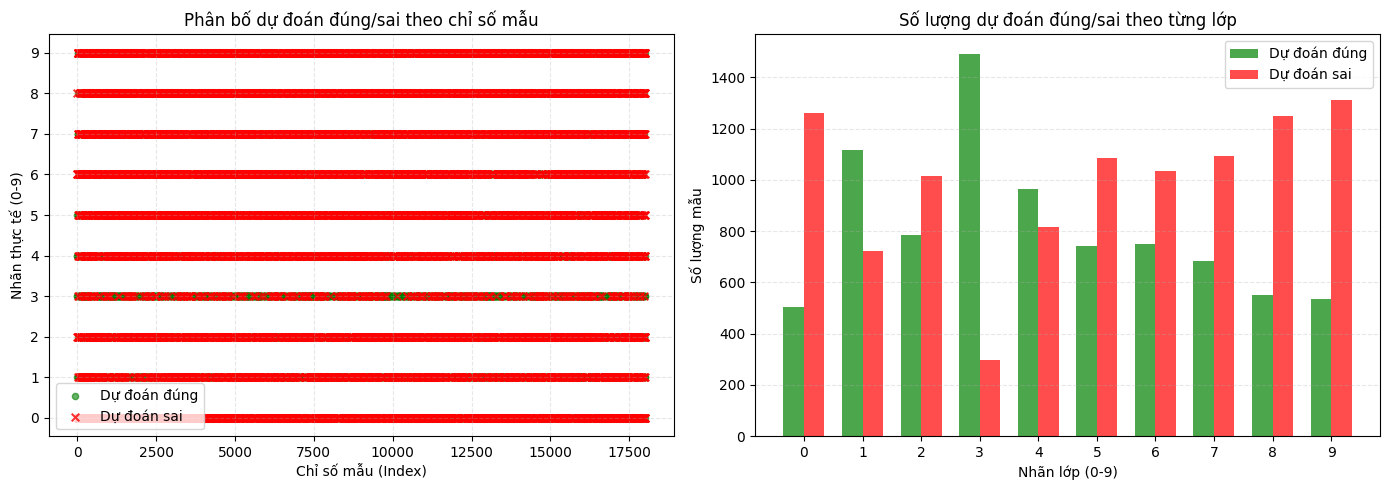

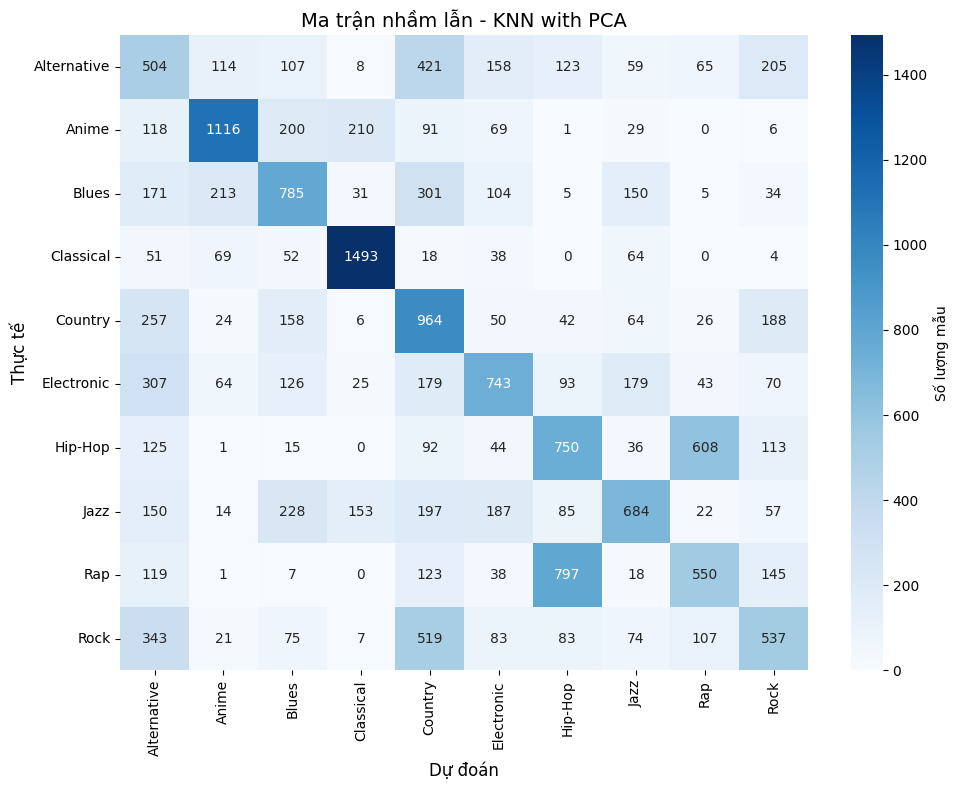

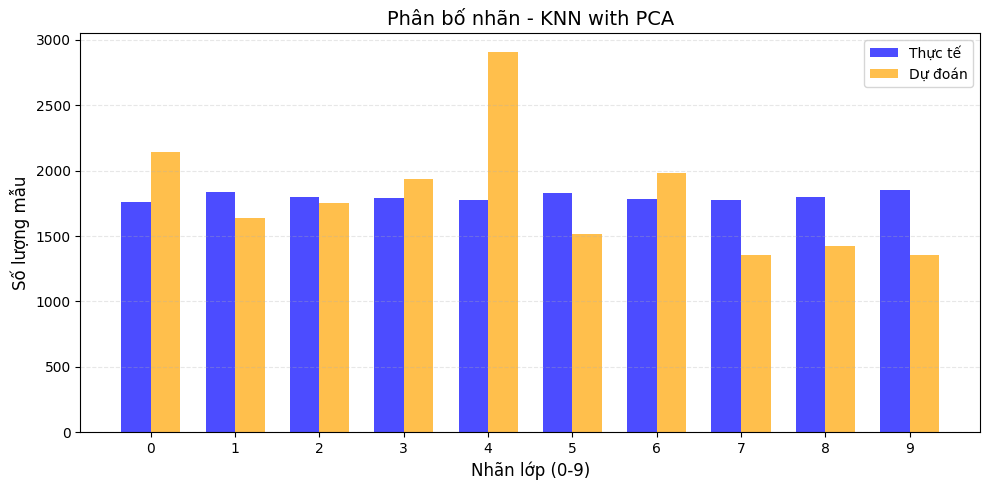

In [ ]:
genre_names = le.classes_
knn = KNeighborsClassifier(n_neighbors=13)

helper_and_plot(X_train_3_pca95, X_test_3_pca95, y_train_3, y_test_3,
                model=knn,
                command='KNN with PCA',
                reduce_name='PCA',
                n_components=0.95,
                class_names=genre_names)

## Nhận xét mô hình KNN với giảm chiều PCA

### Đánh giá mô hình có phù hợp không?

**Nhận định: Mô hình KNN, ngay cả khi kết hợp với PCA, chỉ phù hợp ở mức độ nhất định nhưng chưa phải là mô hình tối ưu cho bài toán phân loại 10 thể loại nhạc này.**

### => Mô hình "phù hợp một phần"

- **Mô hình thực hiện rất tốt nhiệm vụ dự đoán Lớp 3 (Classical)**:
  - Precision = 0.77, Recall = 0.83, F1-score = 0.80
  - Đây là lớp được nhận dạng tốt nhất, cho thấy mô hình đã học được pattern đặc trưng rõ ràng của thể loại Classical (nhạc cổ điển có cấu trúc hòa âm, nhịp điệu và nhạc cụ khác biệt rõ rệt)

- **Lớp 1 (Blues) cũng có kết quả khá**:
  - Precision = 0.66, Recall = 0.58, F1-score = 0.62
  - Cho thấy Blues có đặc trưng tương đối dễ phân biệt

- **Chỉ số Accuracy tổng thể đạt 46.39% trên test và 55.84% trên train**, cho thấy mô hình chỉ học được một phần các đặc trưng phân biệt giữa 10 lớp, và có dấu hiệu overfitting nhẹ (train cao hơn test ~9%).

### => Mô hình "chưa tối ưu"

- **Mục tiêu của bài toán**: Phân loại chính xác 10 thể loại nhạc khác nhau một cách công bằng, không thiên vị về một số thể loại cụ thể.

- **Kết quả thực tế**: Mô hình thất bại với đa số các lớp:
  - **Lớp 0 (Alternative)**: Precision = 0.28, Recall = 0.36, F1 = 0.31 → Kém nhất, bị nhầm lẫn nhiều với các thể loại tương đồng (Rock, Rap)
  - **Lớp 8 (Rap)**: Precision = 0.37, Recall = 0.29, F1 = 0.32 → Kém về recall, mô hình bỏ sót nhiều bài Rap
  - **Lớp 2 (Country), 4 (Electronic), 6 (Hip-Hop), 7 (Jazz), 9 (Rock)**: F1-score từ 0.41-0.45 → Dưới mức trung bình
  - **Lớp 5 (Hip-Hop)**: F1 = 0.45, khó phân biệt với Rap do đặc trưng gần nhau

- **Chỉ 2 trong 10 lớp được học tốt** (Classical và Blues), các lớp còn lại đều có hiệu suất kém.

### => Nguyên nhân mô hình hoạt động như vậy

**1. Giảm chiều quá mạnh với PCA (xuống 13 chiều):**
- Dữ liệu âm nhạc ban đầu có nhiều đặc trưng phức tạp (MFCC, spectral features, tempo...)
- PCA chỉ giữ lại 13 chiều → mất quá nhiều thông tin phân biệt, đặc biệt cho các thể loại có đặc trưng tinh tế
- Các lớp có âm thanh tương đồng (Alternative-Rock, Hip-Hop-Rap, Country-Blues) bị chồng lấn cao trong không gian thấp chiều

**2. Đặc trưng một số thể loại không rõ ràng:**
- **Classical** dễ nhận dạng vì: nhạc cụ giao hưởng, không có drum điện tử, cấu trúc hòa âm phức tạp
- **Blues** có đặc trưng guitar đặc trưng, tempo chậm, cấu trúc 12-bar
- **Alternative, Rap, Rock** có nhiều biến thể con, ranh giới mờ nhạt → KNN khó phân biệt trong không gian giảm chiều

**3. KNN nhạy cảm với không gian đặc trưng:**
- KNN dựa vào khoảng cách Euclidean, nhưng sau PCA ý nghĩa vật lý của các chiều mới không rõ ràng
- Không gian 13 chiều không đủ để tạo ra các vùng láng giềng đồng nhất cho 10 lớp
- Mô hình bị "thiên vị" (biased) về các lớp dễ phân biệt nhất (Classical), bỏ qua các lớp khó

**4. Không có cơ chế xử lý sự chồng lấn giữa các lớp:**
- Các cặp thể loại tương tự (Alternative-Rock, Hip-Hop-Rap, Jazz-Blues) cần ranh giới phức tạp hơn
- KNN tuyến tính theo khoảng cách không đủ mạnh để học các ranh giới này

### => Kết luận

**Một mô hình chỉ phù hợp khi nó phân loại tốt tất cả các lớp, không chỉ một vài lớp dễ.**

Mặc dù Accuracy 46.39% cao hơn random guess (~10% cho 10 lớp), nhưng:
- **Macro avg F1 = 0.46** cho thấy hiệu suất trung bình chỉ **46%** trên tất cả các lớp
- **8/10 lớp có F1 < 0.50** → Mô hình thất bại với đa số thể loại nhạc
- **Overfitting nhẹ** (train 55.84% vs test 46.39%) cho thấy mô hình ghi nhớ hơn là học pattern tổng quát

# Logistic_Model

# các thư viện cần thiết

In [ ]:
!pip install -q category-encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.8 MB/s eta 0:00:00


# mô hình phân loại

## xử lý dữ liệu

In [ ]:
df = pd.read_csv('music_genre.csv')
# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()
df.head(7)

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   
5      89064.0            Axel Boman                 Hello        47.0   
6      43760.0        Jordan Comolli                 Clash        46.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941          0.792000  A#   
1       0.01270         0.622     218293.0   0.890          0.950000   D   
2       0.00306         0.620     215613.0   0.755          0.011800  G#   
3       0.02540         0.774     166875.0   0.700          0.002530  C#   
4       0.00465         0.638     222369.0   0.587          0.909000  F#   
5       0.00523         0.755     519468.0   0.731          0.854000   D   
6       0.02890         0.572     214408.0   0.803          0.000008   B   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   
5     0.216   -10.517  Minor       0.0412                   ?         4-Apr   
6     0.106    -4.294  Major       0.3510             149.995         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic  
5    0.614  Electronic  
6    0.230  Electronic

In [ ]:
df.shape


(50005, 18)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
#Độ cân bằng dữ liệu
print(df['music_genre'].value_counts())
df['music_genre'].value_counts(True)

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


music_genre
Electronic     0.1
Anime          0.1
Jazz           0.1
Alternative    0.1
Country        0.1
Rap            0.1
Blues          0.1
Rock           0.1
Classical      0.1
Hip-Hop        0.1
Name: proportion, dtype: float64

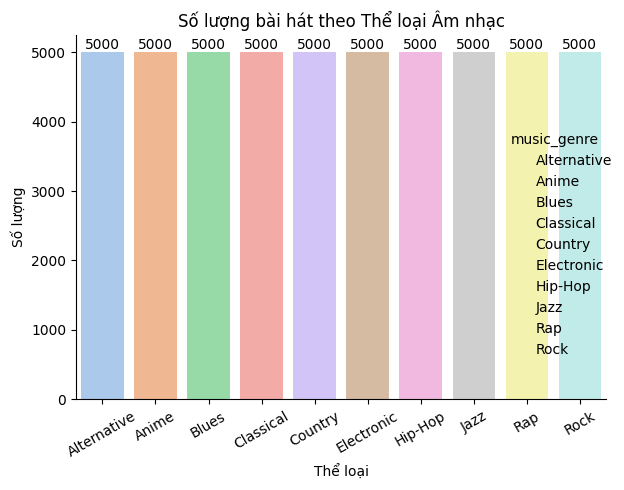

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import FuncFormatter

# Vẽ biểu đồ cột đếm theo cột 'music_genre'
f = sns.catplot(x='music_genre', data=df.sort_values('music_genre'),
                kind='count', palette='pastel')

# Lấy trục đang vẽ
ax = f.facet_axis(0, 0)

# Đặt tên nhãn trên trục X đúng thứ tự theo dataset
ax.set_xticklabels(sorted(map(str, df['music_genre'].dropna().unique())), rotation=30)



# Thêm tiêu đề và tên trục
ax.set_title('Số lượng bài hát theo Thể loại Âm nhạc')
ax.set_xlabel('Thể loại')
ax.set_ylabel('Số lượng')

# Thêm nhãn số trên đầu mỗi cột
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), value,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Chia dữ liệu

## toàn bộ dữ liệu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HM/bai_tap_giua_ki/music_genre.csv')
# Loại b ỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()
df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [ ]:
#Dữ liệu liên tục
continous_data = [
    'popularity','acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

#Dữ liệu rời rạc
classified_data = ['artist_name', 'key', 'mode', 'obtained_date']

In [ ]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce') #đưa dữ liệu về dạng numpy
df = df.drop_duplicates().dropna()

X = df.drop(['music_genre', 'instance_id', 'track_name'], axis=1) # tách thêm instance_id: đó là ID của các bài hát
y = df['music_genre']
print(X.shape)
print(y.shape)

(45020, 15)
(45020,)


In [ ]:
X_origin = X.copy()
X_origin['obtained_date'] = pd.to_datetime(X_origin['obtained_date'], format='%d-%b', errors='coerce')
y_origin = y.copy()

In [ ]:
X_origin['year'] = X_origin['obtained_date'].dt.year
X_origin['month'] = X_origin['obtained_date'].dt.month
X_origin['day_of_week'] = X_origin['obtained_date'].dt.dayofweek

# Bỏ cột gốc
X_origin = X_origin.drop(columns=['obtained_date'])

In [ ]:
#Chuẩn bị dữ liệu
X_continous = df[continous_data]
X_classified = df[classified_data]
y = df['music_genre']

In [ ]:
X_classified['obtained_date'] = pd.to_datetime(X_classified['obtained_date'], format='%d-%b', errors='coerce')
X_classified['year'] = X_classified['obtained_date'].dt.year
X_classified['month'] = X_classified['obtained_date'].dt.month
X_classified['day_of_week'] = X_classified['obtained_date'].dt.dayofweek

# Bỏ cột gốc
X_classified = X_classified.drop(columns=['obtained_date'])

## Mã hóa dữ liệu bằng Onehot encode và label encode trong thư viện Sklearn

In [ ]:
onehot_columns = ['key', 'mode', 'year', 'month', 'day_of_week']
target_columns = ['artist_name']

# One-Hot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X_origin[onehot_columns])
ohe_cols = onehot_encoder.get_feature_names_out(onehot_columns)

# Target Encoding
target_encoder = TargetEncoder(smoothing=1.0)
X_target = target_encoder.fit_transform(X_origin[target_columns], y)
target_cols = [f"{col}_target" for col in target_columns]

# Gộp
X_encoded = np.hstack([X_onehot, X_target.values])
final_cols = np.concatenate([ohe_cols, target_cols])

X_classified_encoded_df = pd.DataFrame(X_encoded, columns=final_cols, index=X.index)



# Chuẩn hóa biến liên tục
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)
# Đưa phần liên tục về DataFrame
X_continous_scaled_df = pd.DataFrame(X_continous_scaled, columns=continous_data, index=df.index)
# Gộp hai phần lại thành DataFrame X hoàn chỉnh
X = pd.concat([X_continous_scaled_df, X_classified_encoded_df], axis=1)
# Mã hóa nhãn đầu ra y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Kích thước X:", X.shape)
print("Số lượng cột:", len(X.columns))
print()
X.head()

Kích thước X: (45020, 27)
Số lượng cột: 27



popularity  acousticness  danceability  duration_ms    energy  \
0   -1.109911     -0.884378      0.522585    -1.732130  1.290882   
1   -0.852739     -0.860885      0.354853    -0.022528  1.098070   
2   -1.045618     -0.889123      0.343671    -0.043517  0.587686   
3   -0.659860     -0.823684      1.204697    -0.425216  0.379752   
4   -0.788446     -0.884466      0.444310     0.009394 -0.047459   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  key_E  \
0          1.872550 -0.488216  0.639344    -0.187086 -0.622164  ...    0.0   
1          2.357446 -0.432561  0.340140    -0.628606 -0.161578  ...    0.0   
2         -0.521854  2.102795  0.734206    -0.584257  0.262424  ...    0.0   
3         -0.550303 -0.228496  0.753536     1.431165  0.263077  ...    0.0   
4          2.231618 -0.228496  0.466352    -0.517241  0.818601  ...    0.0   

   key_F  key_F#  key_G  key_G#  mode_Minor  day_of_week_2  day_of_week_3  \
0    0.0     0.0    0.0     0.0         1.0            1.0            0.0   
1    0.0     0.0    0.0     0.0         1.0            1.0            0.0   
2    0.0     0.0    0.0     1.0         0.0            1.0            0.0   
3    0.0     0.0    0.0     0.0         0.0            1.0            0.0   
4    0.0     1.0    0.0     0.0         0.0            1.0            0.0   

   day_of_week_6  artist_name_target  
0            0.0            4.629521  
1            0.0            5.849558  
2            0.0            5.000000  
3            0.0            4.510421  
4            0.0            4.996723  

[5 rows x 27 columns]

# dự đoán với mô hình

## dự đoán mô hình bằng sklearn

In [ ]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---7:3
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train1, y_train1)
# --- dự đoán ---
y_pred1 = log.predict(X_test1)

# --- đánh giá ---
acc1 = accuracy_score(y_test1, y_pred1)
print("🎯 Độ chính xác:", acc1)
print(confusion_matrix(y_test1, y_pred1))

🎯 Độ chính xác: 0.5647860210276914
[[ 499   39   46    7  280   72   95   74   23  214]
 [  27  967  130  124   46   40    0   10    0    5]
 [  87  197  679   33  136   56    1  113    0   39]
 [  25   73   36 1121    9   33    0   48    0    5]
 [  74   18  106    5  802   74   17   52    8  190]
 [  60   24   44   19   79  845   37  158   23   51]
 [  89    0    0    0   25   16  649   29  463   85]
 [  25   18   98   75  124  222   37  707    6   44]
 [  97    0    0    0   41    9  544   15  519  126]
 [ 193    3   10    1  170   10   21   33   87  840]]


In [ ]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train2, y_train2)
# --- dự đoán ---
y_pred2 = log.predict(X_test2)

# --- đánh giá ---
acc2 = accuracy_score(y_test2, y_pred2)
print("🎯 Độ chính xác:", acc2)
print(confusion_matrix(y_test2, y_pred2))

🎯 Độ chính xác: 0.5623056419369169
[[330  23  33   5 182  53  59  51  16 147]
 [ 21 655  82  82  26  23   0   8   0   3]
 [ 54 125 453  22  98  35   1  77   0  29]
 [  9  50  22 759   7  20   0  31   0   2]
 [ 48  11  79   2 532  47  12  39   7 120]
 [ 41  17  29  18  59 556  24 105  15  29]
 [ 66   0   0   0  21  10 422  20 316  49]
 [ 16  11  64  54  82 152  27 463   4  31]
 [ 71   0   0   0  25   7 369  12 330  87]
 [129   2   7   1 112   6  18  18  56 563]]


In [ ]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---6:4
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train3, y_train3)
# --- dự đoán ---
y_pred3 = log.predict(X_test3)

# --- đánh giá ---
acc3 = accuracy_score(y_test3, y_pred3)
print("🎯 Độ chính xác:", acc3)
print(confusion_matrix(y_test3, y_pred3))

🎯 Độ chính xác: 0.5663038649489116
[[ 663   47   69    9  381   94  131   86   27  291]
 [  37 1298  171  166   59   49    0   13    0    6]
 [ 104  273  906   47  172   81    1  158    0   46]
 [  34   95   52 1491   10   43    0   67    0    8]
 [ 115   21  156    7 1050   91   22   68   12  252]
 [  93   36   65   31  103 1112   51  196   33   66]
 [ 126    0    1    0   35   22  876   36  607  105]
 [  37   24  145   94  145  299   49  946    6   64]
 [ 117    0    0    0   51   12  723   21  708  170]
 [ 239    4   12    2  217   13   32   45  112 1148]]


## tự định nghĩa lớp LogisticRegression

In [ ]:
class SoftmaxRegression:
    def __init__(self, eta=0.01, tol=1e-4, max_iter=1000, batch_size=None, check_after=20, verbose=False, random_state=None):
        self.eta = eta
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size  # nếu None => full batch
        self.check_after = check_after
        self.verbose = verbose
        self.random_state = random_state
        self.W = None

    @staticmethod
    def _softmax_stable(Z):
        Z = Z - np.max(Z, axis=0, keepdims=True)
        expZ = np.exp(Z)
        return expZ / np.sum(expZ, axis=0, keepdims=True)

    def _convert_labels(self, y):
        classes = np.unique(y)
        self.classes_ = classes
        C = len(classes)
        y_to_index = {c: i for i, c in enumerate(classes)}
        y_indexed = np.vectorize(y_to_index.get)(y)
        Y = np.eye(C)[y_indexed].T  # (C, N)
        return Y, C

    def fit(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        X = X.T  # (d, N)
        d, N = X.shape
        Y, C = self._convert_labels(y)

        W = np.random.randn(d, C) * 0.01
        W_prev = W.copy()

        for it in range(self.max_iter):
            # Trộn dữ liệu
            idx = np.random.permutation(N)
            X_shuffled = X[:, idx]
            Y_shuffled = Y[:, idx]

            batch_size = self.batch_size or N
            for start in range(0, N, batch_size):
                end = start + batch_size
                xb = X_shuffled[:, start:end]
                yb = Y_shuffled[:, start:end]

                # Forward
                A = self._softmax_stable(W.T @ xb)

                # Gradient vectorized
                grad = xb @ (A - yb).T / batch_size

                # Update
                W -= self.eta * grad

            # Kiểm tra hội tụ
            if it % self.check_after == 0:
                diff = np.linalg.norm(W - W_prev)
                if diff < self.tol:
                    if self.verbose:
                        print(f"✅ Converged at iteration {it}")
                    break
                W_prev = W.copy()

        self.W = W
        return self

    def predict(self, X):
        X = X.T
        A = self._softmax_stable(self.W.T @ X)
        return self.classes_[np.argmax(A, axis=0)]

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [ ]:
def auto_predict(X_train, X_test, y_train, y_test, model = None, reduce_name = None, string = "String Default"):
  # Nếu X_train là list [X_continuous, X_classified]
  if isinstance(X_train, list) and len(X_train) == 2:
      X_train = np.concatenate(X_train, axis=1)
      X_test = np.concatenate(X_test, axis=1)

  start_time = time.time()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  end_time = time.time()

  print()
  print('=' * 20, string, '=' * 20)
  print(f'Total time: {end_time - start_time:.4f} seconds')

  print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}')
  # print(f'Precision: {precision_score(y_test, y_pred):.4f}')
  # print(f'Recall: {recall_score(y_test, y_pred):.4f}')

  print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
  print('=' * 100)
  print()

In [ ]:
def split_train_test(X, y, test_size=None, classified_idx=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  if classified_idx == 0:
    return (X_train, X_test, y_train, y_test)

  X_train_classicfied = X_train[:,:classified_idx]
  X_test_classicfied = X_test[:,:classified_idx]
  X_train_continous = X_train[:,classified_idx:]
  X_test_continous = X_test[:,classified_idx:]
  X_train_all = [X_train_continous, X_train_classicfied]
  X_test_all = [X_test_continous, X_test_classicfied]
  return (X_train_all, X_test_all, y_train, y_test)


## dự đoán với mô hình tự định nghĩa

In [ ]:
classified_idx = 4

In [ ]:
model = SoftmaxRegression(eta=0.05, max_iter=1000, batch_size=32, verbose=True, random_state=42)

auto_predict(
    *split_train_test(X, y, test_size=0.3, classified_idx=classified_idx),
    model,
    "Chạy với dữ liệu ban đầu có train:validation = 7:3"
)


==================== String Default ====================
Total time: 55.3149 seconds
Accuracy of model SoftmaxRegression: 0.5541
Confusion matrix:
[[ 394   55   25   11  284   82   96   32   85  257]
 [  36 1019   98  111   52   49    0   17    0    0]
 [  48  268  606   62  141   40    4   85    1   57]
 [  20   72   38 1106   12   35    0   49    0    7]
 [  50   24   97   18  830   38   31   27   16  223]
 [  41   44   34   42   95  861   47  135   45   61]
 [  55    0    1    0   40   17  441    9  692   90]
 [  10   27  113  141  146  196   54  548   24   66]
 [  64    0    0    0   40    6  324    6  748  149]
 [ 153    1   12    4  139    9   16   25   96  931]]



In [ ]:
model = SoftmaxRegression(eta=0.05, max_iter=1000, batch_size=32, verbose=True, random_state=42)

auto_predict(
    *split_train_test(X, y, test_size=0.2, classified_idx=classified_idx),
    model,
    "Chạy với dữ liệu ban đầu có train:validation = 4:1"
)


==================== String Default ====================
Total time: 61.5712 seconds
Accuracy of model SoftmaxRegression: 0.5534
Confusion matrix:
[[252  43  16   4 150  64  67  23  50 187]
 [ 20 676  82  59  28  36   0  18   0   0]
 [ 33 177 402  38  95  26   2  59   0  41]
 [ 16  57  27 705   8  19   0  44   0   5]
 [ 38  16  68  14 548  28  25  19  13 152]
 [ 27  25  20  22  64 569  34 101  31  38]
 [ 30   0   2   0  27   9 450   8 308  71]
 [  5  16  68  82  95 138  41 387  12  44]
 [ 45   0   0   0  24   6 353   5 374 107]
 [ 91   1  10   3  96   7  11  16  61 620]]



In [ ]:
model = SoftmaxRegression(eta=0.05, max_iter=1000, batch_size=32, verbose=True, random_state=42)

auto_predict(
    *split_train_test(X, y, test_size=0.4, classified_idx=classified_idx),
    model,
    "Chạy với dữ liệu ban đầu có train:validation = 6:4"
)


==================== String Default ====================
Total time: 49.5110 seconds
Accuracy of model SoftmaxRegression: 0.5459
Confusion matrix:
[[ 483   73   31   14  426  102  142   43  106  344]
 [  41 1307  169  157   66   68    1   29    0    2]
 [  66  368  838   94  185   56    3  110    2   77]
 [  23   89   43 1488   18   45    0   69    0   14]
 [  66   24  143   27 1085   54   43   30   20  287]
 [  44   55   49   52  133 1106   61  187   61   81]
 [  57    0    3    1   49   23  771   13  746  121]
 [  12   27  152  178  198  239   77  777   29   88]
 [  74    0    0    0   66    7  670   14  770  197]
 [ 194    4   12    6  217   10   31   35  134 1206]]



## nhận xét

kết quả so sánh :

mô hình tự cài đặt LogisticRegression : độ chính xác ≈ 56%

thư viện sklearn : độ chính xác ≈ 57%



→ Độ chênh lệch rất nhỏ (~1%), cho thấy:
  - Việc tự cài đặt mô hình của bạn đúng về mặt thuật toán (hàm sigmoid, hàm mất mát, gradient descent, v.v.).
  - Thư viện sklearn có thể tối ưu hơn một chút (nhờ thuật toán tối ưu hóa mạnh hơn như LBFGS hoặc sag, cùng với regularization mặc định).

  Nguyên nhân :

  - Sự khác nhau trong tốc độ học (learning rate) và số vòng lặp (iterations).

  - sklearn mặc định có chuẩn hóa dữ liệu và regularization (L2), giúp hội tụ ổn định hơn.

  - Tự cài đặt có thể dùng gradient descent đơn giản, dễ mắc kẹt ở điểm tối thiểu cục bộ hoặc hội tụ chậm.


## dữ liệu giảm chiều

### giảm trên cả tập dữ liệu

#### Thực hiện giảm chiều với PCA

In [ ]:
X= X.copy()
y = y.copy()

In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(X)

# hiển thị dưới dạng dataframe
#X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(6)])

In [ ]:
#X_pca_df

In [ ]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train4, y_train4)
# --- dự đoán ---
y_pred4 = log.predict(X_test4)

# --- đánh giá ---
acc4 = accuracy_score(y_test4, y_pred4)
print("🎯 Độ chính xác:", acc4)
print(confusion_matrix(y_test4, y_pred4))

🎯 Độ chính xác: 0.3688360728565082
[[103  61 106   6 133 145  34 113  64 134]
 [ 36 509 100 148  28  51   1  17   0  10]
 [ 34 218 206  23 135  92   5 147   1  33]
 [  6  47  21 767  10  12   0  36   0   1]
 [ 89  18 105   6 252  85  10 148  25 159]
 [102  52 122  23 108 184  47 117  38 100]
 [ 19   0   0   0  16  24 436  33 266 110]
 [ 18  25  96  61  71  88  16 417  46  66]
 [ 30   0   3   0  24  35 452  35 209 113]
 [ 87  14  55   3 181  96  52 111  75 238]]


In [ ]:
# giảm còn 4 chiều
pca = PCA(n_components = 4)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train5, y_train5)
# --- dự đoán ---
y_pred5 = log.predict(X_test5)

# --- đánh giá ---
acc5 = accuracy_score(y_test5, y_pred5)
print("🎯 Độ chính xác:", acc5)
print(confusion_matrix(y_test5, y_pred5))

🎯 Độ chính xác: 0.3688360728565082
[[103  61 106   6 133 145  34 113  64 134]
 [ 36 509 100 148  28  51   1  17   0  10]
 [ 34 218 206  23 135  92   5 147   1  33]
 [  6  47  21 767  10  12   0  36   0   1]
 [ 89  18 105   6 252  85  10 148  25 159]
 [102  52 122  23 108 184  47 117  38 100]
 [ 19   0   0   0  16  24 436  33 266 110]
 [ 18  25  96  61  71  88  16 417  46  66]
 [ 30   0   3   0  24  35 452  35 209 113]
 [ 87  14  55   3 181  96  52 111  75 238]]


In [ ]:
# giảm còn 2 chiều
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train6, y_train6)
# --- dự đoán ---
y_pred6 = log.predict(X_test6)

# --- đánh giá ---
acc6 = accuracy_score(y_test6, y_pred6)
print("🎯 Độ chính xác:", acc6)
print(confusion_matrix(y_test6, y_pred6))

🎯 Độ chính xác: 0.35406486006219456
[[168  78 139   6  13  48  47 126  58 216]
 [ 78 511 124 147   0   3   0  22   1  14]
 [ 96 253 242  30  10  39   4 160   0  60]
 [ 10  46  29 764   2   6   0  38   0   5]
 [212  24 150  10  17  66  11 181  28 198]
 [152  49 170  20  20  58  19 132  75 198]
 [ 14   0   0   0   0   5 520  41 177 147]
 [ 41  25 122  65   8  42  38 422  34 107]
 [ 42   1   5   0   4   5 515  32 157 140]
 [146  23  92   3  12  36  58 134  79 329]]


#### thực hiện giảm chiều với LDA

In [ ]:
X= X.copy()
y = y.copy()

In [ ]:
# chia train test 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.4235154746038798
[[ 399   34   94    1  192  138   60  131   22  278]
 [  20  956  186  139   34   13    0    0    0    1]
 [  33  265  632   35   60  119    4  162    0   31]
 [  10   67   72 1117   15   15    0   50    0    4]
 [ 324   16  152    1  243  198   51  196    4  161]
 [ 268   15  253   27  177  169   36  233   11  151]
 [  60    0    0    0    1    0  377   10  600  308]
 [  67   21  204   88   51  127   27  603    2  166]
 [  79    0    1    0    5    0  349    4  657  256]
 [ 281    4    9    1   48   33  176  154   95  567]]


In [ ]:
# chia train test 6:4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.4248667258996002
[[ 555   42  125    1  243  194   99  162   24  353]
 [  30 1297  225  184   33   22    0    4    0    4]
 [  51  376  833   51   60  162    4  212    0   39]
 [  14   93   97 1481   16   17    0   78    0    4]
 [ 437   19  208    1  282  299   70  251    8  219]
 [ 374   28  347   38  208  244   49  286   12  200]
 [  85    0    1    0    1    1  500   13  818  389]
 [  92   29  265  114   74  158   27  810    9  231]
 [ 102    0    1    0    5    0  468    7  890  329]
 [ 378    5   12    2   59   42  240  196  131  759]]


In [ ]:
# chia train test 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.42581075077743225
[[273  19  66   0 112  93  38  94  20 184]
 [ 10 637 133  92  21   6   0   0   0   1]
 [ 24 165 434  25  41  70   3 108   0  24]
 [  5  42  49 755   6   6   0  36   0   1]
 [197  12 105   1 171 130  31 125   5 120]
 [190   9 172  22 116 108  22 150   7  97]
 [ 40   0   0   0   1   0 258   6 395 204]
 [ 41  13 133  71  34  82  22 395   0 113]
 [ 58   0   1   0   3   0 233   2 426 178]
 [187   2   8   1  26  26 125 102  58 377]]


### giảm trên tập dữ liệu liên tục

#### thực hiện giảm chiều với PCA

In [ ]:
X = X_continous_scaled.copy()
y = y.copy()

In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train7, y_train7)
# --- dự đoán ---
y_pred7 = log.predict(X_test7)

# --- đánh giá ---
acc7 = accuracy_score(y_test7, y_pred7)
print("🎯 Độ chính xác:", acc7)
print(confusion_matrix(y_test7, y_pred7))

🎯 Độ chính xác: 0.3893824966681475
[[153  29  20   5 141  87  79  61  35 289]
 [ 21 456  95 157  43  78   1  31   0  18]
 [ 27 211 173  28 105 101   5 204   5  35]
 [  8  53   7 757   6  12   0  47   1   9]
 [ 65  49  84   7 266  69  22 114  14 207]
 [ 91 139  69  23 103 203  54 112  26  73]
 [ 50   0   4   0  21  23 378   7 315 106]
 [ 17  77  99 104  84  94  36 367   2  24]
 [ 65   0   1   0  17  11 327   6 335 139]
 [151  10  14   4 110  60  19  57  69 418]]


In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 4)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train8, X_test8, y_train8, y_test8 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train8, y_train8)
# --- dự đoán ---
y_pred8 = log.predict(X_test8)

# --- đánh giá ---
acc8 = accuracy_score(y_test8, y_pred8)
print("🎯 Độ chính xác:", acc8)
print(confusion_matrix(y_test8, y_pred8))

🎯 Độ chính xác: 0.35673034207019105
[[113  46  31   2 111 140  67  94  65 230]
 [ 16 455  51 159  45  97   2  43   0  32]
 [ 21 230 117  25 151 104   9 181   4  52]
 [  4  52   9 767   4  20   0  36   1   7]
 [ 58  78  71   4 206  89  25 170  19 177]
 [ 83 153  60  25  97 190  50  78  37 120]
 [ 56   0   2   0  27   9 366  17 325 102]
 [ 25 111  58  93 101  64  37 342  12  61]
 [ 62   1   4   0  21  19 363  19 286 126]
 [ 91  19  25   5 110  87  24  98  83 370]]


In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train9, X_test9, y_train9, y_test9 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train9, y_train9)
# --- dự đoán ---
y_pred9 = log.predict(X_test9)

# --- đánh giá ---
acc9 = accuracy_score(y_test9, y_pred9)
print("🎯 Độ chính xác:", acc9)
print(confusion_matrix(y_test9, y_pred9))

🎯 Độ chính xác: 0.30319857840959574
[[146  91  29   3  41 134  94 121  93 147]
 [ 94 336  26 183   4 169   1  61   2  24]
 [ 82 246  45  18  43 106  26 211  28  89]
 [  5  51   4 772   2  11   0  52   0   3]
 [157  72  41   1  48  92  45 192  78 171]
 [122 234  42  24  34 126  32 101  73 105]
 [ 34   2   6   0  16  12 479  42 186 127]
 [ 19 119  45  94  40  24  68 390  38  67]
 [ 58   7   4   0  18  25 448  42 187 112]
 [134  61  25   5  28  94 106 120 138 201]]


#### thực hiện giảm chiều với LDA

In [ ]:
X = X_continous_scaled.copy()
y = y.copy()

In [ ]:
# chia train test 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.4013771657041315
[[247   5  10   0 140 140  67  96  31 163]
 [ 14 582  43 126  10 113   1   9   0   2]
 [ 23 245 210  22  33 140   2 175   3  41]
 [  4  51  29 753   8  15   0  39   0   1]
 [146  13  53   1 113 262  40 154  12 103]
 [110 108 100  18  79 321  35  82  10  30]
 [ 71   0   0   0   2   2 302   6 345 176]
 [ 46  57 144  96  69  84  14 301   3  90]
 [ 76   0   1   0   3   3 238   1 408 171]
 [222   3   0   1  37   3 134  67  68 377]]


In [ ]:
# chia train test 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.3977491485265808
[[ 355    7   17    1  214  227  116  128   43  241]
 [  20  848   66  193   13  188    2   17    0    2]
 [  40  374  315   30   52  211    2  260    4   53]
 [   6   74   43 1118   14   29    0   62    0    4]
 [ 229   19   77    1  166  403   60  222   19  150]
 [ 164  156  160   22  119  480   56  121   15   47]
 [ 103    0    0    0    3    3  477    8  508  254]
 [  73   87  227  124   95  137   17  453    6  137]
 [ 110    0    1    0    3    4  392    2  594  245]
 [ 329    6    0    1   53    5  196   98  114  566]]


In [ ]:
# chia train test 6:4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.39749000444247
[[ 471    8   22    1  313  291  141  168   68  315]
 [  25 1137   83  263   18  242    2   24    0    5]
 [  52  497  435   46   78  272    1  334    5   68]
 [   8  104   57 1483   15   37    0   91    0    5]
 [ 310   23  111    2  228  527   82  282   28  201]
 [ 220  211  208   32  151  649   79  155   17   64]
 [ 137    1    2    0    3    4  634   12  684  331]
 [ 104  114  299  161  135  182   19  599   10  186]
 [ 144    0    1    0    6    4  565    2  769  311]
 [ 425    7    0    2   74    4  267  127  165  753]]


### nhận xét

Nhận xét và giải thích kết quả:

  Khi áp dụng các phương pháp giảm chiều dữ liệu, độ chính xác của mô hình Logistic Regression giảm rõ rệt so với khi huấn luyện trên dữ liệu gốc (≈56% – 57%).

Với PCA, khi giảm số chiều xuống còn 2–6 thành phần chính, mô hình chỉ đạt 30% – 37% độ chính xác.

Với LDA, mô hình đạt khoảng 39% - 42%, cao hơn PCA nhưng vẫn thấp hơn mô hình gốc.

Nguyên nhân:

- PCA chỉ giữ lại các thành phần có phương sai lớn nhất mà không xét đến thông tin nhãn (class) → mất nhiều đặc trưng quan trọng giúp phân biệt các lớp.

- LDA có sử dụng nhãn nên tìm được các trục giúp phân tách lớp tốt hơn, do đó hiệu quả cao hơn PCA.

- Tuy nhiên, việc giảm chiều quá mạnh khiến một phần thông tin vẫn bị mất, các lớp bị chồng lấn trong không gian đặc trưng, làm giảm khả năng phân loại của mô hình.



In [ ]:
def plot_prediction_vs_true_multiclass(y_pred, y_test, title="So sánh Dự đoán và Thực tế (10 lớp)"):
    """
    Trực quan hóa kết quả dự đoán so với thực tế cho bài toán đa lớp (0-9)
    """
    y_pred = np.array(y_pred).flatten()
    y_test = np.array(y_test).flatten()

    plt.figure(figsize=(14, 5))

    # Subplot 1: Scatter plot - Dự đoán đúng/sai
    plt.subplot(1, 2, 1)
    x = np.arange(len(y_test))
    correct = (y_pred == y_test)

    plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng',
                marker='o', alpha=0.6, s=20)
    plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai',
                marker='x', alpha=0.8, s=30)

    plt.title("Phân bố dự đoán đúng/sai theo chỉ số mẫu", fontsize=12)
    plt.xlabel("Chỉ số mẫu (Index)")
    plt.ylabel("Nhãn thực tế (0-9)")
    plt.yticks(range(10))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)

    # Subplot 2: Biểu đồ cột - So sánh số lượng dự đoán đúng/sai theo từng lớp
    plt.subplot(1, 2, 2)

    classes = np.unique(y_test)
    correct_counts = []
    incorrect_counts = []

    for cls in classes:
        mask = (y_test == cls)
        correct_counts.append(np.sum(correct & mask))
        incorrect_counts.append(np.sum(~correct & mask))

    x_pos = np.arange(len(classes))
    width = 0.35

    plt.bar(x_pos - width/2, correct_counts, width, label='Dự đoán đúng',
            color='green', alpha=0.7)
    plt.bar(x_pos + width/2, incorrect_counts, width, label='Dự đoán sai',
            color='red', alpha=0.7)

    plt.title("Số lượng dự đoán đúng/sai theo từng lớp", fontsize=12)
    plt.xlabel("Nhãn lớp (0-9)")
    plt.ylabel("Số lượng mẫu")
    plt.xticks(x_pos, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_confusion_heatmap_multiclass(y_pred, y_test, class_names=None, title="Ma trận nhầm lẫn"):
    """
    Vẽ ma trận nhầm lẫn dạng heatmap cho bài toán đa lớp
    """
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))

    if class_names is None:
        class_names = [f'Class {i}' for i in range(len(cm))]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Số lượng mẫu'})

    plt.title(title, fontsize=14)
    plt.xlabel("Dự đoán", fontsize=12)
    plt.ylabel("Thực tế", fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_class_distribution(y_pred, y_test, title="Phân bố nhãn: Dự đoán vs Thực tế"):
    """
    So sánh phân bố nhãn giữa tập dự đoán và tập thực tế
    """
    plt.figure(figsize=(10, 5))

    classes = np.arange(10)
    pred_counts = [np.sum(y_pred == i) for i in classes]
    true_counts = [np.sum(y_test == i) for i in classes]

    x = np.arange(len(classes))
    width = 0.35

    plt.bar(x - width/2, true_counts, width, label='Thực tế', color='blue', alpha=0.7)
    plt.bar(x + width/2, pred_counts, width, label='Dự đoán', color='orange', alpha=0.7)

    plt.title(title, fontsize=14)
    plt.xlabel("Nhãn lớp (0-9)", fontsize=12)
    plt.ylabel("Số lượng mẫu", fontsize=12)
    plt.xticks(x, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Cập nhật hàm helper_and_plot để sử dụng các hàm vẽ mới
def helper_and_plot(X_train, X_test, y_train, y_test, model=None, command='Default command',
                    reduce_name=None, n_components=2, class_names=None):
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time

    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)

    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    y_prediction_train = model.predict(X_train)

    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time:.4f}s')
    print(f'Accuracy (Test): {accuracy_score(y_prediction, y_test):.4f}')
    print(f'Accuracy (Train): {accuracy_score(y_prediction_train, y_train):.4f}')
    print(f'\nClassification Report:\n{classification_report(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

    # Vẽ các biểu đồ trực quan
    plot_prediction_vs_true_multiclass(y_prediction, y_test,
                                       title=f"Kết quả dự đoán - {command}")
    plot_confusion_heatmap_multiclass(y_prediction, y_test, class_names=class_names,
                                      title=f"Ma trận nhầm lẫn - {command}")
    plot_class_distribution(y_prediction, y_test,
                           title=f"Phân bố nhãn - {command}")


==================== Logistic Regression (Dữ liệu gốc) ====================
X_train: (27012, 11) X_test: (18008, 11)
Total time: 1.9267s
Accuracy (Test): 0.5202
Accuracy (Train): 0.5237

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.31      0.35      1798
           1       0.61      0.62      0.61      1799
           2       0.49      0.45      0.47      1788
           3       0.77      0.81      0.79      1800
           4       0.41      0.54      0.47      1794
           5       0.57      0.57      0.57      1786
           6       0.46      0.49      0.48      1808
           7       0.50      0.39      0.44      1809
           8       0.46      0.37      0.41      1802
           9       0.52      0.66      0.58      1824

    accuracy                           0.52     18008
   macro avg       0.52      0.52      0.52     18008
weighted avg       0.52      0.52      0.52     18008

==================== Logistic 

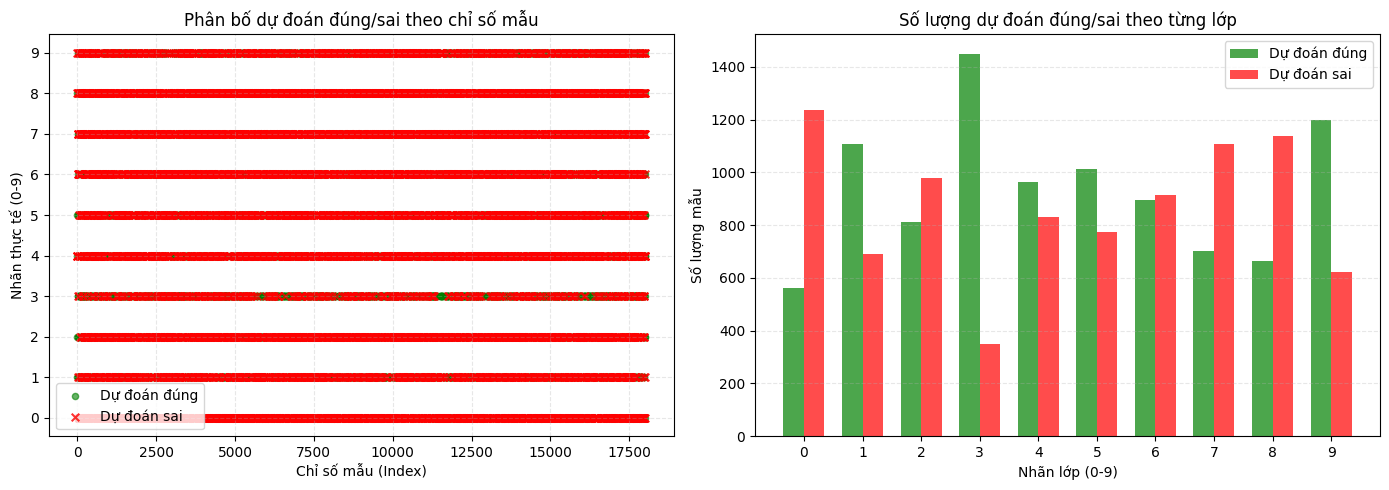

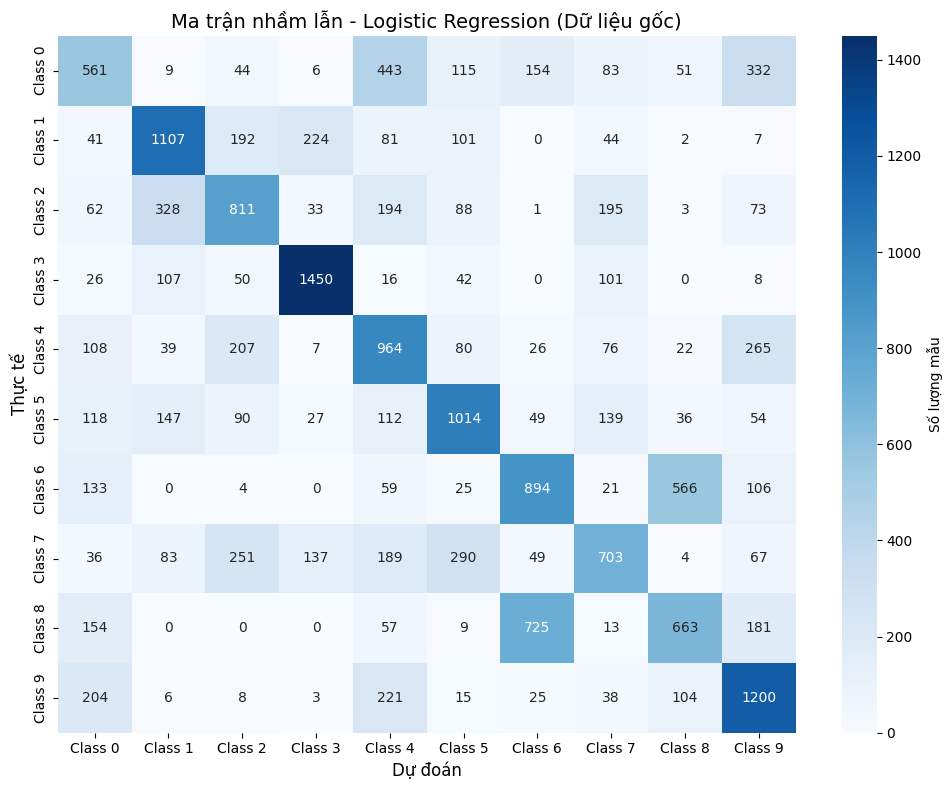

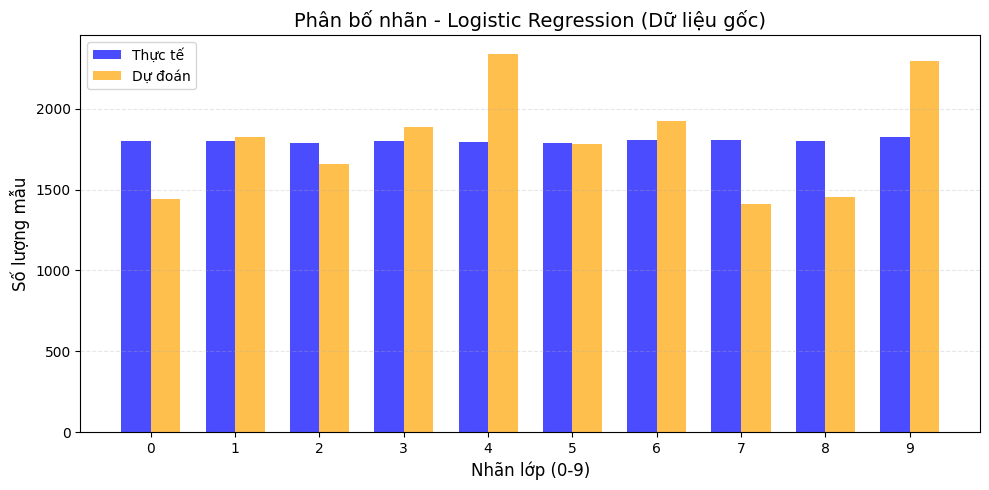

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

helper_and_plot(
    X_train, X_test, y_train, y_test,
    model=model,
    command='Logistic Regression (Dữ liệu gốc)',
    reduce_name=None  # Không giảm chiều
)

# Nhận xét tổng quan

Nhận xét tổng quan cuối cùng:

Hai phân tích đều logic, rõ ràng, có cơ sở học thuật và thực nghiệm.
Chúng bổ sung cho nhau:

Phần đầu chứng minh tính đúng đắn của mô hình.

Phần sau cho thấy hạn chế khi xử lý dữ liệu đầu vào.

➡️ Tổng thể, bài làm thể hiện hiểu biết toàn diện về mô hình Logistic Regression: từ cách hoạt động nội tại, tối ưu hóa, đến tác động của biến đổi dữ liệu (PCA) đối với hiệu năng mô hình.

        Model  Accuracy  F1_Score
0  NavieBayes      0.76      0.77
1    Logistic      0.55      0.55
2         KNN      0.48      0.49


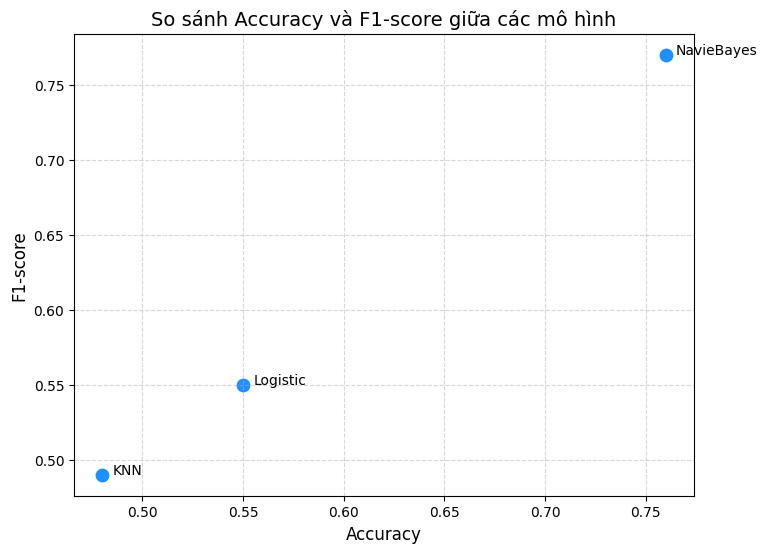

In [ ]:
import pandas as pd

data = {
    "Model": ["NavieBayes", "Logistic", "KNN"],
    "Accuracy": [0.76, 0.55, 0.48],
    "F1_Score": [0.77, 0.55, 0.49]
}

df = pd.DataFrame(data)
print(df)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["Accuracy"], df["F1_Score"], color='dodgerblue', s=80)

# Thêm nhãn tên mô hình
for i in range(len(df)):
    plt.text(df["Accuracy"][i]+0.005, df["F1_Score"][i], df["Model"][i], fontsize=10)

plt.title("So sánh Accuracy và F1-score giữa các mô hình", fontsize=14)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("F1-score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
